In [2]:



# Base directory containing all output folders
base_dir = '/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/'

# List all output directories
output_dirs = sorted(glob.glob(os.path.join(base_dir, 'output_*')))

first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_27353/721760235.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_dir

In [32]:
Y=first_model['Y']
event_times=first_model['E']
pi=original_pi

In [45]:
thrit_model = torch.load(os.path.join(base_dir, 'output_30000_40000/model.pt'))

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_27353/4246345029.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  thrit_model = torch.load(os.path.join(base_di

In [48]:
thrit_model['model_state_dict']['lambda_'][100,:]

tensor([[-5.4680, -5.4028, -5.3375,  ..., -2.9555, -2.9169, -2.8789],
        [-2.6424, -2.6402, -2.6380,  ..., -2.8111, -2.8509, -2.8909],
        [-2.9516, -2.9106, -2.8695,  ..., -2.6686, -2.6916, -2.7148],
        ...,
        [-3.8179, -3.7644, -3.7115,  ..., -3.8726, -3.8883, -3.9043],
        [-2.3799, -2.4033, -2.4279,  ..., -2.6062, -2.5813, -2.5559],
        [-5.0457, -5.0594, -5.0731,  ..., -4.9820, -4.9868, -4.9936]])

In [49]:
all_lambdas[30100,:]

array([[-5.46797705, -5.40282106, -5.33750296, ..., -2.95545053,
        -2.91691256, -2.87893987],
       [-2.64238596, -2.64023662, -2.63795447, ..., -2.81105542,
        -2.85093069, -2.89086056],
       [-2.95164084, -2.91060686, -2.86954403, ..., -2.66859984,
        -2.69161153, -2.7147944 ],
       ...,
       [-3.81792212, -3.76435518, -3.71148467, ..., -3.87262988,
        -3.88834596, -3.90429759],
       [-2.37990522, -2.40333986, -2.42786598, ..., -2.60619044,
        -2.58131266, -2.55587721],
       [-5.04567671, -5.05939245, -5.07312918, ..., -4.98201513,
        -4.98681164, -4.99358463]])

In [33]:
# Find someone with an event (Y=1) before T=51
event_example = None
for i in range(len(Y)):
    for d in range(Y.shape[1]):
        event_time = Y[i,d,:].nonzero()
        if len(event_time) > 0 and event_time[0] < 51:
            event_example = (i, d, event_time[0].item())
            print(i)
            print(d) 
            print(event_time)
            break
    if event_example:
        break

0
161
tensor([[44]])


In [34]:
event_times_tensor = torch.tensor(event_times, dtype=torch.long)
# Create masks for events and censoring
event_times_expanded = event_times_tensor.unsqueeze(-1)  # N x D x 1
time_grid = torch.arange(52).unsqueeze(0).unsqueeze(0)  # 1 x 1 x T

# Mask for times before the event, # Masks automatically handle right-censoring because event_times = T
mask_before_event = (time_grid < event_times_expanded).float()  # N x D x T
# Mask for event time
mask_at_event = (time_grid == event_times_expanded).float()  # N x D x T

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_27353/1859951260.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  event_times_tensor = torch.tensor(event_times, dtype=torch.long)


In [35]:
event_example = None
for i in range(len(Y)):
    for d in range(Y.shape[1]):
        event_time = Y[i,d,:].nonzero()
        if len(event_time) > 0 and event_time[0] < 51:
            event_example = (i, d, event_time[0].item())
            break
    if event_example:
        break

if event_example:
    i, d, t = event_example
    print(f"Found example - Patient {i}, Disease {d}, Event at time {t}")
    print("\nY values:", Y[i,d,:])
    print("E value:", event_times[i,d])
    
    # Show their masks
    print("\nMasks:")
    print("Before event:", mask_before_event[i,d,:])
    print("At event:", mask_at_event[i,d,:])
    
    # Show their likelihood contributions
    print("\nLikelihood components:")
    print("1. Survival (before event):", -torch.sum(torch.log(1-pi[i,d,:]) * mask_before_event[i,d,:]).item())
    print("2. Event (at event time):", -torch.sum(torch.log(pi[i,d,:]) * mask_at_event[i,d,:] * Y[i,d,:]).item())
    print("3. No event term:", -torch.sum(torch.log(1-pi[i,d,:]) * mask_at_event[i,d,:] * (1-Y[i,d,:])).item())

Found example - Patient 0, Disease 161, Event at time 44

Y values: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])
E value: tensor(44)

Masks:
Before event: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])
At event: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

Likelihood components:
1. Survival (before event): 0.09561169892549515
2. Event (at event time): 6.459317684173584
3. No event term: -0.0


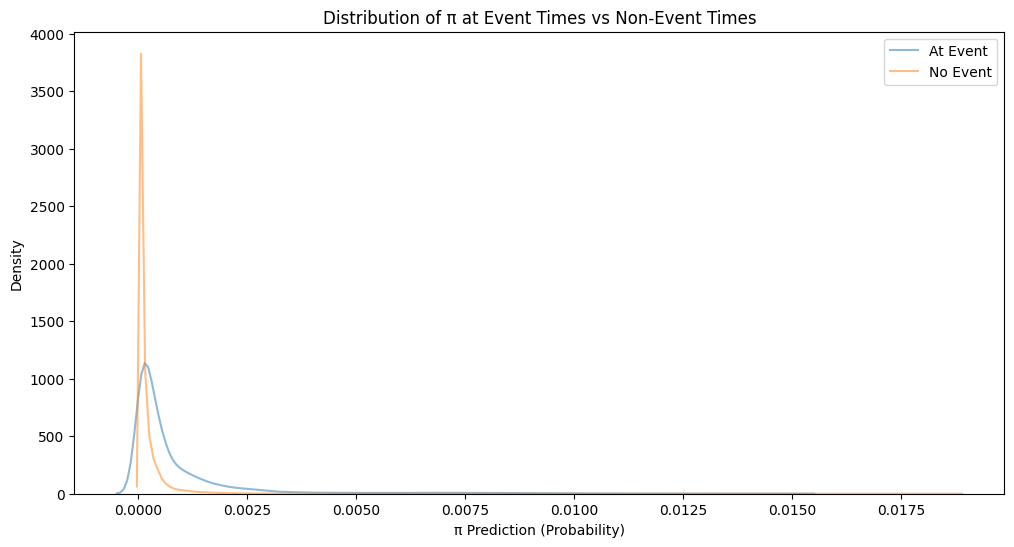


π predictions summary:
At event - mean: 0.0008722241966790239 std: 0.0015484914541511452
No event - mean: 0.00013810747 std: 0.00035502427
Number of events: 79187
Number of non-event times: 179539816


In [40]:
# Initialize lists to store pi values
pi_at_event = []
pi_not_event = []

# Convert pi to probabilities
pi_prob = original_pi

# For each patient and disease
for i in range(len(Y)):
    for d in range(Y.shape[1]):
        # Get event time if any
        event_time = Y[i,d,:].nonzero()
        if len(event_time) > 0:  # There was an event
            t = event_time[0].item()
            pi_at_event.append(pi_prob[i,d,t].item())
            # Add non-event times before the event
            pi_not_event.extend(pi_prob[i,d,:t].numpy())
        else:
            # All times are non-event
            pi_not_event.extend(pi_prob[i,d,:].numpy())

# Create distribution plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=pi_at_event, label='At Event', alpha=0.5)
sns.kdeplot(data=pi_not_event, label='No Event', alpha=0.5)
plt.xlabel('π Prediction (Probability)')
plt.ylabel('Density')
plt.title('Distribution of π at Event Times vs Non-Event Times')
plt.legend()
plt.show()

# Print summary stats
print("\nπ predictions summary:")
print("At event - mean:", np.mean(pi_at_event), "std:", np.std(pi_at_event))
print("No event - mean:", np.mean(pi_not_event), "std:", np.std(pi_not_event))
print("Number of events:", len(pi_at_event))
print("Number of non-event times:", len(pi_not_event))

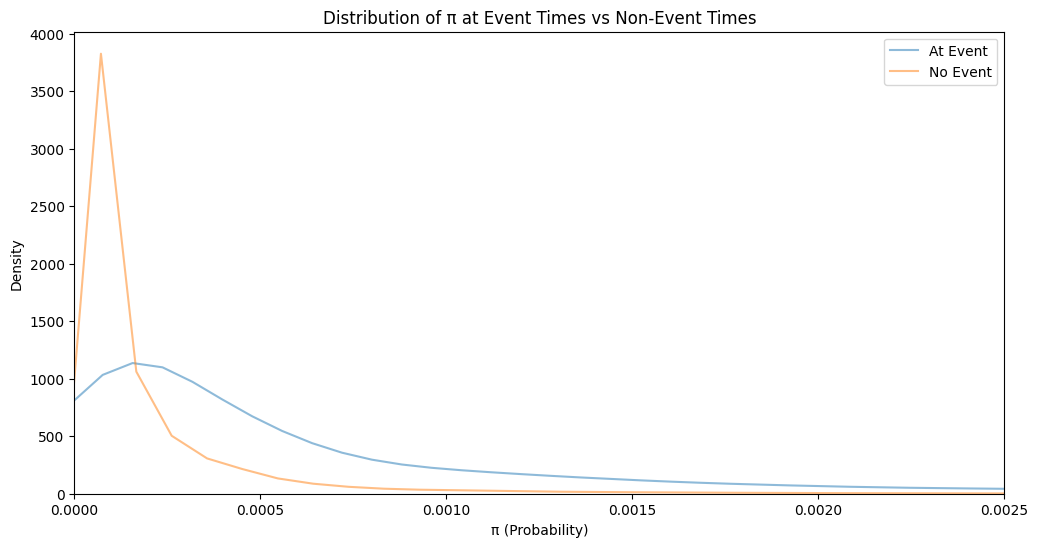


π predictions summary:
At event - mean: 0.0008722241966790239 std: 0.0015484914541511452
No event - mean: 0.00013810747 std: 0.00035502427
Ratio (event/no event): 6.3155468945416695


In [41]:
# Same plot but with restricted x-axis
plt.figure(figsize=(12, 6))
sns.kdeplot(data=pi_at_event, label='At Event', alpha=0.5)
sns.kdeplot(data=pi_not_event, label='No Event', alpha=0.5)
plt.xlabel('π (Probability)')
plt.ylabel('Density')
plt.title('Distribution of π at Event Times vs Non-Event Times')
plt.legend()
plt.xlim(0, 0.0025)  # Restrict x-axis
plt.show()

# Print summary stats
print("\nπ predictions summary:")
print("At event - mean:", np.mean(pi_at_event), "std:", np.std(pi_at_event))
print("No event - mean:", np.mean(pi_not_event), "std:", np.std(pi_not_event))
print("Ratio (event/no event):", np.mean(pi_at_event)/np.mean(pi_not_event))

In [3]:
disease_names = first_model['disease_names']
disease_names = disease_names[0].tolist()

In [50]:
# Load first model to get phi_kd
first_model = torch.load('/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_0_10000/model.pt')
phi_kd = first_model['model_state_dict']['phi']  # Shape should be (K, D)
all_lambdas = np.load('/Users/sarahurbut/aladynoulli2/pyScripts/oldstuff/all_lambdas_combined.npy')
# Calculate pi for all people
# all_lambdas shape is (N, K, T)
# phi_kd shape is (K, D)
# Need to calculate for each timepoint
T = all_lambdas.shape[2]
D = phi_kd.shape[1]


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_27353/2998891733.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load('/Users/sarahurbut/D

In [51]:


# Convert to thetas first
all_thetas = torch.softmax(torch.tensor(all_lambdas), dim=1).numpy()

epsilon = 1e-8
# Convert lambdas to thetas


# Get phi probabilities
phi_prob = torch.sigmoid(torch.tensor(phi_kd)).numpy()



/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_27353/1405816475.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  phi_prob = torch.sigmoid(torch.tensor(phi_kd)).numpy()


In [53]:
import time

# Test with first 10K people
test_size = 10000
test_thetas = all_thetas[:test_size]

# Time the operation
start_time = time.time()
test_pi = np.einsum('nkt,kdt->ndt', test_thetas, phi_prob)
end_time = time.time()

# Calculate timing
elapsed_time = end_time - start_time
estimated_full_time = elapsed_time * (len(all_thetas) / test_size)

print(f"Time for {test_size} people: {elapsed_time:.2f} seconds")
print(f"Estimated time for all {len(all_thetas)} people: {estimated_full_time:.2f} seconds ({estimated_full_time/60:.2f} minutes)")

# Verify shapes and values
print("\nVerification:")
print(f"Test pi shape: {test_pi.shape}")
print(f"Range of values: [{test_pi.min():.6f}, {test_pi.max():.6f}]")
print(f"Mean value: {test_pi.mean():.6f}")

Time for 10000 people: 6.01 seconds
Estimated time for all 400000 people: 240.51 seconds (4.01 minutes)

Verification:
Test pi shape: (10000, 348, 52)
Range of values: [0.000000, 0.018879]
Mean value: 0.000143


In [54]:
# 1. Full calculation
print("Starting full calculation...")
start_time = time.time()
pi_pred = np.einsum('nkt,kdt->ndt', all_thetas, phi_prob)
print(f"Full calculation took: {(time.time() - start_time)/60:.2f} minutes")

# 2. Additional verification
print("\nVerification:")
print(f"Full pi shape: {pi_pred.shape}")
print(f"Range of values: [{pi_pred.min():.6f}, {pi_pred.max():.6f}]")
print(f"Mean value: {pi_pred.mean():.6f}")

Starting full calculation...
Full calculation took: 4.29 minutes

Verification:
Full pi shape: (400000, 348, 52)
Range of values: [0.000000, 0.020623]
Mean value: 0.000143


In [55]:
type(pi_pred)

numpy.ndarray

In [27]:

refs = torch.load('/Users/sarahurbut/aladynoulli2/pyScripts/reference_trajectories.pt')
signature_refs = refs['signature_refs']
# 3. Compare with original model
print("\nComparing with original model predictions...")
# Load and initialize model properly
model_path = '/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_0_10000/model.pt'
checkpoint = torch.load(model_path)

model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=checkpoint['hyperparameters']['N'],
    D=checkpoint['hyperparameters']['D'],
    T=checkpoint['hyperparameters']['T'],
    K=20,
    P=checkpoint['hyperparameters']['P'],
    init_var_scaler=1e-1,
    G=checkpoint['G'],
    Y=checkpoint['Y'],
    genetic_scale=3,
    prevalence_t=checkpoint['prevalence_t'],
    signature_references=signature_refs,
    healthy_reference=True,
    disease_names=checkpoint['disease_names']
)

model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

with torch.no_grad():
    original_pi, _, _ = model.forward()
    #original_pi = original_pi.cpu().numpy()


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_27353/3060232454.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  refs = torch.load('/Users/sarahurbut/aladynou


Comparing with original model predictions...
Lambda kernel condition number: 56314924.00
Phi kernel condition number: 59684776.00

Cluster Sizes:
Cluster 0: 14 diseases
Cluster 1: 7 diseases
Cluster 2: 21 diseases
Cluster 3: 15 diseases
Cluster 4: 17 diseases
Cluster 5: 16 diseases
Cluster 6: 57 diseases
Cluster 7: 18 diseases
Cluster 8: 13 diseases
Cluster 9: 11 diseases
Cluster 10: 18 diseases
Cluster 11: 12 diseases
Cluster 12: 26 diseases
Cluster 13: 7 diseases
Cluster 14: 9 diseases
Cluster 15: 8 diseases
Cluster 16: 7 diseases
Cluster 17: 11 diseases
Cluster 18: 6 diseases
Cluster 19: 55 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 14
Base value (first 5): tensor([-18.4207, -18.4207, -17.3858, -16.3508, -16.3508])
Base value centered (first 5): tensor([-0.5458, -0.5458,  0.4891,  1.5240,  1.5240])
Base value centered mean: 3.23352810482902e-06
Gamma init for k=0 (first 5): tensor([ 0.0013,  0.0101,  0.0173,  0.0224, -0.0156])

Calculating gamma for k=1:
Nu

In [9]:

# Compare first few predictions
print("\nFirst few predictions comparison:")
person_idx = 3000
disease_idx = 0
print(f"Person {person_idx}, Disease {disease_idx}:")
print(f"Our calculation: {pi_pred[person_idx, disease_idx, 0]:.6f}")
print(f"Original model: {original_pi[person_idx, disease_idx, 0]:.6f}")


First few predictions comparison:
Person 3000, Disease 0:
Our calculation: 0.000015
Original model: 0.000015


In [10]:
predicted_risk_2d = np.mean(pi_pred, axis=0)  # Shape will be (348, 52)

print("Predicted risk shape:", predicted_risk_2d.shape)  # Should be (348, 52)
print("Range of values:", predicted_risk_2d.min(), predicted_risk_2d.max())
print("Mean value:", predicted_risk_2d.mean())

Predicted risk shape: (348, 52)
Range of values: 3.0598596846706046e-09 0.008507027960416498
Mean value: 0.00014321941496718245


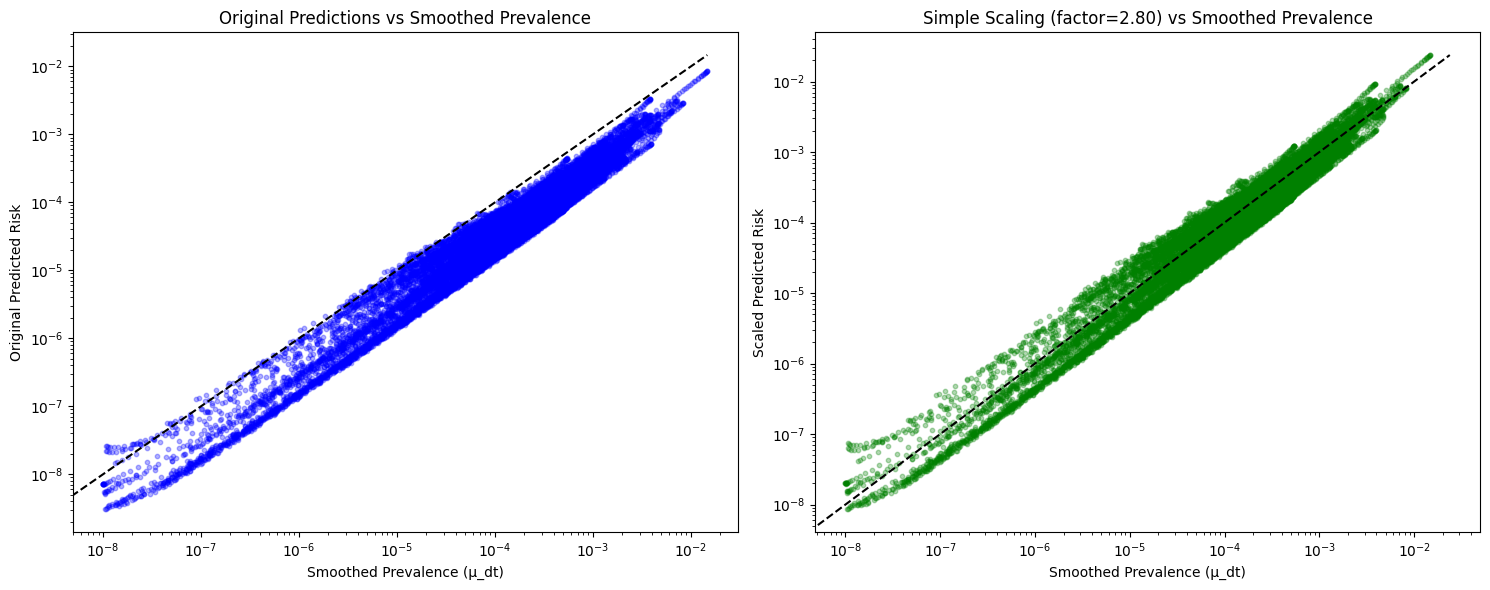

In [15]:
# Get μ_dt from checkpoint and predictions
mu_dt = first_model['prevalence_t']  # Shape: (348, 52)
scale_factor = np.mean(mu_dt) / np.mean(predicted_risk_2d)
scaled_risk_2d = predicted_risk_2d * scale_factor

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Original predictions vs μ_dt
ax1.scatter(mu_dt.flatten(), predicted_risk_2d.flatten(), 
           alpha=0.3, color='blue', s=10)
ax1.plot([0, max(mu_dt.max(), predicted_risk_2d.max())], 
         [0, max(mu_dt.max(), predicted_risk_2d.max())], 
         'k--', label='x=y')
ax1.set_xlabel('Smoothed Prevalence (μ_dt)')
ax1.set_ylabel('Original Predicted Risk')
ax1.set_title('Original Predictions vs Smoothed Prevalence')
ax1.set_xscale('log')
ax1.set_yscale('log')

# Scaled predictions vs μ_dt
ax2.scatter(mu_dt.flatten(), scaled_risk_2d.flatten(), 
           alpha=0.3, color='green', s=10)
ax2.plot([0, max(mu_dt.max(), scaled_risk_2d.max())], 
         [0, max(mu_dt.max(), scaled_risk_2d.max())], 
         'k--', label='x=y')
ax2.set_xlabel('Smoothed Prevalence (μ_dt)')
ax2.set_ylabel('Scaled Predicted Risk')
ax2.set_title(f'Simple Scaling (factor={scale_factor:.2f}) vs Smoothed Prevalence')
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

In [78]:
def load_model_essentials(base_path='/Users/sarahurbut/Dropbox (Personal)/data_for_running/'):
    """
    Load all essential components
    """
    print("Loading components...")
    
    # Load large matrices
    Y = torch.load(base_path + 'Y_tensor.pt')
    E = torch.load(base_path + 'E_matrix.pt')
    G = torch.load(base_path + 'G_matrix.pt')
    
    # Load other components
    essentials = torch.load(base_path + 'model_essentials.pt')
    
    print("Loaded all components successfully!")
    
    return Y, E, G, essentials

# Load and initialize model:
Y, E, G, essentials = load_model_essentials()

# Function to find interesting

Loading components...


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_83563/1032044898.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/va

Loaded all components successfully!


In [ ]:
 cases
def find_theta_changes_at_diagnosis(Y, thetas, n_examples=5):
    interesting_cases = []
    
    # For each person
    for i in range(len(Y)):
        # Find where diagnoses happen
        diagnoses = np.where(Y[i] == 1)
        
        if len(diagnoses[0]) > 0:  # If they have any diagnoses
            for d, t in zip(*diagnoses):
                if t > 0 and t < 51:  # Skip diagnoses at t=0 and ensure we can look before/after
                    # Look at theta change around diagnosis
                    theta_before = thetas[i, :, t-1]
                    theta_after = thetas[i, :, t]
                    
                    # Calculate change in thetas
                    theta_change = np.abs(theta_after - theta_before)
                    
                    if np.max(theta_change) > 0.1:  # Arbitrary threshold
                        interesting_cases.append({
                            'person': i,
                            'disease': d,
                            'time': t,
                            'max_change': np.max(theta_change)
                        })
    
    # Sort by magnitude of change
    interesting_cases.sort(key=lambda x: x['max_change'], reverse=True)
    return interesting_cases[:n_examples]

In [17]:
def find_theta_changes_at_diagnosis(Y, thetas, n_examples=5):
    interesting_cases = []
    
    # For each person (use length of thetas, not Y)
    for i in range(len(thetas)):
        # Find where diagnoses happen
        diagnoses = np.where(Y[i] == 1)
        
        if len(diagnoses[0]) > 0:  # If they have any diagnoses
            for d, t in zip(*diagnoses):
                if t > 0 and t < 51:  # Skip diagnoses at t=0 and ensure we can look before/after
                    # Look at theta change around diagnosis
                    theta_before = thetas[i, :, t-1]
                    theta_after = thetas[i, :, t]
                    
                    # Calculate change in thetas
                    theta_change = np.abs(theta_after - theta_before)
                    
                    if np.max(theta_change) > 0.01:  # Arbitrary threshold
                        interesting_cases.append({
                            'person': i,
                            'disease': d,
                            'time': t,
                            'max_change': np.max(theta_change)
                        })
    
    # Sort by magnitude of change
    interesting_cases.sort(key=lambda x: x['max_change'], reverse=True)
    return interesting_cases[:n_examples]

# Find examples
examples = find_theta_changes_at_diagnosis(Y, all_thetas)

# Print first few examples to verify
print("Found examples:")
for case in examples[:5]:
    print(f"Person {case['person']}: Disease {case['disease']} at time {case['time']}, max change: {case['max_change']:.3f}")

Found examples:
Person 5543: Disease 343 at time 7, max change: 0.045
Person 380356: Disease 52 at time 9, max change: 0.043
Person 380356: Disease 54 at time 9, max change: 0.043
Person 380356: Disease 109 at time 9, max change: 0.043
Person 380356: Disease 194 at time 9, max change: 0.043


In [18]:
# Load cluster assignments
cluster_ids = torch.load('/Users/sarahurbut/Dropbox (Personal)/data_for_running/initial_clusters_400k.pt')
cluster_i=first_model['clusters']

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_6210/3741113616.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cluster_ids = torch.load('/Users/sarahurbut/Dr

In [19]:
cluster_i

array([ 3,  3, 16, 16, 16, 16, 16, 19,  3, 16, 17, 17, 17,  6, 19, 19, 19,
       19,  8,  8,  8, 13,  3, 13,  6,  6,  6,  6,  6,  6,  6,  3,  3, 17,
        3,  2,  3,  3,  3, 19,  8,  8,  3, 19, 19,  7, 15, 15, 15, 15, 15,
        7,  5,  3, 16, 16, 16, 16, 16, 16,  7,  2, 16, 16, 16,  3,  7,  7,
        3,  3, 14,  3,  7,  3,  9,  3,  7, 11,  3,  1,  3,  3, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10,  3,  3,  3, 19, 19,  3, 19, 19,  3, 10,
        3,  3,  3,  0,  0,  0,  0,  7, 19,  5,  5,  5,  5,  5,  5,  0,  3,
        0,  0,  0,  3,  3,  0,  0,  0,  0,  3,  3,  0,  0, 11, 11, 11, 11,
       11, 11, 11,  3,  3,  3,  3,  3,  3, 17, 16, 16,  3,  3,  4,  4,  4,
        3,  3,  4,  3,  4, 14, 16, 14,  7, 14, 14, 14, 14, 14, 14,  0, 16,
       14, 16,  3,  3,  3,  3,  3,  3,  3,  2,  7,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  2,  2,  2,  3,  3,  2,  3, 17, 17, 17,  3, 17, 17, 17,
       16,  3,  7, 17, 17, 16, 18, 17, 17,  7,  3, 18, 18, 18, 18, 18, 18,
       18, 18,  3,  3, 17

In [199]:
# Load cluster assignments
cluster_ids = torch.load('/Users/sarahurbut/Dropbox (Personal)/data_for_running/initial_clusters_400k.pt')
cluster_ids=first_model['clusters']
def find_interesting_cases(Y, all_thetas, cluster_ids, n_examples=5, window=5):
    interesting_cases = {}  # Use dict with person as key to avoid duplicates
    
      # Use length of all_thetas for number of people
    n_people = len(all_thetas)
    print(f"Looking at {n_people} people")
    
    # Look at all people
    for i in range(n_people):
    # Look at all people
    
        # Find their diagnoses
        diseases = np.where(Y[i].sum(axis=1) > 0)[0]
        
        if len(diseases) > 0:
            max_change = 0
            best_case = None
            
            for d in diseases:
                # Get diagnosis time
                t = np.where(Y[i, d] == 1)[0][0]
                
                if t > window and t < (52-window):
                    sig = cluster_ids[d].item()  # Get cluster ID and convert to python scalar
                    
                    # Compare average theta before and after
                    theta_before = np.mean(all_thetas[i, sig, t-window:t])
                    theta_after = np.mean(all_thetas[i, sig, t:t+window])
                    theta_change = theta_after - theta_before
                    
                    if abs(theta_change) > abs(max_change):
                        max_change = theta_change
                        best_case = {
                            'person': i,
                            'disease': d,
                            'time': t,
                            'signature': sig,
                            'theta_change': theta_change
                        }
            
            if best_case and abs(max_change) > 0.05:
                interesting_cases[i] = best_case
    
    # Sort by magnitude of change
    sorted_cases = sorted(interesting_cases.values(), 
                         key=lambda x: abs(x['theta_change']), 
                         reverse=True)
    return sorted_cases[:n_examples]

# Find examples
examples = find_interesting_cases(Y, all_thetas, cluster_ids)

# Print and plot examples
for case in examples:
    print(f"\nPerson {case['person']}:")
    print(f"Disease {case['disease']} (Signature {case['signature']}) at time {case['time']}")
    print(f"Theta change: {case['theta_change']:.3f}")

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/855840030.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cluster_ids = torch.load('/Users/sarahurbut/Dro

Looking at 400000 people

Person 380356:
Disease 52 (Signature 5) at time 9
Theta change: 0.199

Person 200168:
Disease 111 (Signature 5) at time 9
Theta change: 0.197

Person 97169:
Disease 115 (Signature 5) at time 9
Theta change: 0.190

Person 190575:
Disease 52 (Signature 5) at time 11
Theta change: 0.174

Person 294097:
Disease 112 (Signature 5) at time 9
Theta change: 0.171


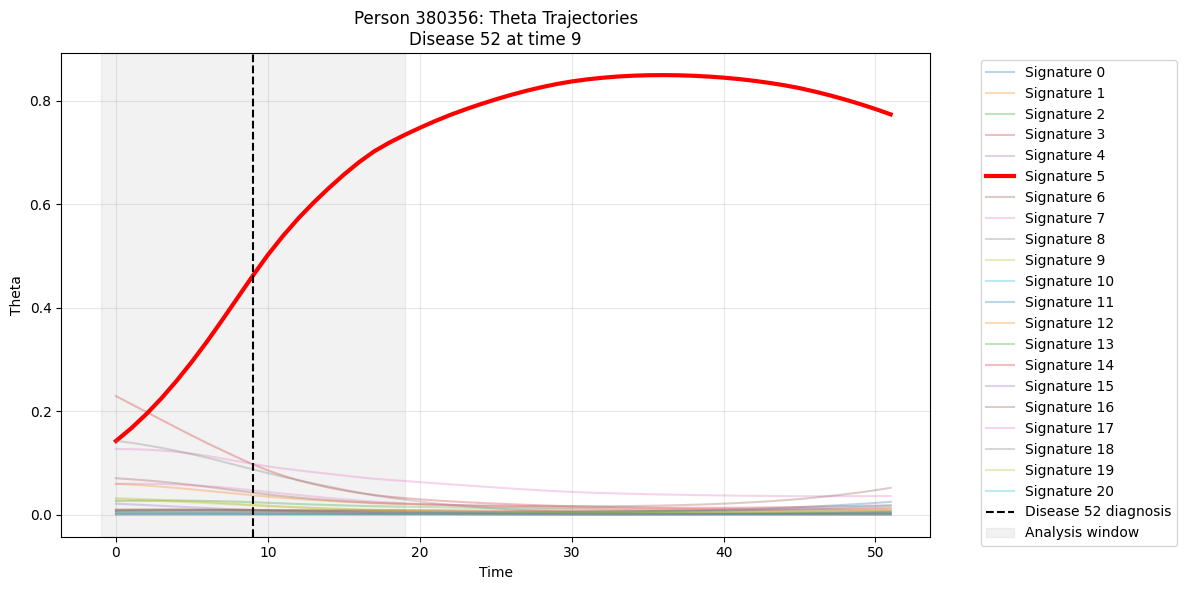

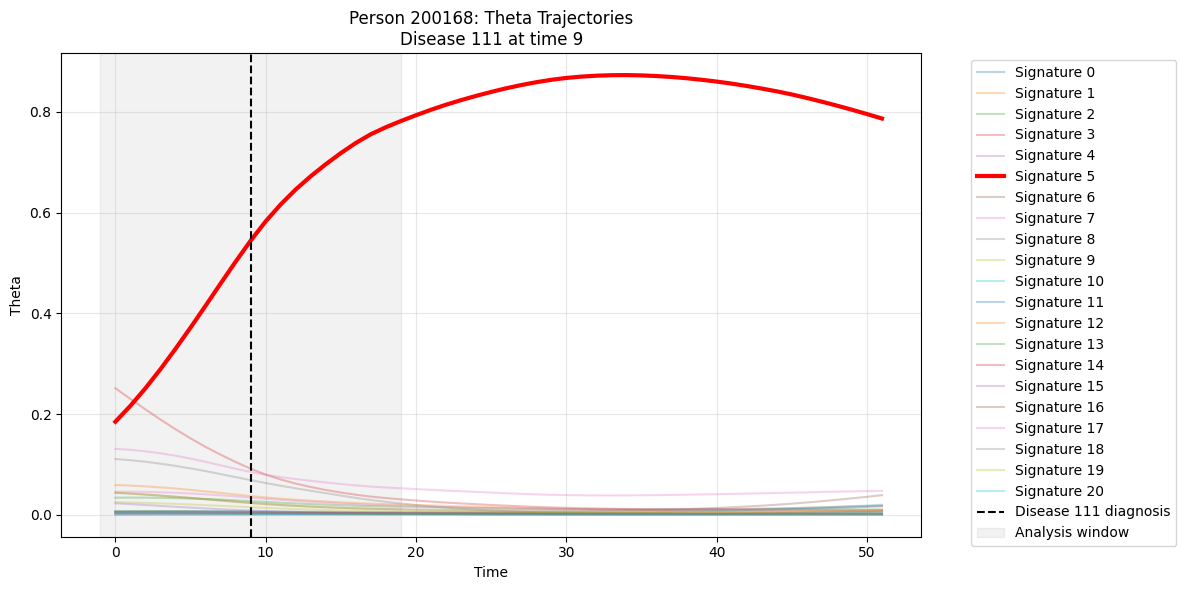

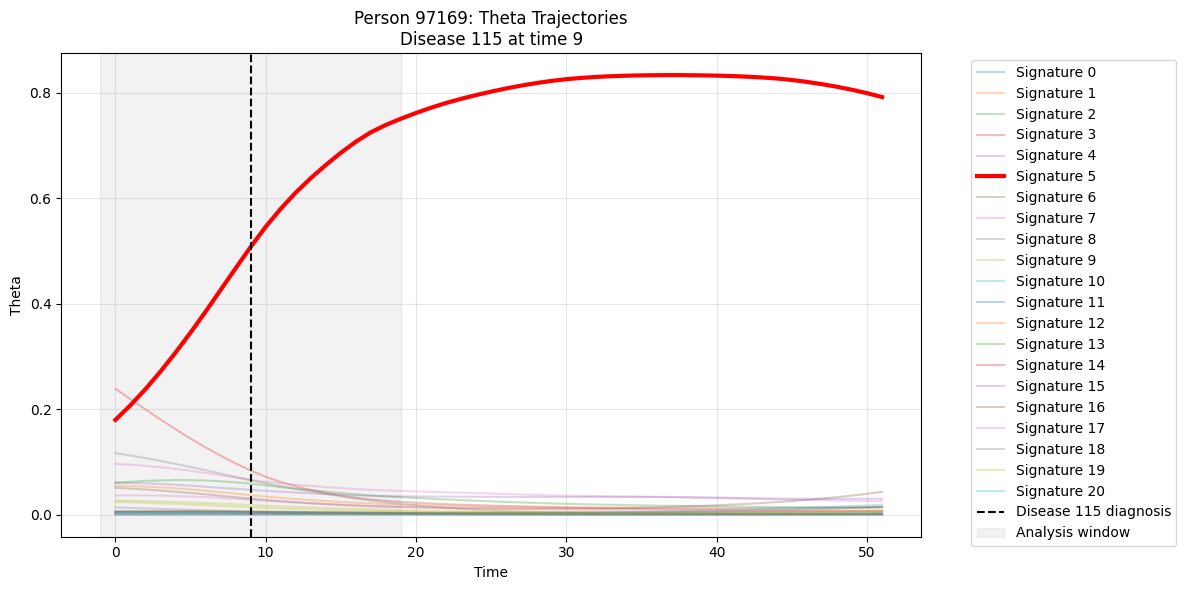

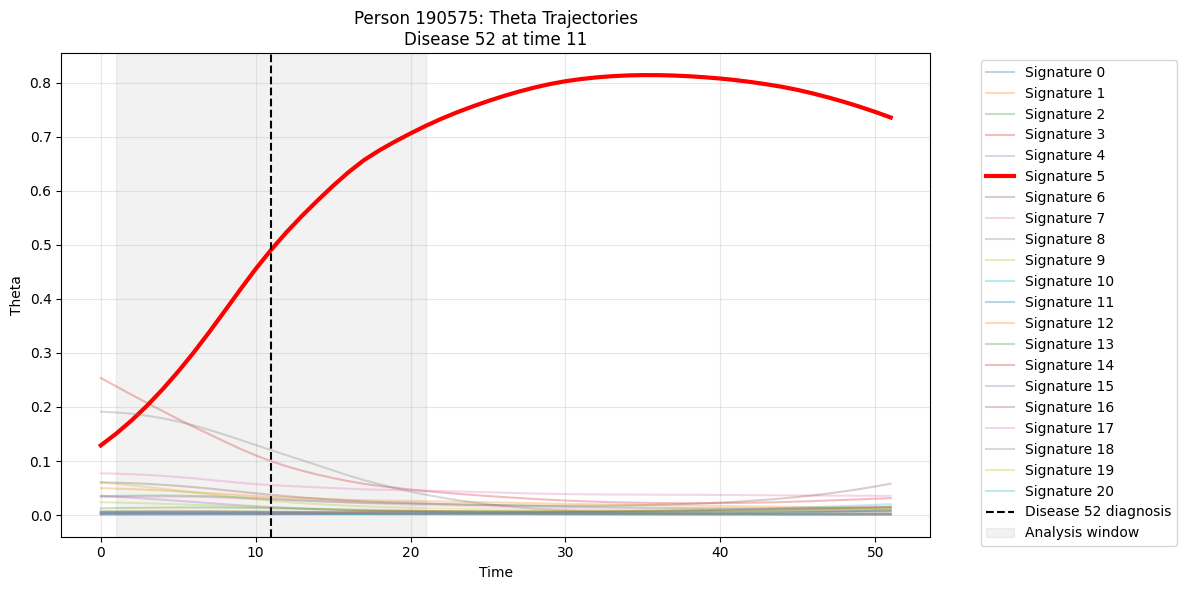

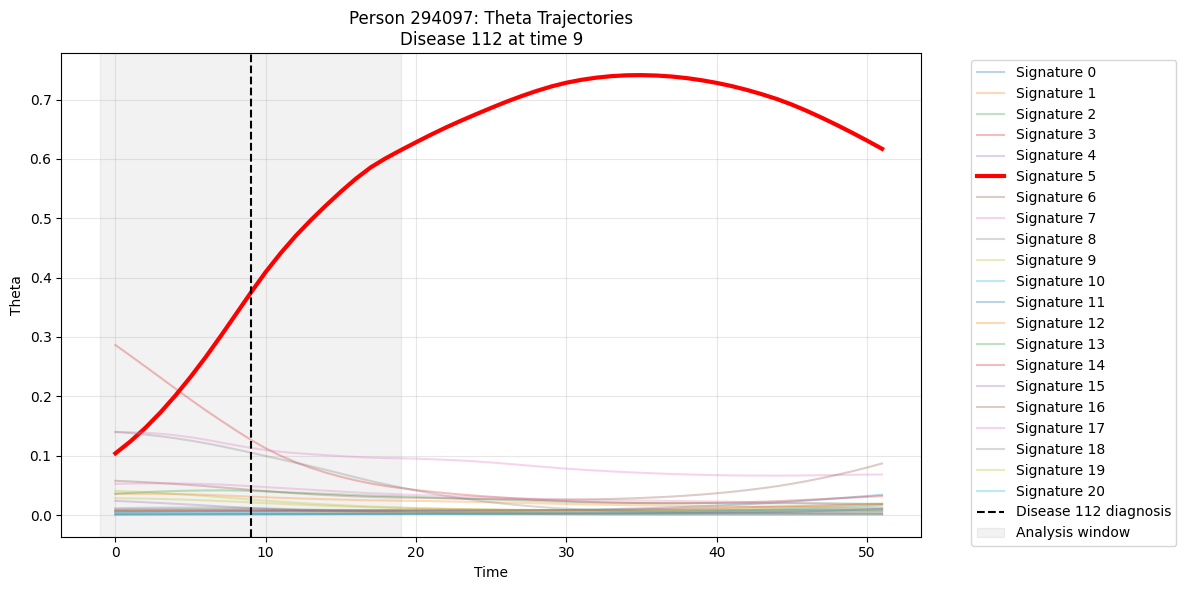

In [35]:
def plot_interesting_case(person_idx, disease_idx, time_idx, sig_idx, Y, all_thetas, window=10):
    plt.figure(figsize=(12, 6))
    
    # Plot all theta trajectories
    for k in range(all_thetas.shape[1]):  # Loop through all signatures
        if k == sig_idx:
            # Highlight the signature of interest
            plt.plot(all_thetas[person_idx, k, :], 
                    label=f'Signature {k}', 
                    linewidth=3, 
                    color='red')
        else:
            # Plot other signatures with lower opacity
            plt.plot(all_thetas[person_idx, k, :], 
                    label=f'Signature {k}', 
                    alpha=0.3)
    
    # Add vertical line for diagnosis
    plt.axvline(x=time_idx, color='black', linestyle='--', 
                label=f'Disease {disease_idx} diagnosis')
    
    # Add shaded region for the window we used
    plt.axvspan(time_idx-window, time_idx+window, 
                color='gray', alpha=0.1, 
                label='Analysis window')
    
    plt.title(f'Person {person_idx}: Theta Trajectories\nDisease {disease_idx} at time {time_idx}')
    plt.xlabel('Time')
    plt.ylabel('Theta')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot each interesting case
for case in examples[:5]:
    plot_interesting_case(
        case['person'], 
        case['disease'], 
        case['time'], 
        case['signature'],
        Y, 
        all_thetas
    )

In [205]:
# Get all diseases for this patient
patient_idx = 380356
disease_occurrences = Y[patient_idx,:,:].sum(axis=1)
diseases = np.where(disease_occurrences > 0)[0]

# Print diseases and their indices
for disease_idx in diseases:
    print(f"Disease {disease_idx}: {disease_names[disease_idx]}")

Disease 1: Viral Enteritis
Disease 3: Bacterial infection NOS
Disease 8: Viral infection
Disease 45: Hypothyroidism NOS
Disease 46: Type 1 diabetes
Disease 47: Type 2 diabetes
Disease 50: Hypoglycemia
Disease 52: Hypercholesterolemia
Disease 54: Disorders of calcium/phosphorus metabolism
Disease 60: Obesity
Disease 62: Other anemias
Disease 66: Major depressive disorder
Disease 95: Other disorders of eyelids
Disease 99: Epiphora
Disease 104: Hearing loss
Disease 109: Essential hypertension
Disease 161: Asthma
Disease 170: Respiratory failure
Disease 180: GERD
Disease 194: Inguinal hernia
Disease 195: Diaphragmatic hernia
Disease 201: Noninfectious gastroenteritis
Disease 236: Urinary tract infection
Disease 290: Scar conditions and fibrosis of skin
Disease 345: Atopic/contact dermatitis due to other or unspecified


In [215]:
signature_refs.shape

torch.Size([20, 52])

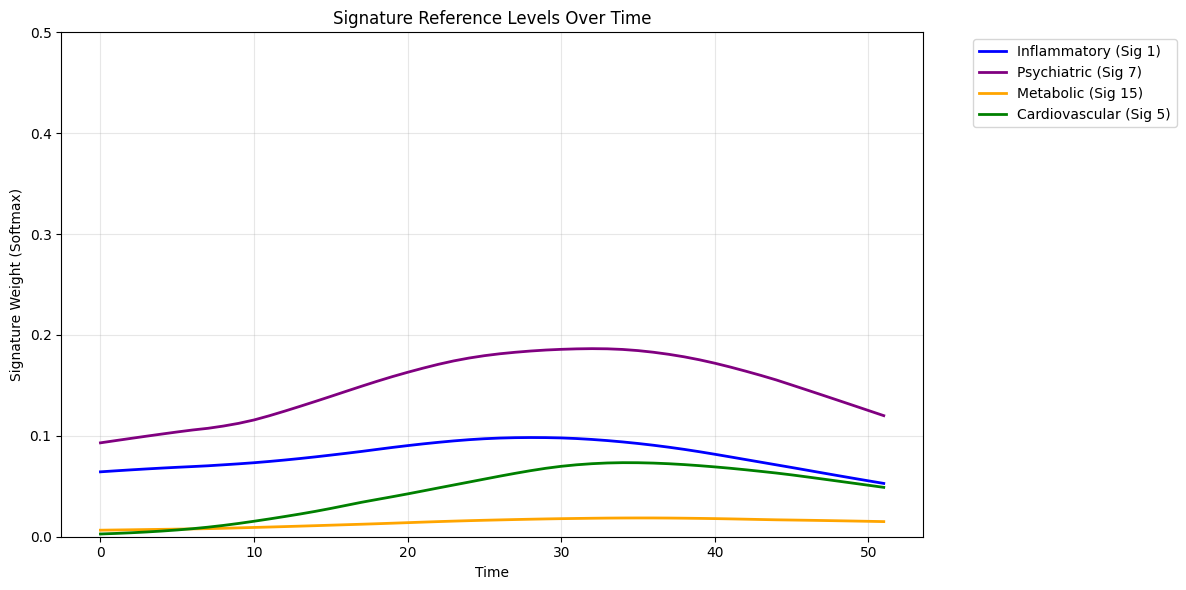

In [222]:
def plot_signature_references_over_time(signature_refs):
    """
    Plot reference levels for key signatures over time using softmax of signature_refs
    """
    # Apply softmax to signature_refs over time
    refs_softmax = torch.nn.functional.softmax(signature_refs, dim=0)  # Shape: [20, 521]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    key_sigs = {
        1: ('Inflammatory (Sig 1)', 'blue'),
        7: ('Psychiatric (Sig 7)', 'purple'),
        15: ('Metabolic (Sig 15)', 'orange'),
        5: ('Cardiovascular (Sig 5)', 'green')
    }
    
    # Plot each key signature's reference level over time
    for sig_idx, (sig_name, color) in key_sigs.items():
        ref_vals = refs_softmax[sig_idx, :]  # Get all timepoints
        ax.plot(ref_vals, color=color, label=f'{sig_name}', linewidth=2)
    
    ax.set_title('Signature Reference Levels Over Time')
    ax.set_xlabel('Time')
    ax.set_ylabel('Signature Weight (Softmax)')
    ax.set_ylim(0, 0.5)
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    return fig

# Plot references over time
fig = plot_signature_references_over_time(signature_refs)
plt.show()

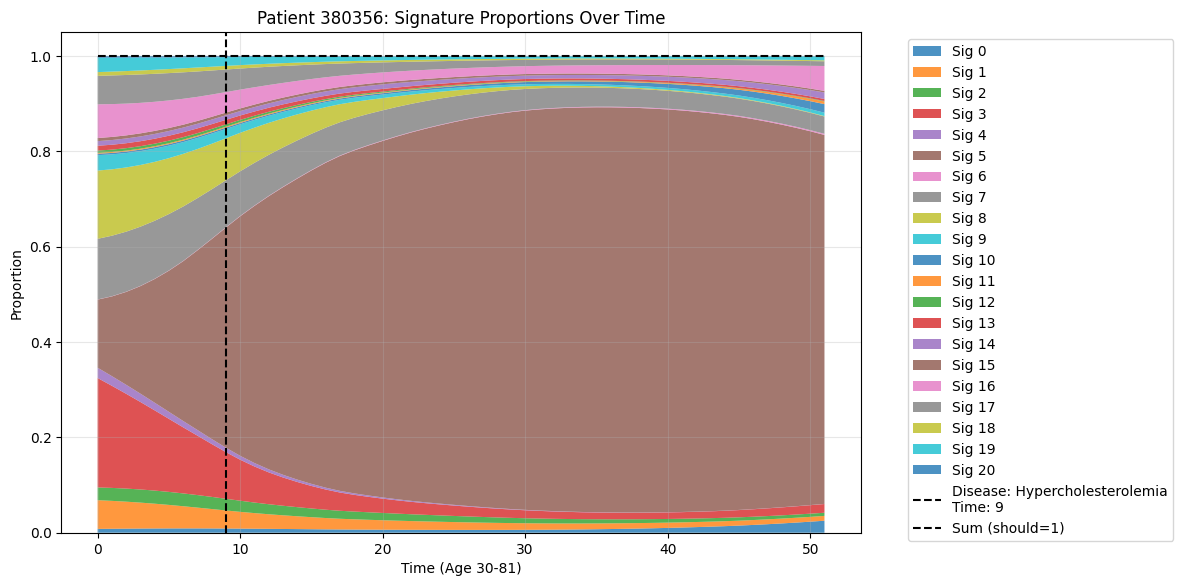

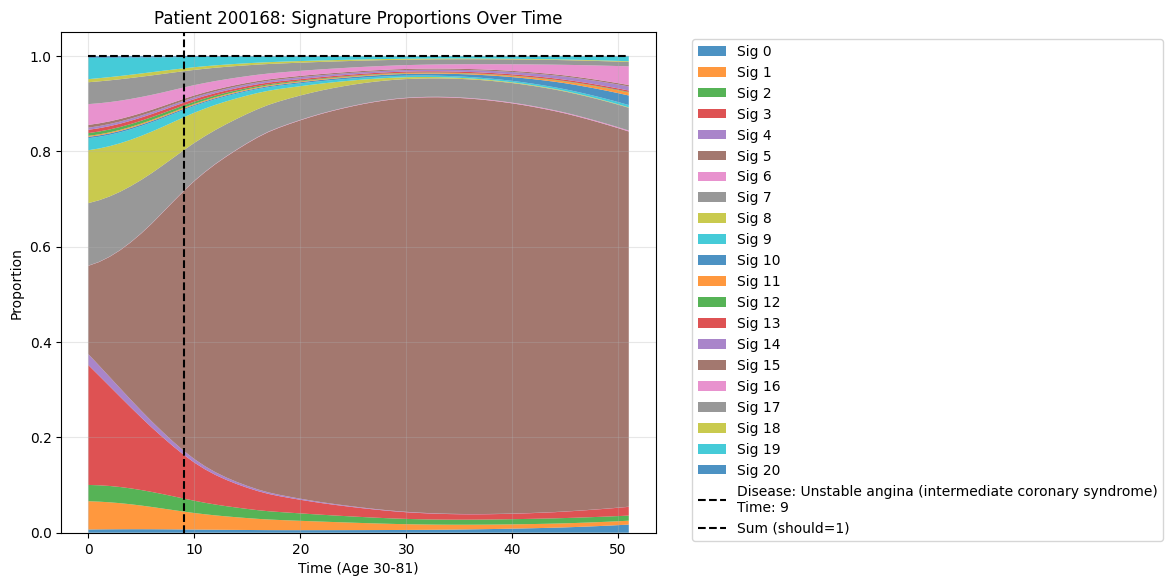

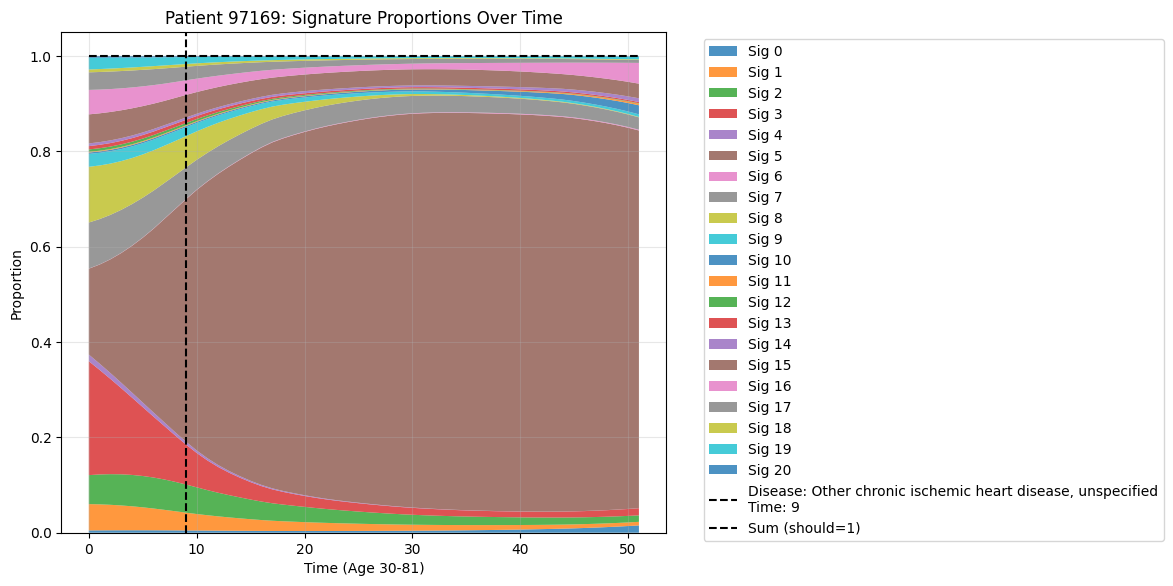

In [39]:
def plot_signature_proportions(person_idx, disease_idx, time_idx, Y, all_thetas, disease_names):
    plt.figure(figsize=(12, 6))
    
    # Create stacked area plot
    times = range(52)
    thetas = all_thetas[person_idx]  # Shape: (K, T)
    
    # Plot stacked areas
    plt.stackplot(times, thetas, 
                 labels=[f'Sig {k}' for k in range(len(thetas))],
                 alpha=0.8)
    
    # Add vertical line for diagnosis
    plt.axvline(x=time_idx, color='black', linestyle='--', 
                label=f'Disease: {disease_names[disease_idx]}\nTime: {time_idx}')
    
    # Add sum line to verify it equals 1
    plt.plot(times, np.sum(thetas, axis=0), 'k--', label='Sum (should=1)')
    
    plt.title(f'Patient {person_idx}: Signature Proportions Over Time')
    plt.xlabel('Time (Age 30-81)')
    plt.ylabel('Proportion')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot for each interesting case
for case in examples[:3]:  # Show first 3 cases
    plot_signature_proportions(
        case['person'], 
        case['disease'], 
        case['time'],
        Y, 
        all_thetas,
        disease_names
    )

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_28551/565054179.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  exp_refs = np.exp(signature_refs)


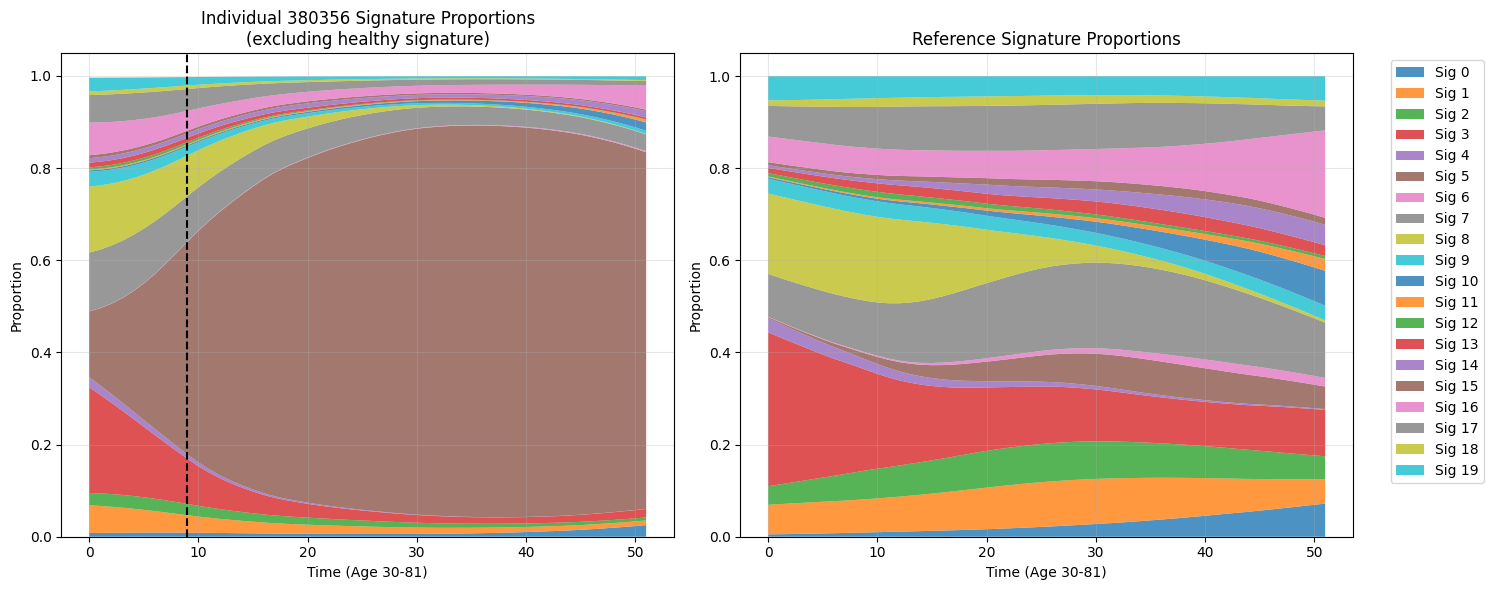

In [44]:
def convert_to_thetas(signature_refs):
    # Apply softmax to convert to proportions
    exp_refs = np.exp(signature_refs)
    return exp_refs / exp_refs.sum(axis=0, keepdims=True)

def plot_signature_comparison(person_idx, disease_idx, time_idx, all_thetas, signature_refs):
    plt.figure(figsize=(15, 6))
    
    # Individual's proportions
    plt.subplot(1, 2, 1)
    times = range(52)
    thetas = all_thetas[person_idx]  # Shape: (K, T)
    
    # Plot all signatures except healthy (last one)
    plt.stackplot(times, thetas[:-1], 
                 labels=[f'Sig {k}' for k in range(len(thetas)-1)],
                 alpha=0.8)
    
    plt.axvline(x=time_idx, color='black', linestyle='--', 
                label=f'Disease {disease_idx} diagnosis')
    
    plt.title(f'Individual {person_idx} Signature Proportions\n(excluding healthy signature)')
    plt.xlabel('Time (Age 30-81)')
    plt.ylabel('Proportion')
    plt.grid(True, alpha=0.3)
    
    # Reference signatures converted to thetas
    plt.subplot(1, 2, 2)
    ref_thetas = convert_to_thetas(signature_refs)
    plt.stackplot(times, ref_thetas,
                 labels=[f'Sig {k}' for k in range(ref_thetas.shape[0])],
                 alpha=0.8)
    
    plt.title('Reference Signature Proportions')
    plt.xlabel('Time (Age 30-81)')
    plt.ylabel('Proportion')
    plt.grid(True, alpha=0.3)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot for first interesting case
case = examples[0]
plot_signature_comparison(
    case['person'], 
    case['disease'], 
    case['time'],
    all_thetas,
    signature_refs
)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_28551/565054179.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  exp_refs = np.exp(signature_refs)


Top 10 cases with largest deviations from reference:

Person 76310:
Disease 52 (Signature 5) at time 44
Deviation from reference: 0.864

Person 321461:
Disease 52 (Signature 5) at time 35
Deviation from reference: 0.859

Person 321461:
Disease 111 (Signature 5) at time 35
Deviation from reference: 0.859

Person 321461:
Disease 113 (Signature 5) at time 35
Deviation from reference: 0.859

Person 321461:
Disease 114 (Signature 5) at time 35
Deviation from reference: 0.859

Person 321461:
Disease 115 (Signature 5) at time 35
Deviation from reference: 0.859

Person 126303:
Disease 112 (Signature 5) at time 30
Deviation from reference: 0.857

Person 321461:
Disease 112 (Signature 5) at time 27
Deviation from reference: 0.856

Person 123403:
Disease 113 (Signature 5) at time 32
Deviation from reference: 0.855

Person 123403:
Disease 115 (Signature 5) at time 31
Deviation from reference: 0.854


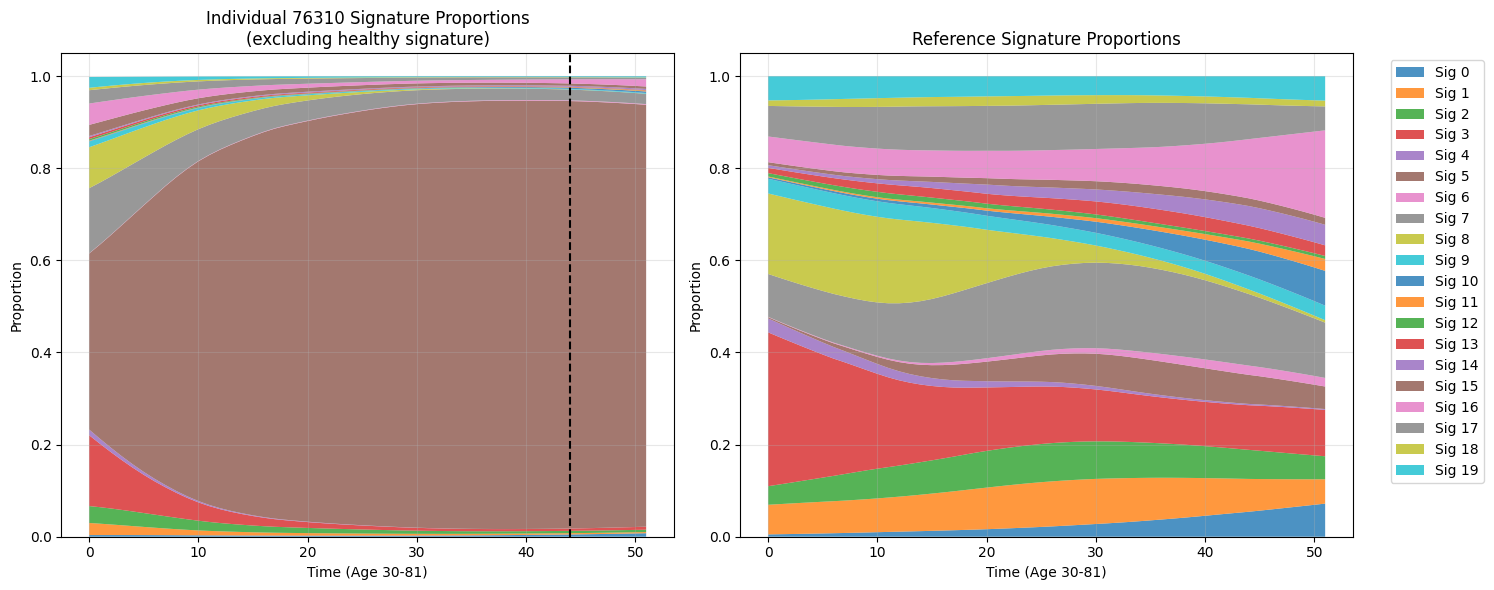

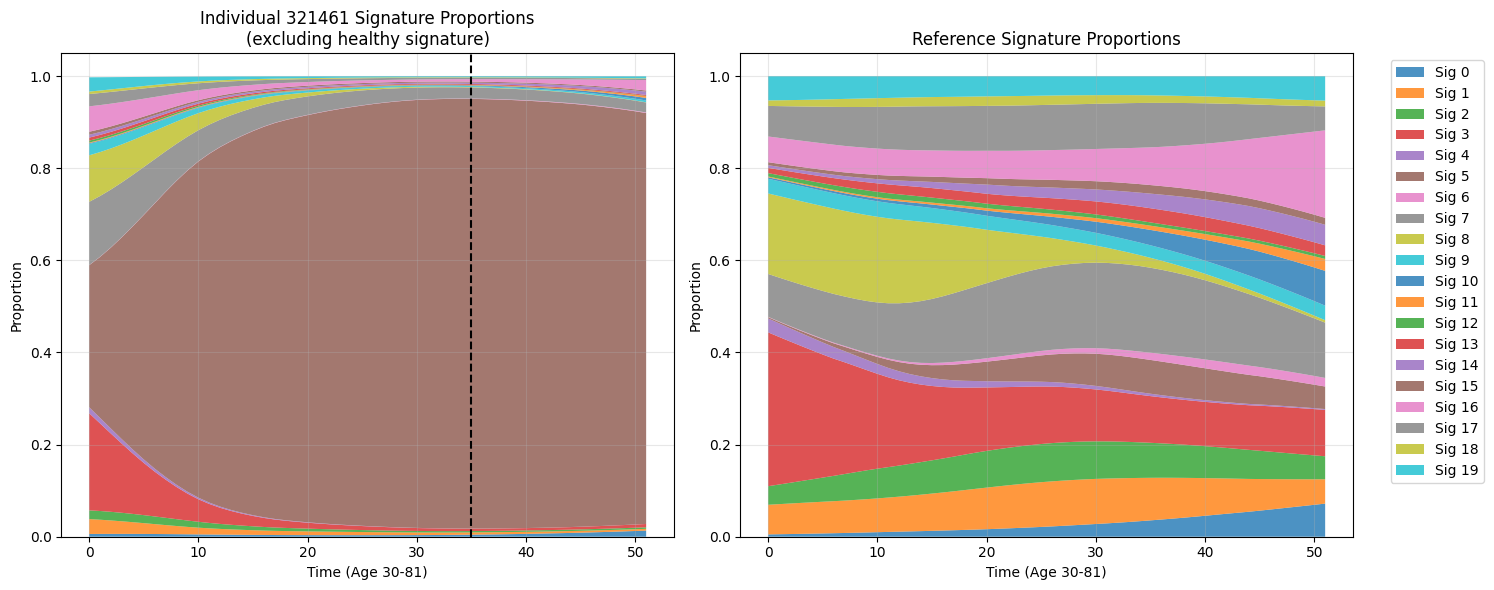

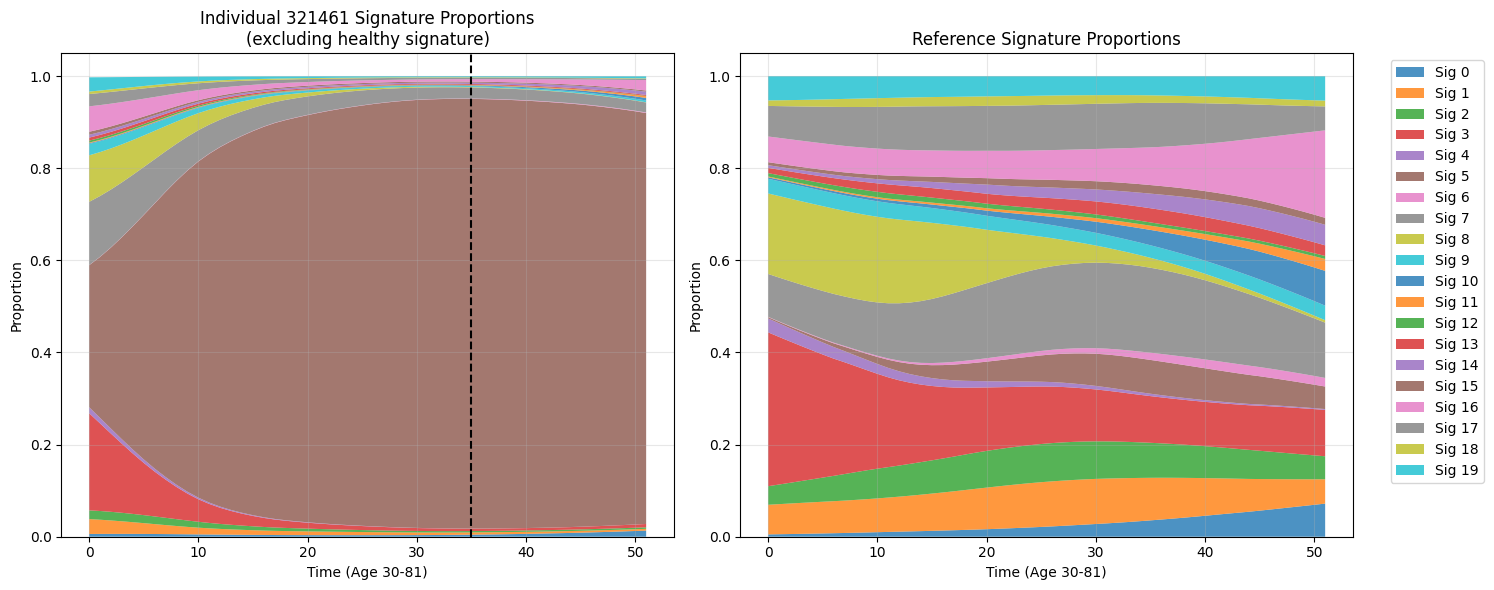

In [47]:
def calculate_deviation_index(Y, all_thetas, signature_refs, cluster_ids, window=5):
    deviations = []
    ref_thetas = convert_to_thetas(signature_refs)
    
    # Convert to numpy if they're tensors
    if torch.is_tensor(ref_thetas):
        ref_thetas = ref_thetas.numpy()
    if torch.is_tensor(all_thetas):
        all_thetas = all_thetas.numpy()
    if torch.is_tensor(Y):
        Y = Y.numpy()
    if torch.is_tensor(cluster_ids):
        cluster_ids = cluster_ids.numpy()
    
    # For each person
    for i in range(len(all_thetas)):
        # Find their diagnoses
        diseases = np.where(Y[i].sum(axis=1) > 0)[0]
        
        if len(diseases) > 0:
            for d in diseases:
                t = np.where(Y[i, d] == 1)[0][0]
                sig = cluster_ids[d].item() if hasattr(cluster_ids[d], 'item') else cluster_ids[d]
                
                if t > window and t < (52-window):
                    # Get person's theta trajectory for this signature
                    person_theta = all_thetas[i, sig, t-window:t+window]
                    # Get reference trajectory for same period
                    ref_theta = ref_thetas[sig, t-window:t+window]
                    
                    # Calculate deviation
                    deviation = np.mean(np.abs(person_theta - ref_theta))
                    
                    deviations.append({
                        'person': i,
                        'disease': d,
                        'time': t,
                        'signature': sig,
                        'deviation': deviation
                    })
    
    # Sort by deviation
    deviations.sort(key=lambda x: x['deviation'], reverse=True)
    return deviations

# Calculate deviations
deviations = calculate_deviation_index(Y, all_thetas, signature_refs, cluster_ids)

# Print top 10 most deviant cases
print("Top 10 cases with largest deviations from reference:")
for d in deviations[:10]:
    print(f"\nPerson {d['person']}:")
    print(f"Disease {d['disease']} (Signature {d['signature']}) at time {d['time']}")
    print(f"Deviation from reference: {d['deviation']:.3f}")
    
# Plot a few of these cases
for d in deviations[:3]:
    plot_signature_comparison(
        d['person'],
        d['disease'],
        d['time'],
        all_thetas,
        signature_refs
    )

np.str_('Malignant neoplasm of female breast')


Found 773 cases of Sig5_to_Sig7


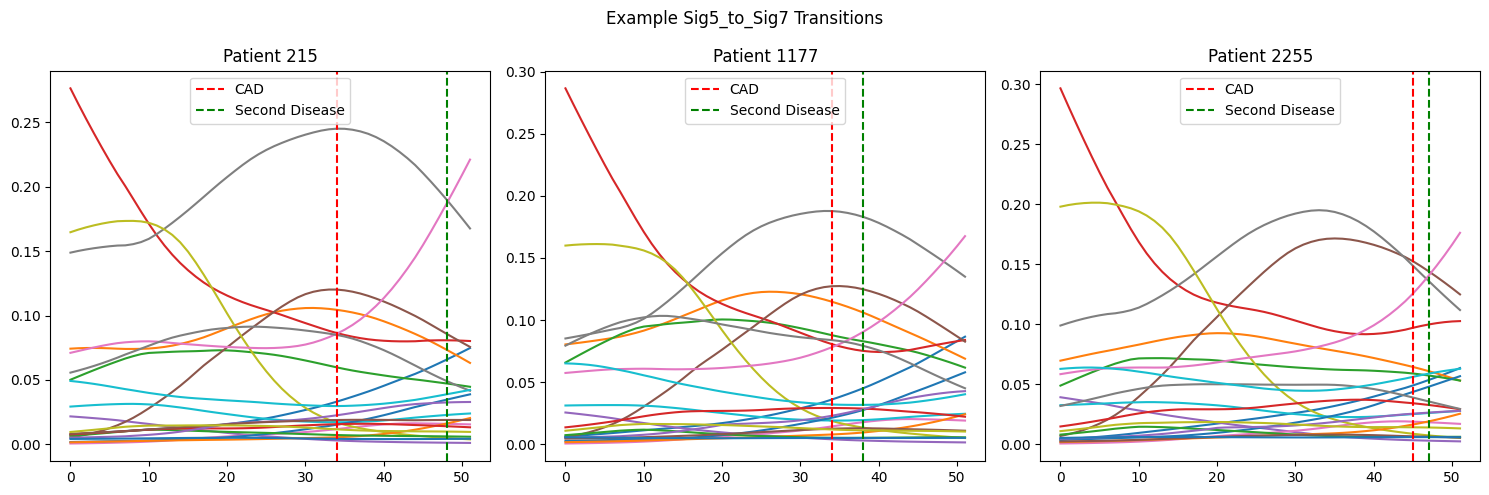

In [155]:
def find_signature_transitions(thetas, Y, sig_pairs=[(5,19), (5,7)], window=5):
    """
    Find patients with interesting signature transitions
    e.g., Sig 5 (CAD) → Sig 19 (Breast) or Sig 7 (MDD)
    """
    interesting_cases = {f"Sig{a}_to_Sig{b}": [] for a,b in sig_pairs}
    
    # Disease indices
    cad_idx = 114  # CAD
    breast_idx = 17  # Breast cancer
    mdd_idx = 66   # Major depression
    
    for pt_idx in range(len(thetas)):
        # For each signature transition pattern
        for first_sig, second_sig in sig_pairs:
            
            # Find if/when they got CAD
            if torch.any(Y[pt_idx, cad_idx] == 1):
                cad_time = torch.where(Y[pt_idx, cad_idx] == 1)[0][0].item()
                
                # Check if Sig 5 was elevated before CAD
                pre_cad = max(0, cad_time - window)
                sig5_elevated = (thetas[pt_idx, first_sig, pre_cad:cad_time].mean() > 
                               thetas[pt_idx, :, pre_cad:cad_time].mean() + 
                               thetas[pt_idx, :, pre_cad:cad_time].std())
                
                if sig5_elevated:
                    # Check for subsequent disease and signature elevation
                    disease_idx = breast_idx if second_sig == 19 else mdd_idx
                    if torch.any(Y[pt_idx, disease_idx] == 1):
                        disease_time = torch.where(Y[pt_idx, disease_idx] == 1)[0][0].item()
                        if disease_time > cad_time:
                            # Check if second signature becomes elevated
                            around_disease = slice(max(0, disease_time-window), 
                                                min(disease_time+window, thetas.shape[2]))
                            sig2_elevated = (thetas[pt_idx, second_sig, around_disease].mean() >
                                           thetas[pt_idx, :, around_disease].mean() + 
                                           thetas[pt_idx, :, around_disease].std())
                            
                            if sig2_elevated:
                                interesting_cases[f"Sig{first_sig}_to_Sig{second_sig}"].append({
                                    'patient_idx': pt_idx,
                                    'cad_time': cad_time,
                                    'disease_time': disease_time,
                                    'trajectories': thetas[pt_idx].cpu().numpy() if torch.is_tensor(thetas) else thetas[pt_idx]
                                })
    
    # Plot some examples
    for pattern, cases in interesting_cases.items():
        if cases:
            print(f"\nFound {len(cases)} cases of {pattern}")
            # Plot top 3 most clear examples
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            for i, case in enumerate(cases[:3]):
                axes[i].plot(case['trajectories'].T)
                axes[i].axvline(case['cad_time'], color='r', linestyle='--', label='CAD')
                axes[i].axvline(case['disease_time'], color='g', linestyle='--', label='Second Disease')
                axes[i].set_title(f'Patient {case["patient_idx"]}')
                axes[i].legend()
            plt.suptitle(f'Example {pattern} Transitions')
            plt.tight_layout()
    
    return interesting_cases

# Run the analysis
transitions = find_signature_transitions(all_thetas, Y)

In [151]:
def load_model_essentials(base_path='/Users/sarahurbut/Dropbox (Personal)/data_for_running/'):
    """
    Load all essential components
    """
    print("Loading components...")
    
    # Load large matrices
    Y = torch.load(base_path + 'Y_tensor.pt')
    E = torch.load(base_path + 'E_matrix.pt')
    G = torch.load(base_path + 'G_matrix.pt')
    
    # Load other components
    essentials = torch.load(base_path + 'model_essentials.pt')
    
    print("Loaded all components successfully!")
    
    return Y, E, G, essentials

# Load and initialize model:
Y, E, G, essentials = load_model_essentials()

Loading components...


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/836280224.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/var/

Loaded all components successfully!


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_28551/565054179.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  exp_refs = np.exp(signature_refs)


Top cases with early signature changes:

Person 200168:
Disease 115 (Signature 5) at time 13
Pre-diagnosis deviation: 0.465
Rate of change: 0.036

Person 330140:
Disease 52 (Signature 5) at time 15
Pre-diagnosis deviation: 0.484
Rate of change: 0.034

Person 330140:
Disease 112 (Signature 5) at time 15
Pre-diagnosis deviation: 0.484
Rate of change: 0.034

Person 330140:
Disease 114 (Signature 5) at time 15
Pre-diagnosis deviation: 0.484
Rate of change: 0.034

Person 67045:
Disease 112 (Signature 5) at time 15
Pre-diagnosis deviation: 0.483
Rate of change: 0.033


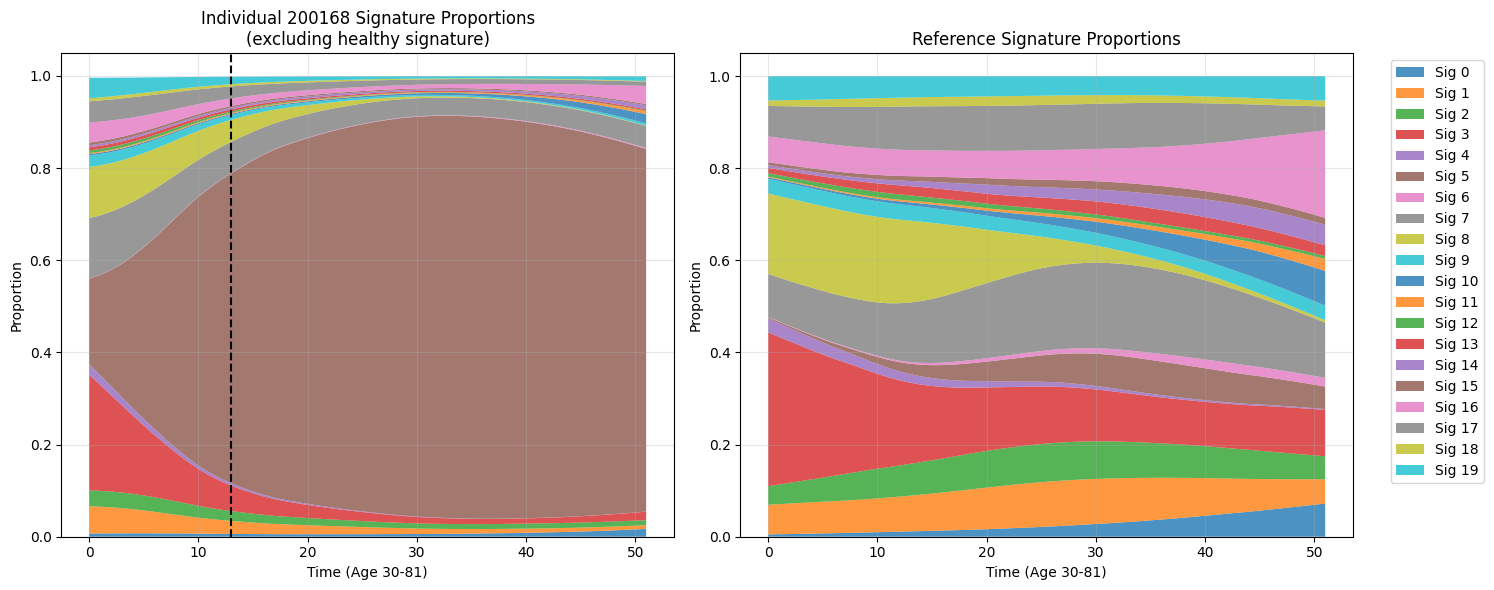

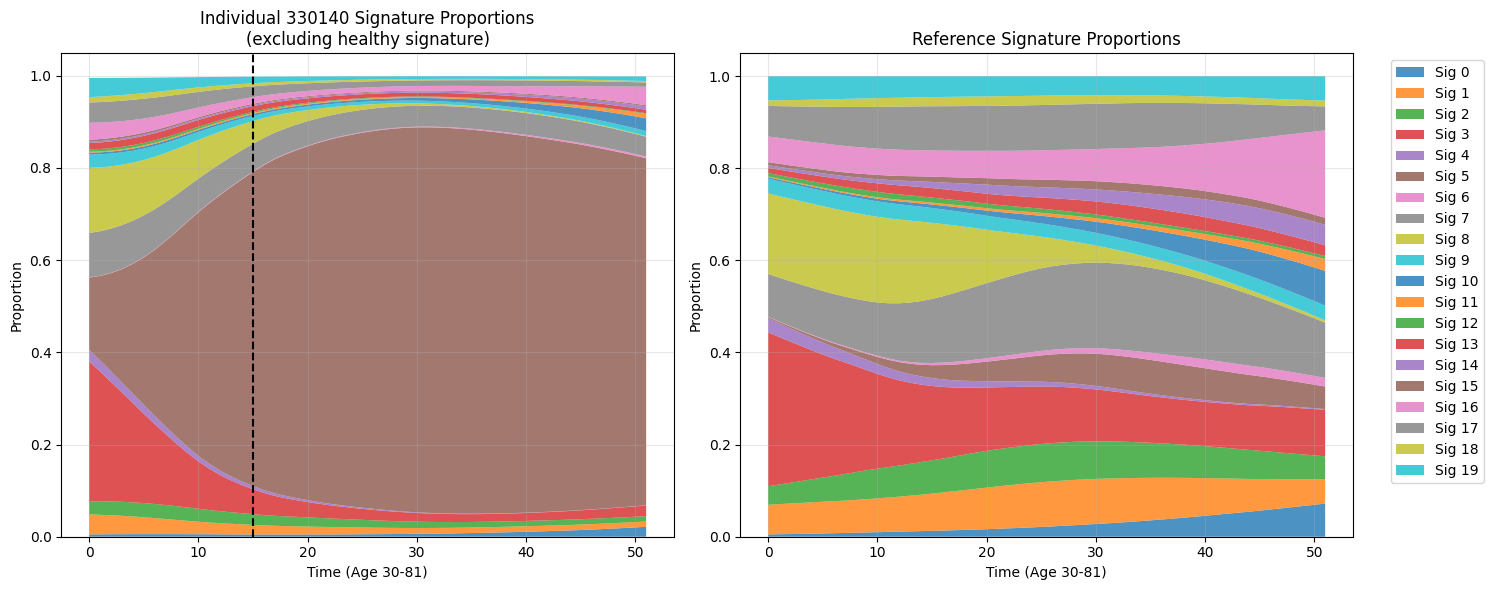

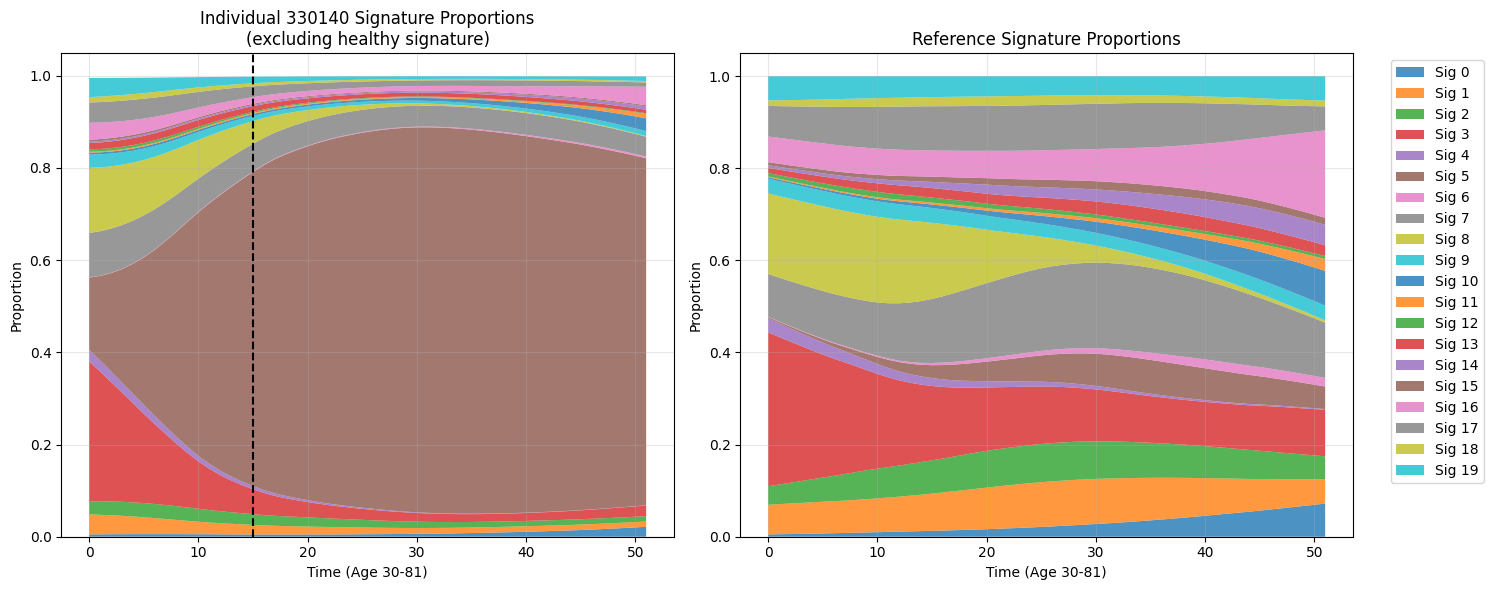

In [48]:
def analyze_predictive_deviation(Y, all_thetas, signature_refs, cluster_ids, pre_window=10, post_window=5):
    predictive_cases = []
    ref_thetas = convert_to_thetas(signature_refs)
    
    # Convert to numpy if needed
    if torch.is_tensor(ref_thetas):
        ref_thetas = ref_thetas.numpy()
    if torch.is_tensor(all_thetas):
        all_thetas = all_thetas.numpy()
    if torch.is_tensor(Y):
        Y = Y.numpy()
    if torch.is_tensor(cluster_ids):
        cluster_ids = cluster_ids.numpy()
    
    for i in range(len(all_thetas)):
        diseases = np.where(Y[i].sum(axis=1) > 0)[0]
        
        for d in diseases:
            t = np.where(Y[i, d] == 1)[0][0]
            sig = cluster_ids[d].item() if hasattr(cluster_ids[d], 'item') else cluster_ids[d]
            
            if t > pre_window:  # Ensure we can look back far enough
                # Calculate deviation in pre-diagnosis window
                pre_person = all_thetas[i, sig, t-pre_window:t]
                pre_ref = ref_thetas[sig, t-pre_window:t]
                pre_deviation = np.mean(np.abs(pre_person - pre_ref))
                
                # Calculate rate of change in signature proportion
                slope = (pre_person[-1] - pre_person[0]) / pre_window
                
                predictive_cases.append({
                    'person': i,
                    'disease': d,
                    'time': t,
                    'signature': sig,
                    'pre_deviation': pre_deviation,
                    'slope': slope
                })
    
    # Sort by pre-diagnosis deviation
    predictive_cases.sort(key=lambda x: abs(x['slope']), reverse=True)
    return predictive_cases

# Find cases with strong predictive patterns
predictive_cases = analyze_predictive_deviation(Y, all_thetas, signature_refs, cluster_ids)

# Print top cases
print("Top cases with early signature changes:")
for case in predictive_cases[:5]:
    print(f"\nPerson {case['person']}:")
    print(f"Disease {case['disease']} (Signature {case['signature']}) at time {case['time']}")
    print(f"Pre-diagnosis deviation: {case['pre_deviation']:.3f}")
    print(f"Rate of change: {case['slope']:.3f}")
    
# Plot these cases
for case in predictive_cases[:3]:
    plot_signature_comparison(
        case['person'],
        case['disease'],
        case['time'],
        all_thetas,
        signature_refs
    )

In [50]:
def analyze_predictive_power(Y, all_thetas, signature_refs, cluster_ids, pre_window=10):
    ref_thetas = convert_to_thetas(signature_refs)
    results = {sig: {'predictive': 0, 'non_predictive': 0} for sig in range(20)}
    
    # Convert to numpy if needed
    if torch.is_tensor(ref_thetas):
        ref_thetas = ref_thetas.numpy()
    if torch.is_tensor(all_thetas):
        all_thetas = all_thetas.numpy()
    if torch.is_tensor(Y):
        Y = Y.numpy()
    if torch.is_tensor(cluster_ids):
        cluster_ids = cluster_ids.numpy()
    
    for i in range(len(all_thetas)):
        diseases = np.where(Y[i].sum(axis=1) > 0)[0]
        
        for d in diseases:
            t = np.where(Y[i, d] == 1)[0][0]
            sig = cluster_ids[d].item() if hasattr(cluster_ids[d], 'item') else cluster_ids[d]
            
            if t > pre_window:
                # Get signature proportions before diagnosis
                person_props = all_thetas[i, sig, t-pre_window:t]
                ref_props = ref_thetas[sig, t-pre_window:t]
                
                # Calculate trend
                person_trend = person_props[-1] - person_props[0]
                ref_trend = ref_props[-1] - ref_props[0]
                
                # Compare to reference at diagnosis
                if person_props[-1] > ref_props[-1] and person_trend > ref_trend:
                    results[sig]['predictive'] += 1
                else:
                    results[sig]['non_predictive'] += 1
    
    # Calculate predictive power for each signature
    print("\nPredictive power by signature:")
    for sig in results:
        total = results[sig]['predictive'] + results[sig]['non_predictive']
        if total > 0:
            pred_power = results[sig]['predictive'] / total
            print(f"\nSignature {sig}:")
            print(f"Total cases: {total}")
            print(f"Predictive cases: {results[sig]['predictive']}")
            print(f"Predictive power: {pred_power:.2%}")
    
    return results

# Run analysis
predictive_power = analyze_predictive_power(Y, all_thetas, signature_refs, cluster_ids)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_28551/565054179.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  exp_refs = np.exp(signature_refs)



Predictive power by signature:

Signature 0:
Total cases: 124878
Predictive cases: 43465
Predictive power: 34.81%

Signature 1:
Total cases: 267684
Predictive cases: 61224
Predictive power: 22.87%

Signature 2:
Total cases: 231590
Predictive cases: 51800
Predictive power: 22.37%

Signature 3:
Total cases: 334883
Predictive cases: 65018
Predictive power: 19.42%

Signature 4:
Total cases: 22020
Predictive cases: 2510
Predictive power: 11.40%

Signature 5:
Total cases: 203072
Predictive cases: 92774
Predictive power: 45.69%

Signature 6:
Total cases: 51186
Predictive cases: 21452
Predictive power: 41.91%

Signature 7:
Total cases: 492131
Predictive cases: 109649
Predictive power: 22.28%

Signature 8:
Total cases: 122723
Predictive cases: 16545
Predictive power: 13.48%

Signature 9:
Total cases: 96747
Predictive cases: 22933
Predictive power: 23.70%

Signature 10:
Total cases: 121408
Predictive cases: 51769
Predictive power: 42.64%

Signature 11:
Total cases: 37204
Predictive cases: 12956

In [11]:
def load_model_essentials(base_path='/Users/sarahurbut/Dropbox (Personal)/data_for_running/'):
    """
    Load all essential components
    """
    print("Loading components...")
    
    # Load large matrices
    Y = torch.load(base_path + 'Y_tensor.pt')
    E = torch.load(base_path + 'E_matrix.pt')
    G = torch.load(base_path + 'G_matrix.pt')
    
    # Load other components
    essentials = torch.load(base_path + 'model_essentials.pt')
    
    print("Loaded all components successfully!")
    
    return Y, E, G, essentials

# Load and initialize model:
Y, E, G, essentials = load_model_essentials()

Loading components...


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_82891/836280224.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/var

Loaded all components successfully!


In [52]:
def analyze_by_disease_count(Y, all_thetas, signature_refs, cluster_ids):
    ref_thetas = convert_to_thetas(signature_refs)
    results = {sig: {n: {'count': 0, 'higher_than_ref': 0} for n in range(1, 6)} for sig in range(20)}
    
    # For each person
    for i in range(len(all_thetas)):
        # Count diseases per signature
        sig_disease_counts = {}
        diseases = np.where(Y[i].sum(axis=1) > 0)[0]
        
        for d in diseases:
            sig = cluster_ids[d].item()
            sig_disease_counts[sig] = sig_disease_counts.get(sig, 0) + 1
        
        # Compare proportions based on disease count
        for sig, count in sig_disease_counts.items():
            if count <= 5:  # Cap at 5+ diseases
                results[sig][count]['count'] += 1
                if all_thetas[i, sig].mean() > ref_thetas[sig].mean():
                    results[sig][count]['higher_than_ref'] += 1
    
    # Print results
    print("\nAnalysis by number of diseases per signature:")
    for sig in sorted(results.keys()):
        print(f"\nSignature {sig}:")
        for n_diseases in range(1, 6):
            data = results[sig][n_diseases]
            if data['count'] > 0:
                success_rate = data['higher_than_ref'] / data['count']
                print(f"{n_diseases} disease(s): {data['count']} people, {success_rate:.2%} higher than ref")

# Run analysis
analyze_by_disease_count(Y, all_thetas, signature_refs, cluster_ids)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_28551/565054179.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  exp_refs = np.exp(signature_refs)



Analysis by number of diseases per signature:

Signature 0:
1 disease(s): 36636 people, 40.55% higher than ref
2 disease(s): 12557 people, 42.44% higher than ref
3 disease(s): 6205 people, 43.42% higher than ref
4 disease(s): 3696 people, 44.99% higher than ref
5 disease(s): 2187 people, 47.92% higher than ref

Signature 1:
1 disease(s): 77512 people, 40.80% higher than ref
2 disease(s): 37290 people, 42.66% higher than ref
3 disease(s): 17484 people, 43.18% higher than ref
4 disease(s): 8023 people, 45.41% higher than ref
5 disease(s): 3478 people, 49.28% higher than ref

Signature 2:
1 disease(s): 44477 people, 40.36% higher than ref
2 disease(s): 28017 people, 41.13% higher than ref
3 disease(s): 16356 people, 43.43% higher than ref
4 disease(s): 8854 people, 45.10% higher than ref
5 disease(s): 4580 people, 47.07% higher than ref

Signature 3:
1 disease(s): 119753 people, 39.87% higher than ref
2 disease(s): 49402 people, 38.42% higher than ref
3 disease(s): 20222 people, 37.17% h


Found 8566 cases of inflammatory_to_CAD

Found 32647 cases of depression_to_CAD

Found 205 cases of metabolic_to_CAD


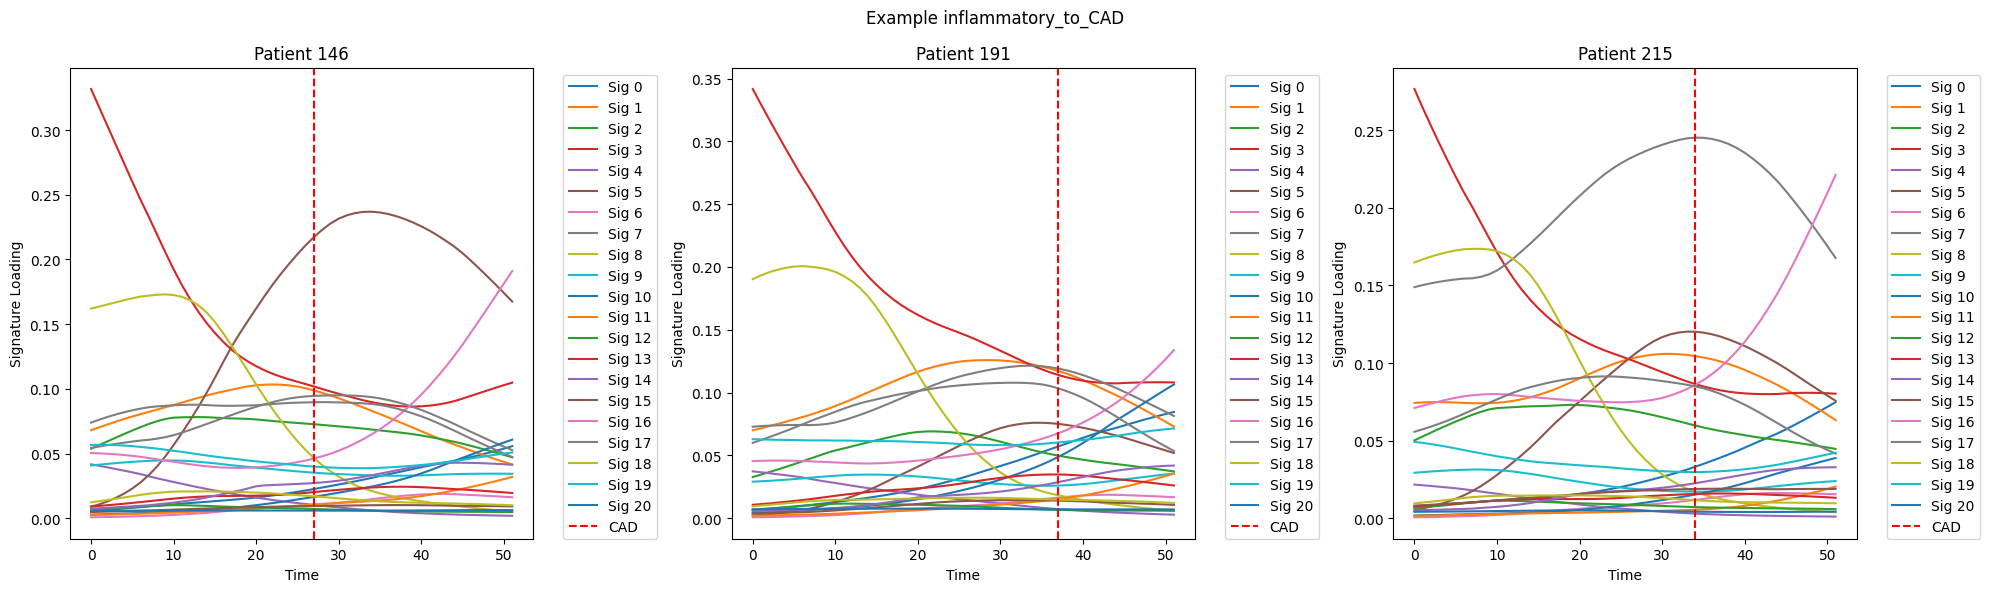

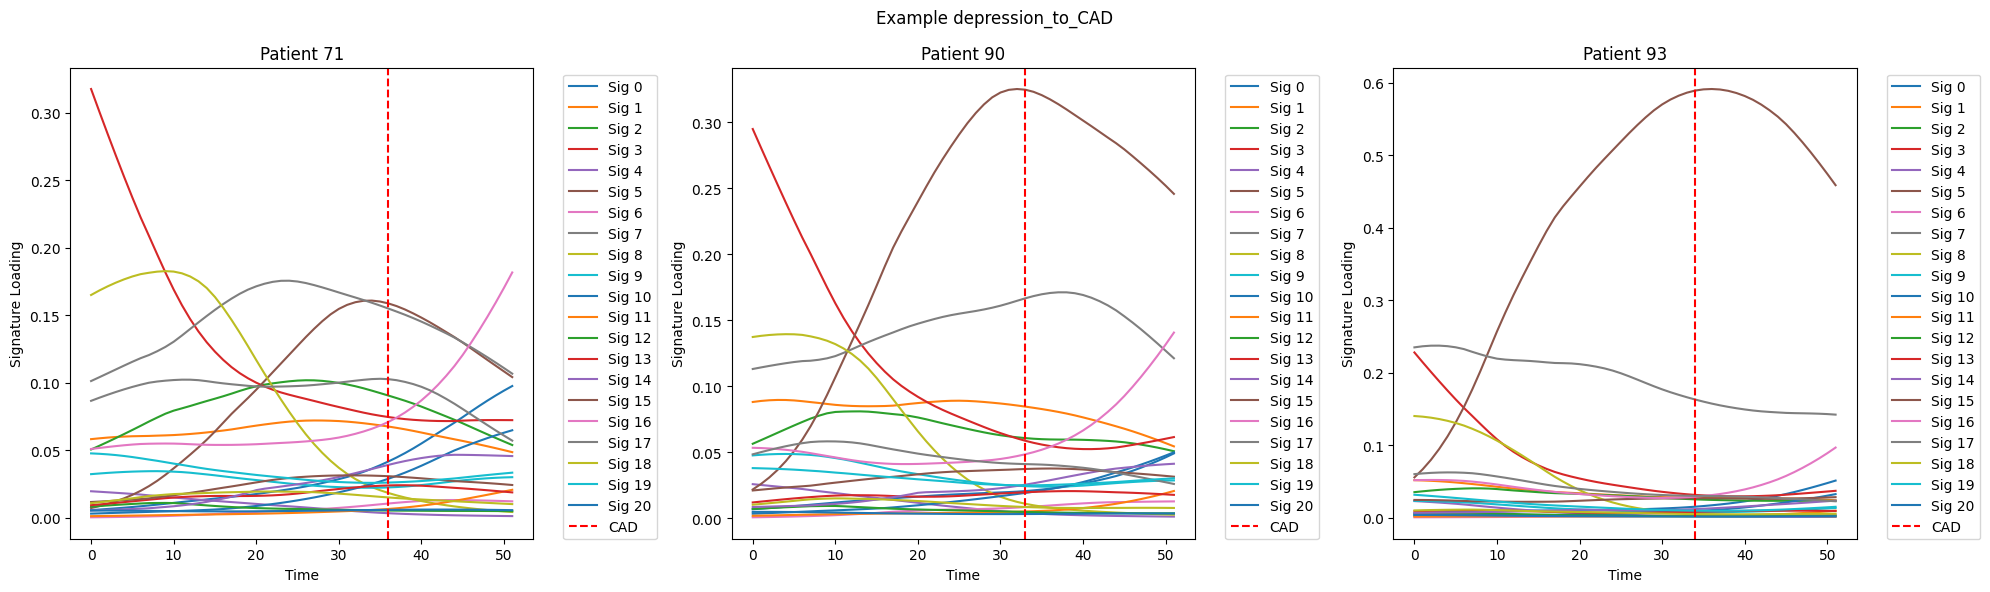

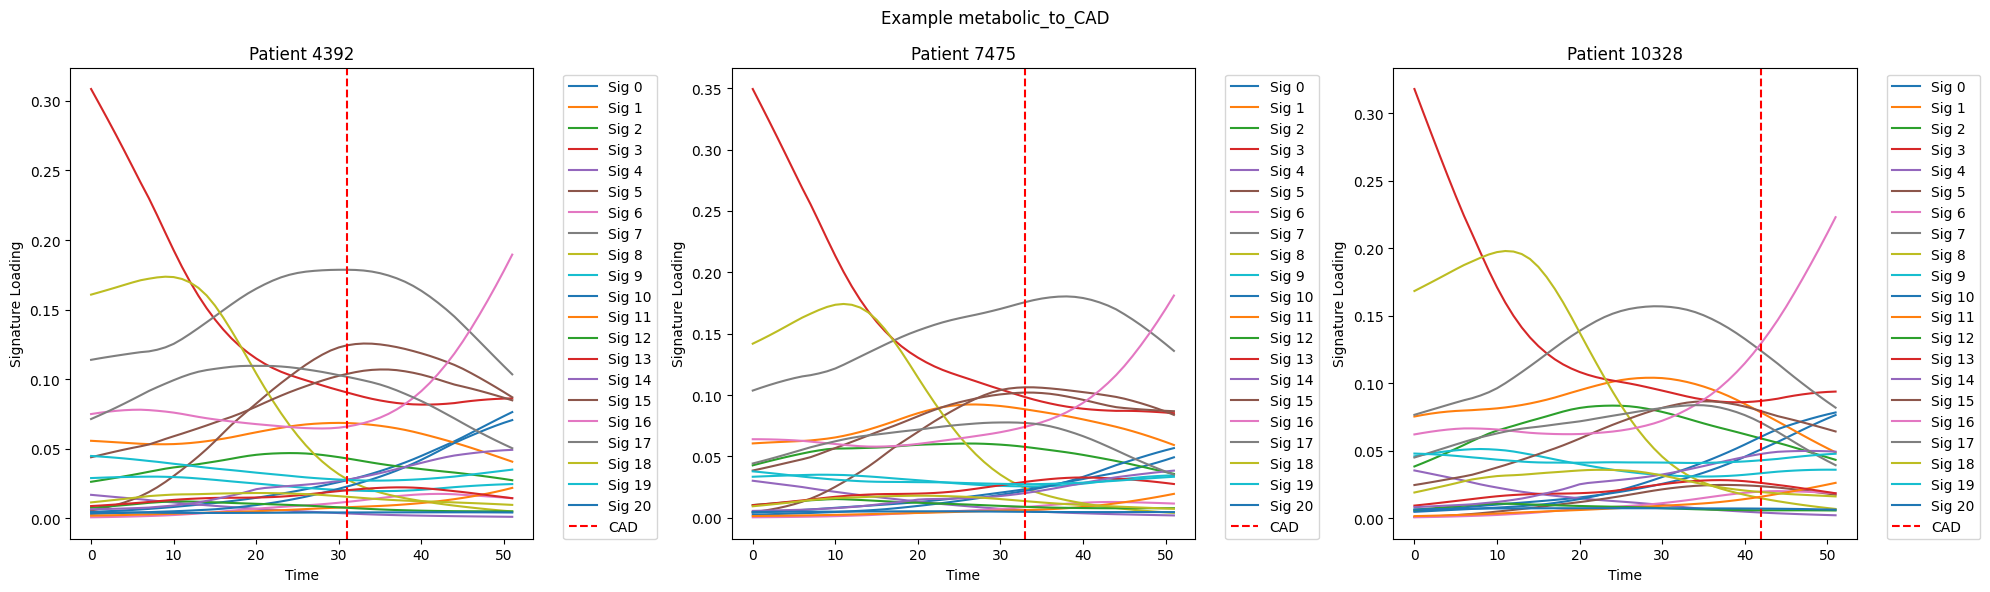

In [12]:
def find_precursor_patterns_to_CAD(thetas, Y, window=5):
    """
    Find patients with different signature patterns leading to CAD
    Looking for:
    1. Inflammatory predominant (Sig 1 - arthritis/inflammatory)
    2. Depression/psychiatric predominant (Sig 7 - MDD/psychiatric)
    3. Metabolic predominant (Sig 15 - diabetes/metabolic)
    """
    cad_idx = 114
    patterns = {
        'inflammatory_to_CAD': {'sig': 1, 'cases': []},
        'depression_to_CAD': {'sig': 7, 'cases': []},
        'metabolic_to_CAD': {'sig': 15, 'cases': []}
    }
    
    for pt_idx in range(len(all_thetas)):
        if torch.any(Y[pt_idx, cad_idx] == 1):
            cad_time = torch.where(Y[pt_idx, cad_idx] == 1)[0][0].item()
            
            # Look at window before CAD
            start_time = max(0, cad_time - window)
            
            # For each pattern type
            for pattern, info in patterns.items():
                sig = info['sig']
                # Check if signature is elevated before CAD
                pre_cad_window = slice(start_time, cad_time)
                sig_elevated = (thetas[pt_idx, sig, pre_cad_window].mean() >
                              thetas[pt_idx, :, pre_cad_window].mean() + 
                              thetas[pt_idx, :, pre_cad_window].std())
                
                if sig_elevated:
                    patterns[pattern]['cases'].append({
                        'patient_idx': pt_idx,
                        'cad_time': cad_time,
                        'trajectories': thetas[pt_idx].cpu().numpy() if torch.is_tensor(thetas) else thetas[pt_idx]
                    })
    
    # Simple signature numbers for labels
    sig_labels = {i: f"Sig {i}" for i in range(thetas.shape[1])}  # Assuming shape[1] is number of signatures
    
    # Plot clear examples for each pattern
    for pattern, info in patterns.items():
        if info['cases']:
            print(f"\nFound {len(info['cases'])} cases of {pattern}")
            fig, axes = plt.subplots(1, 3, figsize=(20, 6))
            
            for i, case in enumerate(info['cases'][:3]):
                trajectories = case['trajectories']
                
                # Plot each signature trajectory with simple number label
                for sig_idx in range(trajectories.shape[0]):
                    axes[i].plot(trajectories[sig_idx], label=f"Sig {sig_idx}")
                
                axes[i].axvline(case['cad_time'], color='r', linestyle='--', label='CAD')
                axes[i].set_title(f'Patient {case["patient_idx"]}')
                axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
                axes[i].set_xlabel('Time')
                axes[i].set_ylabel('Signature Loading')
            
            plt.suptitle(f'Example {pattern}')
            plt.tight_layout()
    
    return patterns
    


# Run the analysis
precursor_patterns = find_precursor_patterns_to_CAD(all_thetas, Y)


Found 8566 cases of inflammatory_to_CAD

Found 32647 cases of depression_to_CAD

Found 205 cases of metabolic_to_CAD


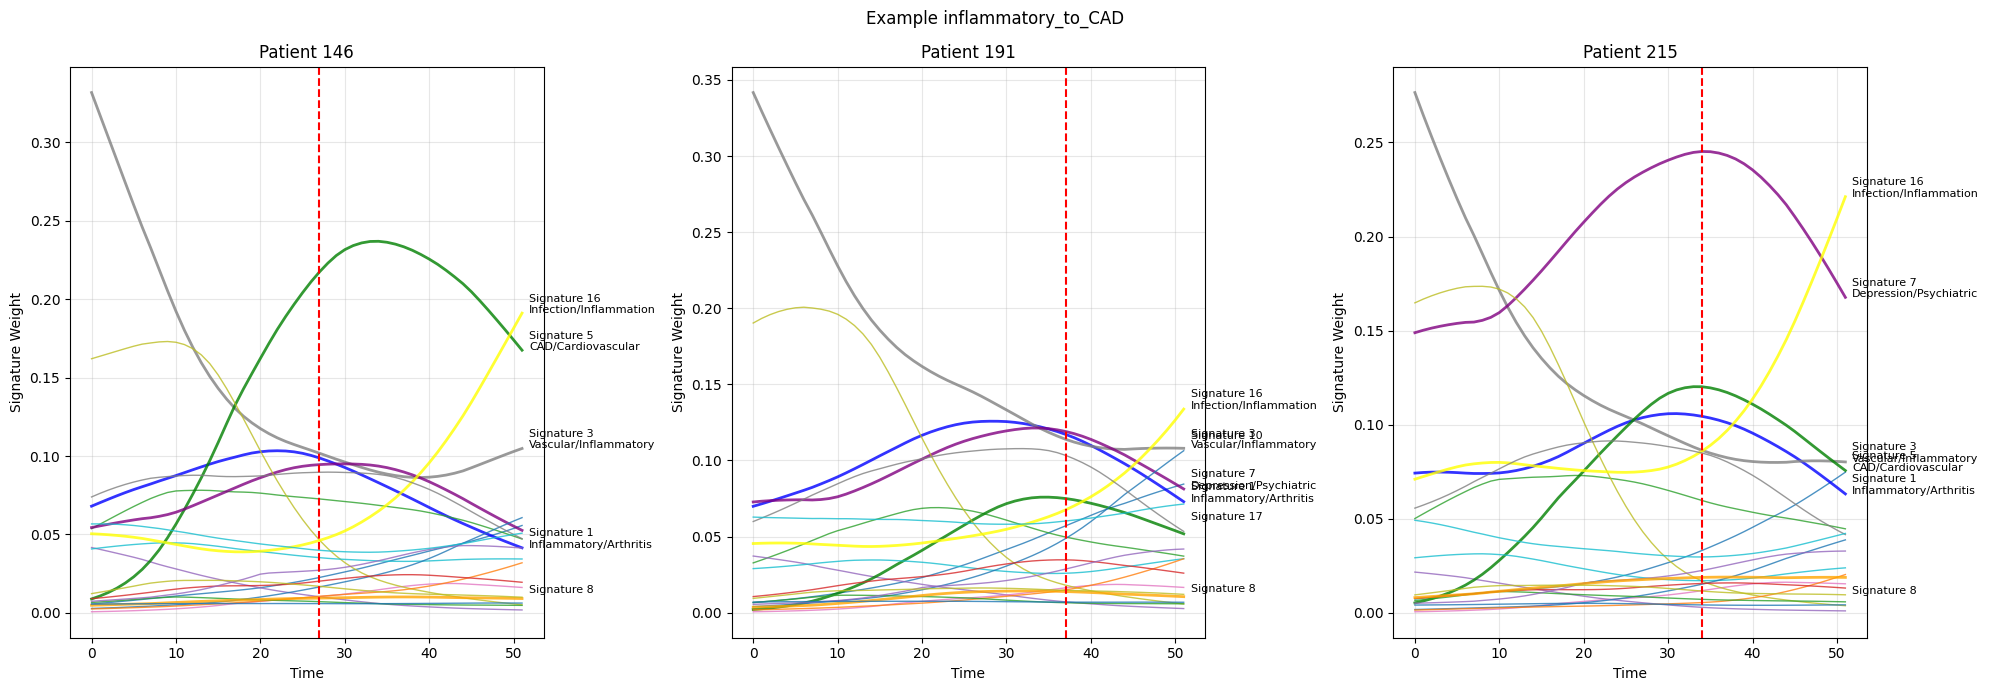

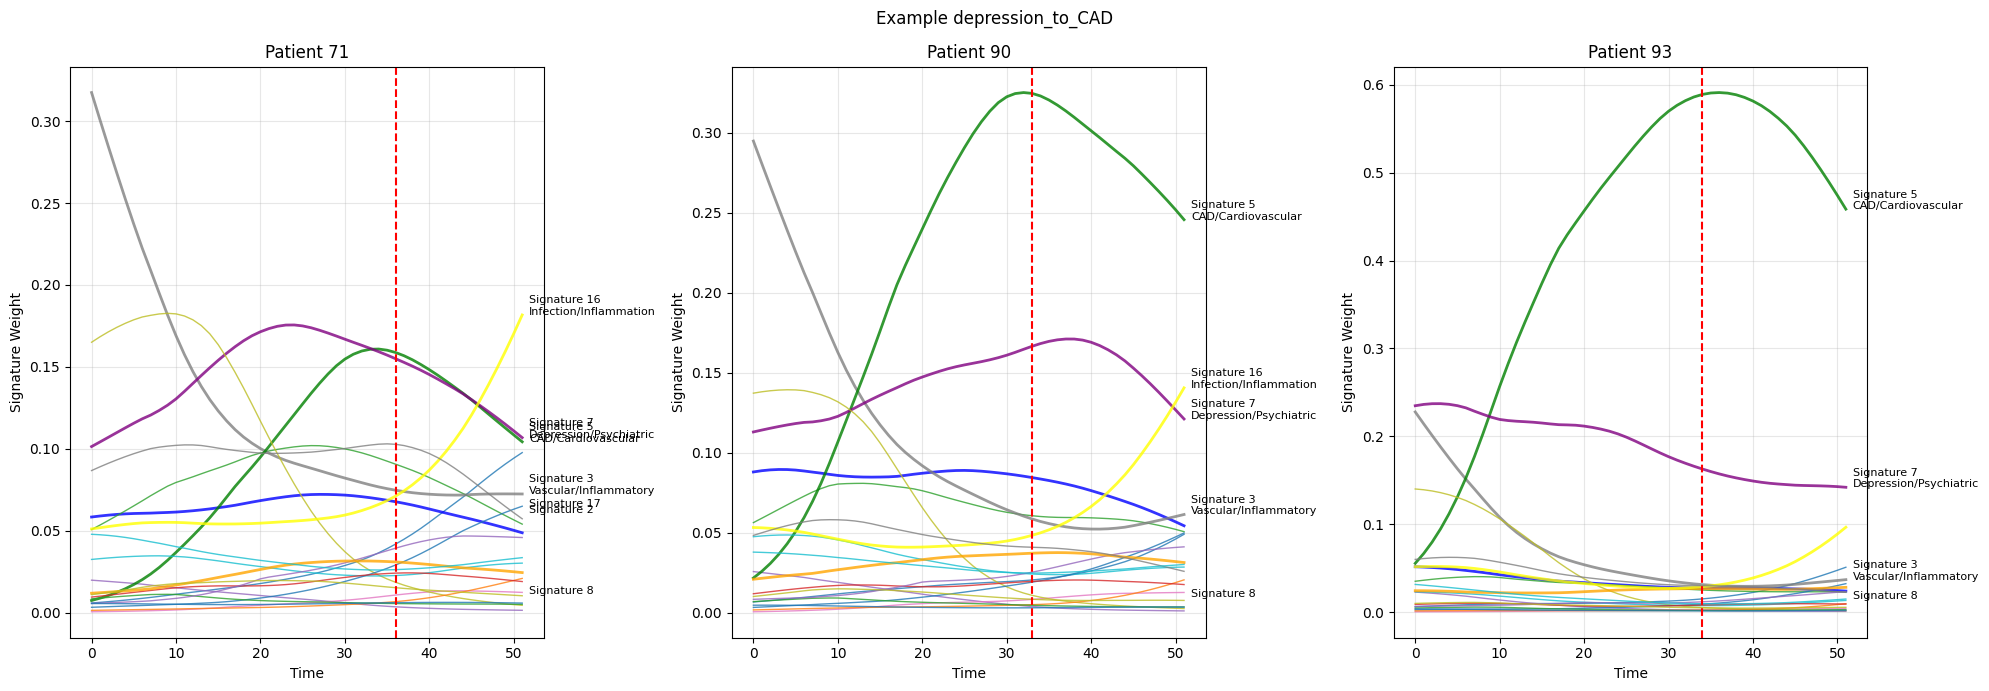

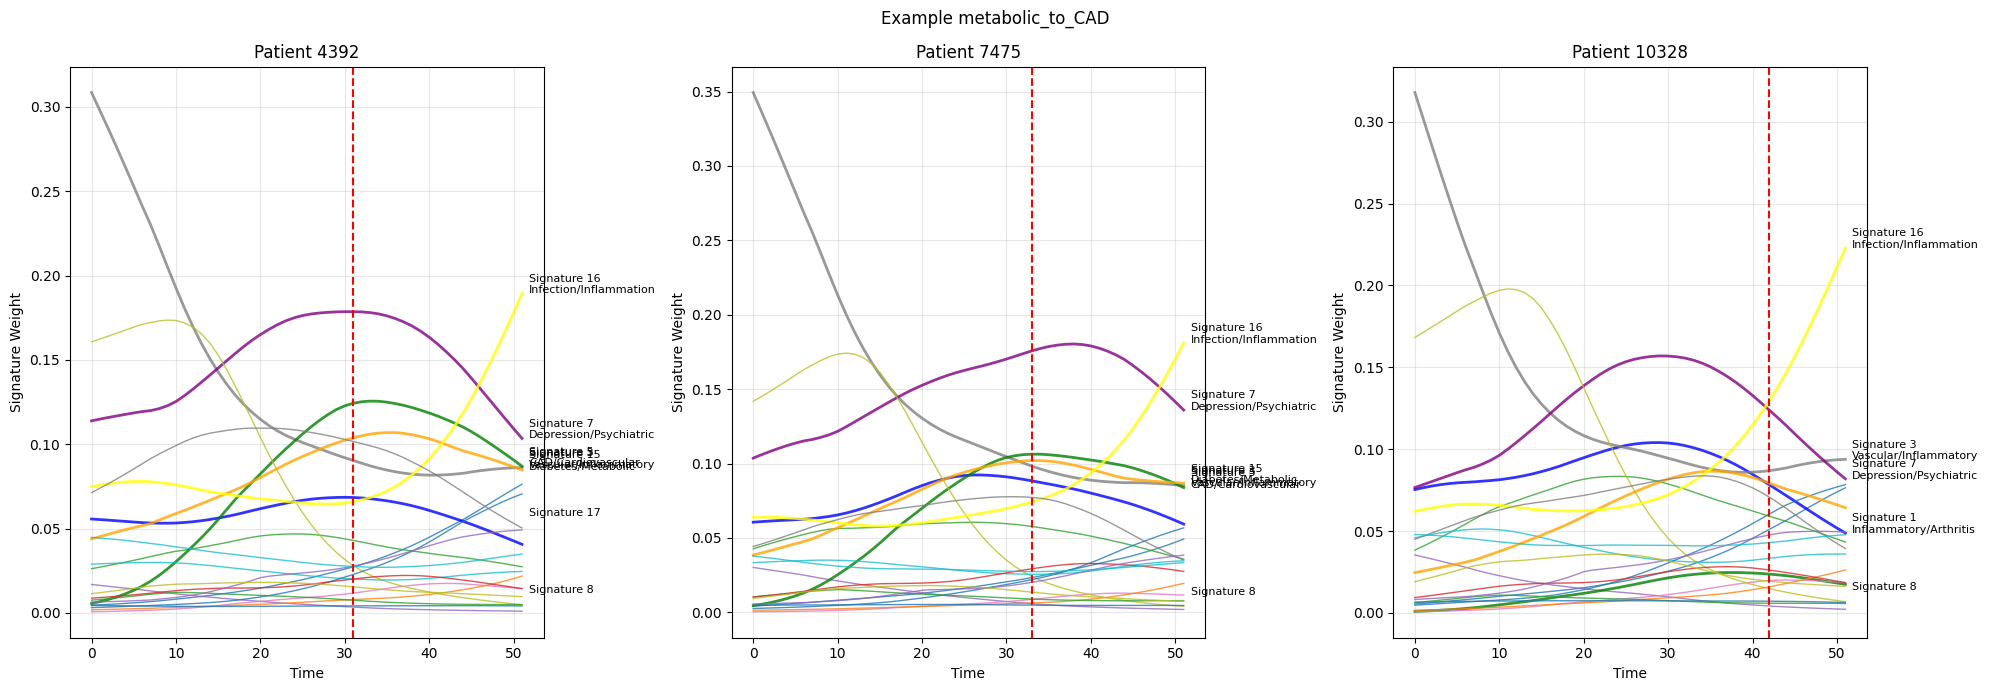

In [165]:
def find_precursor_patterns_to_CAD(thetas, Y, window=5):
    """
    Find patients with different signature patterns leading to CAD
    """
    cad_idx = 114
    patterns = {
        'inflammatory_to_CAD': {'sig': 1, 'cases': []},
        'depression_to_CAD': {'sig': 7, 'cases': []},
        'metabolic_to_CAD': {'sig': 15, 'cases': []}
    }
    
    for pt_idx in range(len(thetas)):
        if torch.any(Y[pt_idx, cad_idx] == 1):
            cad_time = torch.where(Y[pt_idx, cad_idx] == 1)[0][0].item()
            
            start_time = max(0, cad_time - window)
            
            for pattern, info in patterns.items():
                sig = info['sig']
                pre_cad_window = slice(start_time, cad_time)
                sig_elevated = (thetas[pt_idx, sig, pre_cad_window].mean() >
                              thetas[pt_idx, :, pre_cad_window].mean() + 
                              thetas[pt_idx, :, pre_cad_window].std())
                
                if sig_elevated:
                    patterns[pattern]['cases'].append({
                        'patient_idx': pt_idx,
                        'cad_time': cad_time,
                        'trajectories': thetas[pt_idx].cpu().numpy() if torch.is_tensor(thetas) else thetas[pt_idx]
                    })
    
    # Plot examples
    for pattern, info in patterns.items():
        if info['cases']:
            print(f"\nFound {len(info['cases'])} cases of {pattern}")
            plot_CAD_trajectories(info['cases'], title=f'Example {pattern}')
    
    return patterns
def plot_CAD_trajectories(cases, title="Example Trajectories"):
    """
    Plot trajectories with clear signature labels and consistent colors
    """
    fig, axes = plt.subplots(1, 3, figsize=(20, 7))
    fig.suptitle(title)
    
    # Define key signature colors
    sig_colors = {
        5: 'green',     # CAD/cardiovascular 
        1: 'blue',      # Inflammatory/arthritis
        7: 'purple',    # Depression/psychiatric
        15: 'orange',   # Diabetes/metabolic
        16: 'yellow',   # Infection/inflammation
        3: 'gray',      # Vascular/inflammatory
        # Add other important signatures as needed
    }
    
    for i, case in enumerate(cases[:3]):
        ax = axes[i]
        trajectories = case['trajectories']
        
        # Plot each signature
        for sig in range(trajectories.shape[0]):
            color = sig_colors.get(sig, f'C{sig}')  # Use predefined colors for key signatures
            line = ax.plot(trajectories[sig], 
                         color=color,
                         label=f'Sig {sig}',
                         alpha=0.8,
                         linewidth=2 if sig in sig_colors else 1)  # Emphasize key signatures
            
            # Add label at endpoint if signature is significant
            if max(trajectories[sig]) > 0.1:  # Only label significant signatures
                end_idx = len(trajectories[sig]) - 1
                end_val = trajectories[sig][end_idx]
                ax.annotate(f'Signature {sig}\n{get_signature_label(sig)}', 
                          (end_idx, end_val),
                          xytext=(5, 0), 
                          textcoords='offset points',
                          fontsize=8)
        
        # Add CAD line
        ax.axvline(case['cad_time'], color='red', linestyle='--', label='CAD')
        
        ax.set_title(f'Patient {case["patient_idx"]}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Signature Weight')
        ax.grid(True, alpha=0.3)
        
    plt.tight_layout()
    return fig

def get_signature_label(sig):
    """Return descriptive label for key signatures"""
    labels = {
        5: 'CAD/Cardiovascular',
        1: 'Inflammatory/Arthritis',
        7: 'Depression/Psychiatric',
        15: 'Diabetes/Metabolic',
        16: 'Infection/Inflammation',
        3: 'Vascular/Inflammatory'
    }
    return labels.get(sig, '')

# Run the analysis
precursor_patterns = find_precursor_patterns_to_CAD(all_thetas, Y)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_28551/565054179.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  exp_refs = np.exp(signature_refs)


Top 10 cases with largest deviations from reference:

Person 76310:
Disease 52 (Signature 5) at time 44
Deviation from reference: 0.864

Person 321461:
Disease 52 (Signature 5) at time 35
Deviation from reference: 0.859

Person 321461:
Disease 111 (Signature 5) at time 35
Deviation from reference: 0.859

Person 321461:
Disease 113 (Signature 5) at time 35
Deviation from reference: 0.859

Person 321461:
Disease 114 (Signature 5) at time 35
Deviation from reference: 0.859

Person 321461:
Disease 115 (Signature 5) at time 35
Deviation from reference: 0.859

Person 126303:
Disease 112 (Signature 5) at time 30
Deviation from reference: 0.857

Person 321461:
Disease 112 (Signature 5) at time 27
Deviation from reference: 0.856

Person 123403:
Disease 113 (Signature 5) at time 32
Deviation from reference: 0.855

Person 123403:
Disease 115 (Signature 5) at time 31
Deviation from reference: 0.854


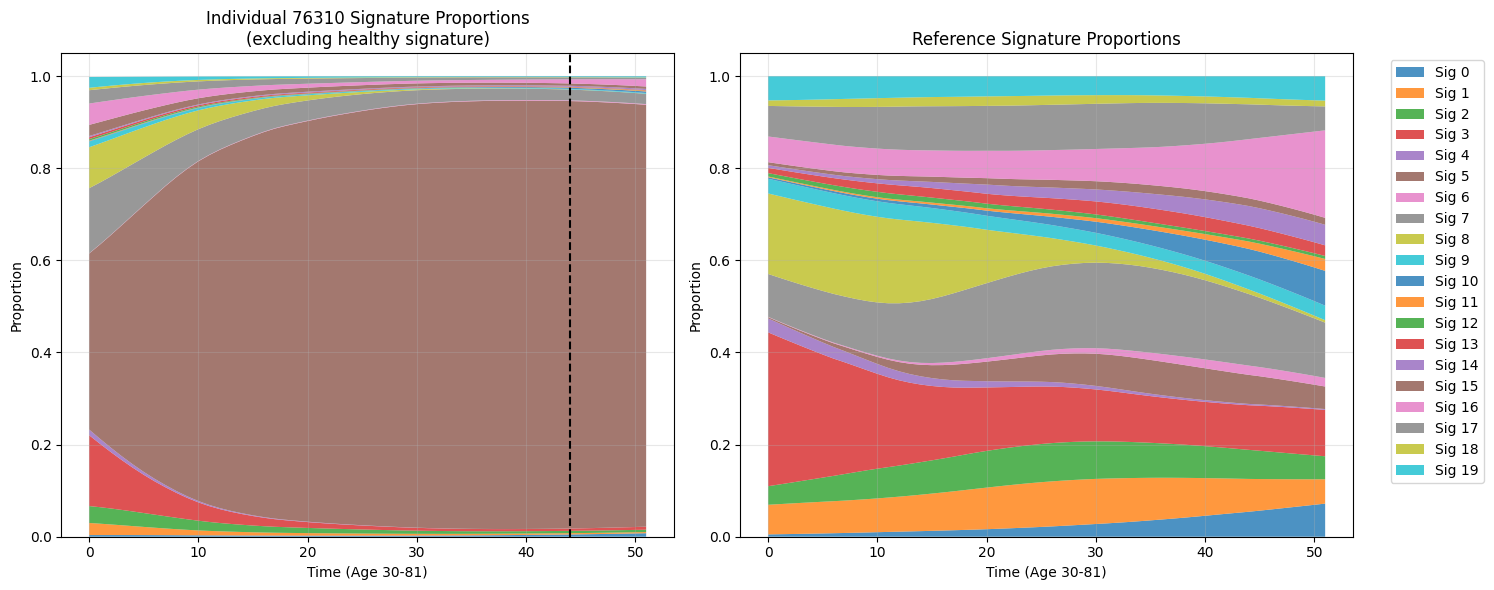

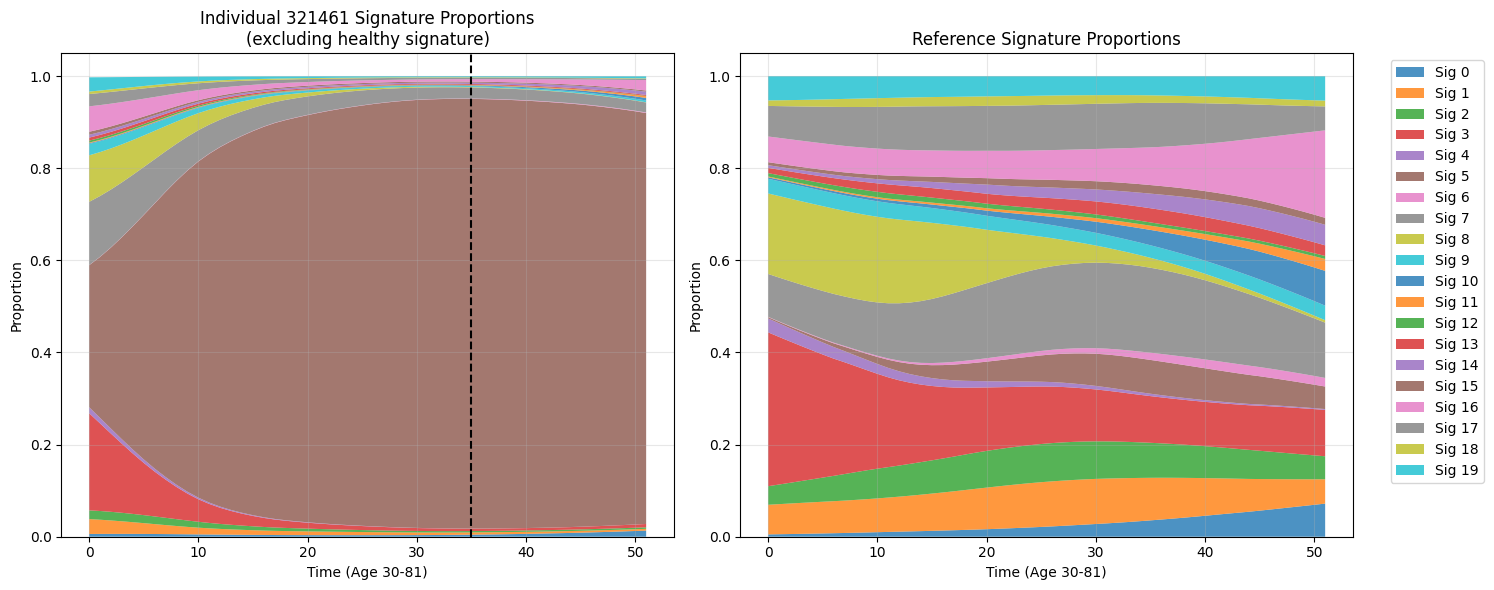

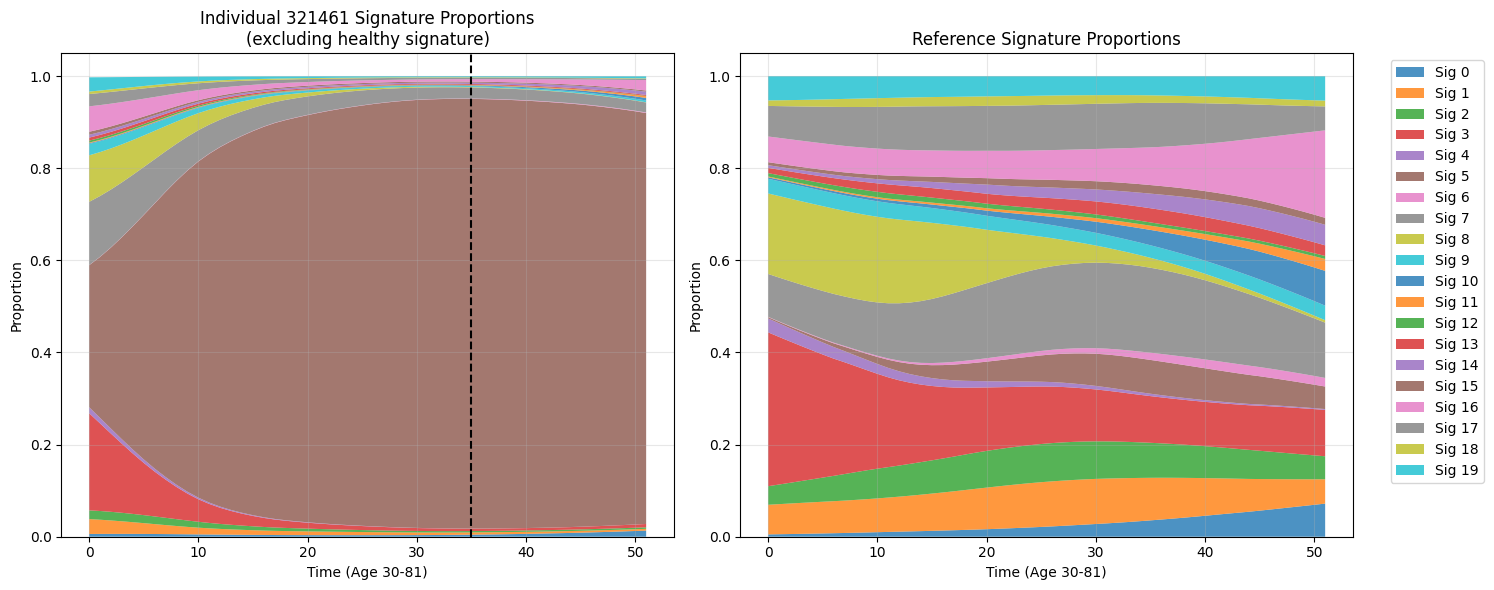

In [ ]:
def calculate_deviation_index(Y, all_thetas, signature_refs, cluster_ids, window=5):
    deviations = []
    ref_thetas = convert_to_thetas(signature_refs)
    
    # Convert to numpy if they're tensors
    if torch.is_tensor(ref_thetas):
        ref_thetas = ref_thetas.numpy()
    if torch.is_tensor(all_thetas):
        all_thetas = all_thetas.numpy()
    if torch.is_tensor(Y):
        Y = Y.numpy()
    if torch.is_tensor(cluster_ids):
        cluster_ids = cluster_ids.numpy()
    
    # For each person
    for i in range(len(all_thetas)):
        # Find their diagnoses
        diseases = np.where(Y[i].sum(axis=1) > 0)[0]
        
        if len(diseases) > 0:
            for d in diseases:
                t = np.where(Y[i, d] == 1)[0][0]
                sig = cluster_ids[d].item() if hasattr(cluster_ids[d], 'item') else cluster_ids[d]
                
                if t > window and t < (52-window):
                    # Get person's theta trajectory for this signature
                    person_theta = all_thetas[i, sig, t-window:t+window]
                    # Get reference trajectory for same period
                    ref_theta = ref_thetas[sig, t-window:t+window]
                    
                    # Calculate deviation
                    deviation = np.mean(np.abs(person_theta - ref_theta))
                    
                    deviations.append({
                        'person': i,
                        'disease': d,
                        'time': t,
                        'signature': sig,
                        'deviation': deviation
                    })
    
    # Sort by deviation
    deviations.sort(key=lambda x: x['deviation'], reverse=True)
    return deviations

# Calculate deviations
deviations = calculate_deviation_index(Y, all_thetas, signature_refs, cluster_ids)

# Print top 10 most deviant cases
print("Top 10 cases with largest deviations from reference:")
for d in deviations[:10]:
    print(f"\nPerson {d['person']}:")
    print(f"Disease {d['disease']} (Signature {d['signature']}) at time {d['time']}")
    print(f"Deviation from reference: {d['deviation']:.3f}")
    
# Plot a few of these cases
for d in deviations[:3]:
    plot_signature_comparison(
        d['person'],
        d['disease'],
        d['time'],
        all_thetas,
        signature_refs
    )

In [166]:
def find_disease_pathways_to_CAD(thetas, Y, window=10):
    """
    Find patients demonstrating distinct pathways to CAD:
    1. Inflammatory cascade
    2. Metabolic progression
    3. Psychiatric/behavioral pathway
    """
    pathways = {
        'inflammatory': {
            'codes': [714, 555, 696],  # RA, IBD, psoriasis
            'signature': 1,
            'threshold': 0.15,
            'cases': []
        },
        'metabolic': {
            'codes': [250],  # diabetes
            'signature': 15,
            'threshold': 0.15,
            'cases': []
        },
        'psychiatric': {
            'codes': [296, 303],  # MDD, alcohol
            'signature': 7,
            'threshold': 0.15,
            'cases': []
        }
    }
    
    cad_idx = 114
    
    # Find cases for each pathway
    for pt_idx in range(len(all_thetas)):
        if torch.any(Y[pt_idx, cad_idx] == 1):
            cad_time = torch.where(Y[pt_idx, cad_idx] == 1)[0][0].item()
            
            # Check each pathway
            for pathway_name, criteria in pathways.items():
                # Look for relevant diseases before CAD
                has_disease = False
                disease_times = []
                for code in criteria['codes']:
                    if torch.any(Y[pt_idx, code, :cad_time] == 1):
                        has_disease = True
                        disease_time = torch.where(Y[pt_idx, code, :cad_time] == 1)[0][0].item()
                        disease_times.append((code, disease_time))
                
                # Check signature elevation before CAD
                sig = criteria['signature']
                pre_cad_window = slice(max(0, cad_time - window), cad_time)
                sig_elevated = (thetas[pt_idx, sig, pre_cad_window].mean() > criteria['threshold'])
                
                if has_disease and sig_elevated:
                    pathways[pathway_name]['cases'].append({
                        'patient_idx': pt_idx,
                        'cad_time': cad_time,
                        'disease_times': disease_times,
                        'trajectories': thetas[pt_idx].cpu().numpy() if torch.is_tensor(thetas) else thetas[pt_idx]
                    })
    
    return pathways

def plot_disease_pathways(pathways, save_path=None):
    """
    Plot examples of each pathway to CAD
    """
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    pathway_names = ['inflammatory', 'metabolic', 'psychiatric']
    
    # Define signature colors and labels
    sig_colors = {
        1: 'blue',      # Inflammatory
        3: 'gray',      # Vascular
        5: 'green',     # CAD
        7: 'purple',    # Psychiatric
        15: 'orange',   # Metabolic
        16: 'yellow'    # Infection
    }
    
    sig_labels = {
        1: 'Inflammatory',
        3: 'Vascular',
        5: 'CAD',
        7: 'Psychiatric',
        15: 'Metabolic',
        16: 'Infection'
    }
    
    for row, pathway in enumerate(pathway_names):
        cases = pathways[pathway]['cases'][:3]  # Get top 3 examples
        for col, case in enumerate(cases):
            ax = axes[row, col]
            trajectories = case['trajectories']
            
            # Plot each signature
            for sig in range(trajectories.shape[0]):
                color = sig_colors.get(sig, f'C{sig}')
                alpha = 0.8 if sig in sig_colors else 0.3
                lw = 2 if sig in sig_colors else 1
                
                line = ax.plot(trajectories[sig], 
                             color=color,
                             alpha=alpha,
                             linewidth=lw,
                             label=sig_labels.get(sig, f'Sig {sig}'))
            
            # Add disease and CAD markers
            ax.axvline(case['cad_time'], color='red', linestyle='--', label='CAD')
            for code, time in case['disease_times']:
                ax.axvline(time, color='black', linestyle=':', alpha=0.5)
            
            ax.set_title(f'Patient {case["patient_idx"]}')
            ax.set_xlabel('Time')
            ax.set_ylabel('Signature Weight')
            ax.grid(True, alpha=0.3)
            
            if col == 0:  # Add legend to first plot in each row
                ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    pathway_titles = ['Inflammatory Cascade', 'Metabolic Progression', 'Psychiatric/Behavioral']
    for i, title in enumerate(pathway_titles):
        axes[i, 1].set_title(title, pad=20, fontsize=14)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    return fig

# Run the analysis
pathways = find_disease_pathways_to_CAD(all_thetas, Y)
fig = plot_disease_pathways(pathways)
plt.show()

# Print summary statistics
for pathway, data in pathways.items():
    print(f"\n{pathway.title()} pathway:")
    print(f"Found {len(data['cases'])} cases")

IndexError: index 714 is out of bounds for dimension 1 with size 348

In [59]:
def analyze_by_disease_count_and_time(Y, all_thetas, signature_refs, cluster_ids, 
                                    pre_window=10, post_window=5):
    # Convert signature_refs to numpy and apply softmax
    if torch.is_tensor(signature_refs):
        signature_refs = signature_refs.numpy()
    ref_thetas = np.exp(signature_refs) / np.exp(signature_refs).sum(axis=0)
    
    # Convert other inputs if needed
    if torch.is_tensor(Y):
        Y = Y.numpy()
    if torch.is_tensor(cluster_ids):
        cluster_ids = cluster_ids.numpy()
    
    results = {sig: {n: {'count': 0, 
                        'higher_before': 0,
                        'higher_at': 0,
                        'higher_after': 0} 
                    for n in range(1, 6)} for sig in range(20)}
    
    for i in range(len(all_thetas)):
        # Count diseases per signature
        sig_disease_counts = {}
        diseases = np.where(Y[i].sum(axis=1) > 0)[0]
        
        for d in diseases:
            t = np.where(Y[i, d] == 1)[0][0]
            sig = cluster_ids[d]
            sig_disease_counts[sig] = sig_disease_counts.get(sig, 0) + 1
            
            if t > pre_window and t < (52 - post_window):
                count = sig_disease_counts[sig]
                if count <= 5:
                    results[sig][count]['count'] += 1
                    
                    # Check before diagnosis
                    before_props = all_thetas[i, sig, t-pre_window:t]
                    before_refs = ref_thetas[sig, t-pre_window:t]
                    if np.mean(before_props > before_refs) > 0.5:
                        results[sig][count]['higher_before'] += 1
                    
                    # At diagnosis
                    if all_thetas[i, sig, t] > ref_thetas[sig, t]:
                        results[sig][count]['higher_at'] += 1
                    
                    # After diagnosis
                    after_props = all_thetas[i, sig, t:t+post_window]
                    after_refs = ref_thetas[sig, t:t+post_window]
                    if np.mean(after_props > after_refs) > 0.5:
                        results[sig][count]['higher_after'] += 1
    
    # Print results for all signatures
    for sig in range(20):
        print(f"\nSignature {sig}:")
        for n_diseases in range(1, 6):
            data = results[sig][n_diseases]
            if data['count'] > 0:
                before_rate = data['higher_before'] / data['count']
                at_rate = data['higher_at'] / data['count']
                after_rate = data['higher_after'] / data['count']
                print(f"{n_diseases} disease(s): {data['count']} people")
                print(f"  Higher before diagnosis: {before_rate:.2%}")
                print(f"  Higher at diagnosis: {at_rate:.2%}")
                print(f"  Higher after diagnosis: {after_rate:.2%}")

# Run temporal analysis
analyze_by_disease_count_and_time(Y, all_thetas, signature_refs, cluster_ids)


Signature 0:
1 disease(s): 54369 people
  Higher before diagnosis: 41.06%
  Higher at diagnosis: 41.14%
  Higher after diagnosis: 41.18%
2 disease(s): 22689 people
  Higher before diagnosis: 42.24%
  Higher at diagnosis: 42.46%
  Higher after diagnosis: 42.76%
3 disease(s): 12209 people
  Higher before diagnosis: 43.93%
  Higher at diagnosis: 44.21%
  Higher after diagnosis: 44.37%
4 disease(s): 7098 people
  Higher before diagnosis: 44.90%
  Higher at diagnosis: 45.00%
  Higher after diagnosis: 45.41%
5 disease(s): 4085 people
  Higher before diagnosis: 45.80%
  Higher at diagnosis: 46.00%
  Higher after diagnosis: 46.19%

Signature 1:
1 disease(s): 133251 people
  Higher before diagnosis: 41.16%
  Higher at diagnosis: 41.56%
  Higher after diagnosis: 41.47%
2 disease(s): 63679 people
  Higher before diagnosis: 42.37%
  Higher at diagnosis: 42.67%
  Higher after diagnosis: 42.65%
3 disease(s): 29432 people
  Higher before diagnosis: 43.45%
  Higher at diagnosis: 43.50%
  Higher after

In [67]:
# Load the model
first_model = torch.load('/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_0_10000/model.pt')

# Extract key components
phi = first_model['model_state_dict']['phi']
psi = first_model['model_state_dict']['psi']
logit_prev = first_model['logit_prevalence_t']

print("\nChecking values for a few example diseases:")
for k in [0, 5, 10]:  # Check signatures 0, 5, and 10
    print(f"\nSignature {k}:")
    # Get diseases in this cluster
    cluster_mask = (first_model['clusters'] == k)
    cluster_diseases = np.array(essentials['disease_names'])[cluster_mask]
    
    # Print first 3 diseases in cluster
    for d_name in cluster_diseases[:3]:
        d_idx = essentials['disease_names'].index(d_name)
        print(f"\nDisease: {d_name}")
        print(f"Baseline prevalence logit: {logit_prev[d_idx, 0]:.3f}")  # First timepoint
        print(f"Psi: {psi[k, d_idx]:.3f}")
        print(f"Phi mean: {phi[k, d_idx].mean():.3f}")


Checking values for a few example diseases:

Signature 0:

Disease: Rheumatic disease of the heart valves
Baseline prevalence logit: -16.790
Psi: 0.873
Phi mean: -9.948

Disease: Mitral valve disease
Baseline prevalence logit: -13.146
Psi: 0.974
Phi mean: -8.065

Disease: Aortic valve disease
Baseline prevalence logit: -14.789
Psi: 1.179
Phi mean: -8.793

Signature 5:

Disease: Hypercholesterolemia
Baseline prevalence logit: -12.374
Psi: 1.079
Phi mean: -5.892

Disease: Unstable angina (intermediate coronary syndrome)
Baseline prevalence logit: -14.611
Psi: 0.816
Phi mean: -8.185

Disease: Myocardial infarction
Baseline prevalence logit: -13.404
Psi: 0.860
Phi mean: -7.140

Signature 10:

Disease: Retinal detachments and defects
Baseline prevalence logit: -12.860
Psi: 0.833
Phi mean: -8.746

Disease: Retinal detachment with retinal defect
Baseline prevalence logit: -12.332
Psi: 0.795
Phi mean: -8.804

Disease: Other retinal disorders
Baseline prevalence logit: -16.736
Psi: 1.113
Phi m

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_28551/2102883623.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load('/Users/sarahurbut/D

In [73]:
Y.shape


torch.Size([407878, 348, 52])

In [85]:
checkpoint = torch.load('/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_0_10000/model.pt')
checkpoint['psi']

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_28551/347197278.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('/Users/sarahurbut/Dro

Parameter containing:
tensor([[-2.0078, -1.9824, -2.0043,  ..., -1.9997, -1.9802, -2.0136],
        [-1.9952, -1.9690, -1.9960,  ..., -2.0071, -1.9960, -1.9912],
        [-1.9826, -1.9807, -2.0075,  ..., -2.0019, -1.9873, -2.0008],
        ...,
        [-1.9943, -2.0009, -1.9819,  ..., -1.9749, -2.0113, -2.0082],
        [-1.9980, -1.9918, -1.9897,  ..., -1.9871, -2.0033, -1.9954],
        [-5.0030, -5.0041, -5.0104,  ..., -5.0064, -4.9999, -5.0015]],
       requires_grad=True)

In [23]:
def get_signature_diseases(sig_num, effects_threshold=0):
    """
    Get indices of diseases that belong to a signature based on their effects
    
    sig_num: signature number
    effects_threshold: minimum effect size to consider (0 for positive effects only)
    """
    # This should be loaded once outside the function
    checkpoint = torch.load('/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_0_10000/model.pt')
    psi = checkpoint['psi']  # Shape should be (n_diseases, n_signatures)
   
    # Get diseases with positive effects in this signature
    sig_diseases = torch.where(psi[:, sig_num] > effects_threshold)[0]
    
    return sig_diseases


In [21]:
def analyze_transitions(E, pi_pred, window_years=[-5, -2, -1, -0.5, 0]):
    """
    Analyze signature probabilities before first diagnosis
    
    E: events matrix (n_people, n_diseases) with diagnosis times - torch tensor
    pi_pred: predicted probabilities (n_people, n_diseases, n_timepoints) - torch tensor
    window_years: years before first diagnosis to analyze
    """
    
    # Get first diagnosis time for each person
    first_dx = torch.min(E, dim=1).values
    
    # Convert years to timepoints (assuming monthly data)
    timesteps_per_year = 12  
    windows = [int(year * timesteps_per_year) for year in window_years]
    
    n_signatures = 20
    results = {}
    
    for sig in range(n_signatures):
        sig_diseases = get_signature_diseases(sig)
        
        sig_results = []
        for window in windows:
            probs = []
            for person in range(len(first_dx)):
                dx_time = first_dx[person].item()  # Convert to Python scalar for indexing
                if dx_time > abs(window):
                    # Convert window index to tensor and ensure it's within bounds
                    time_idx = min(max(0, int(dx_time + window)), pi_pred.shape[2]-1)
                    # Index the tensor and take mean
                    prob_at_window = torch.mean(pi_pred[person, sig_diseases, time_idx])
                    probs.append(prob_at_window.item())
            
            mean_prob = sum(probs) / len(probs) if probs else 0
            sig_results.append({
                'years_before_dx': window/timesteps_per_year,
                'mean_prob': mean_prob,
                'n_people': len(probs)
            })
            
        results[sig] = sig_results
    
    return results

In [198]:
def plot_healthy_reference():
    """
    Create companion plot showing healthy reference levels for key signatures
    """
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Assuming we have healthy population means
    ax.axhline(y=healthy_mean_sig1, color='blue', linestyle='--', label='Inflammatory (Sig 1) Reference')
    ax.axhline(y=healthy_mean_sig7, color='purple', linestyle='--', label='Psychiatric (Sig 7) Reference')
    ax.axhline(y=healthy_mean_sig15, color='orange', linestyle='--', label='Metabolic (Sig 15) Reference')
    
    ax.set_title('Healthy Population Reference Levels')
    ax.set_ylabel('Signature Weight')
    ax.set_xlabel('Reference Level')
    ax.legend()
    
    return fig

In [11]:
def analyze_disease_progression(Y, all_thetas, phi_prob, disease1='CAD', disease2='Colon cancer', 
                              window_years=[-5, -2, -1, -0.5, 0], batch_size=1000):
    """
    Analyze if people who got disease1 (e.g. CAD) first showed elevated signatures
    for disease2 (e.g. Colon cancer) before their disease2 diagnosis
    """
    # Get disease indices
    d1_idx = disease_names.index(disease1)
    d2_idx = disease_names.index(disease2)
    
    # Find signature for disease2
    d2_sig = cluster_ids[d2_idx].item()
    
    # Find people who got disease1 before disease2
    progression_cases = []
    for i in range(len(Y)):
        if Y[i, d1_idx].sum() > 0 and Y[i, d2_idx].sum() > 0:  # Has both diseases
            t1 = np.where(Y[i, d1_idx] == 1)[0][0]  # Time of first disease
            t2 = np.where(Y[i, d2_idx] == 1)[0][0]  # Time of second disease
            if t1 < t2:  # Got disease1 before disease2
                progression_cases.append({
                    'person': i,
                    'time_d1': t1,
                    'time_d2': t2
                })
    
    print(f"Found {len(progression_cases)} people who got {disease1} before {disease2}")
    
    # Analyze their signature trajectories
    results = []
    timesteps_per_year = 12
    windows = [int(year * timesteps_per_year) for year in window_years]
    
    # Process in batches
    for batch_start in range(0, len(progression_cases), batch_size):
        batch_cases = progression_cases[batch_start:batch_start + batch_size]
        batch_indices = [case['person'] for case in batch_cases]
        
        # Calculate predictions for this batch
        batch_thetas = all_thetas[batch_indices]
        batch_pi = np.einsum('nkt,kdt->ndt', batch_thetas, phi_prob)
        
        # Analyze each case
        for i, case in enumerate(batch_cases):
            case_results = []
            t2 = case['time_d2']
            
            for window in windows:
                if t2 > abs(window):
                    time_idx = min(max(0, int(t2 + window)), batch_pi.shape[2]-1)
                    # Get probability for disease2's signature
                    prob = batch_pi[i, d2_idx, time_idx]
                    case_results.append({
                        'years_before_dx': window/timesteps_per_year,
                        'probability': prob,
                        'time_after_d1': time_idx - case['time_d1']
                    })
            results.append(case_results)
    
    # Analyze results
    summary = {}
    for window in window_years:
        window_probs = [r['probability'] for case_results in results 
                       for r in case_results 
                       if r['years_before_dx'] == window]
        
        summary[window] = {
            'mean_prob': np.mean(window_probs),
            'median_prob': np.median(window_probs),
            'n_cases': len(window_probs),
            'above_reference': np.mean([p > ref_thetas[d2_sig, int(52+window*12)] 
                                      for p in window_probs])
        }
    
    return summary, results

# Example usage:
summary, detailed_results = analyze_disease_progression(
    Y, all_thetas, phi_prob,
    disease1='CAD',
    disease2='Colon cancer'
)

# Print summary
for window, stats in summary.items():
    print(f"\n{window} years before colon cancer diagnosis:")
    print(f"Mean probability: {stats['mean_prob']:.3f}")
    print(f"Percent above reference: {stats['above_reference']*100:.1f}%")
    print(f"Number of cases: {stats['n_cases']}")

NameError: name 'Y' is not defined

In [25]:
def find_disease_indices(disease_names, search_terms):
    """
    Find indices of diseases containing specific terms
    """
    disease_list = [name.decode('utf-8') if isinstance(name, np.bytes_) else str(name) 
                   for name in disease_names]
    
    print("\nMatching diseases found:")
    matches = {}
    for term in search_terms:
        term = term.lower()
        for i, name in enumerate(disease_list):
            if term in name.lower():
                matches[i] = name
                print(f"{i}: {name}")
    
    return matches

# Let's look for CAD and colon cancer related terms
search_terms = ['Atherosclerosis', 'abdominal', 'Colon', 'colorectal']

# Load first model to get disease names
first_model_path = '/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_0_10000/model.pt'
checkpoint = torch.load(first_model_path)
disease_names = checkpoint['disease_names']

# Find matching diseases
matches = find_disease_indices(disease_names, search_terms)


Matching diseases found:


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/3708772320.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(first_model_path)


In [28]:
import pandas as pd 
def find_disease_indices(disease_names_df, search_terms):
    """
    Find indices of diseases containing specific terms in a DataFrame
    """
    print("\nMatching diseases found:")
    matches = {}
    
    # Convert DataFrame to more easily searchable format
    if isinstance(disease_names_df, pd.DataFrame):
        disease_list = disease_names_df.iloc[:, 0].tolist()  # Assuming disease names are in first column
    else:
        disease_list = disease_names_df
    
    for term in search_terms:
        term = term.lower()
        for i, name in enumerate(disease_list):
            if term in str(name).lower():
                matches[i] = name
                print(f"{i}: {name}")
    
    return matches

# Let's look for CAD and colon cancer related terms
search_terms = ['coronary', 'artery', 'colon', 'colorectal', 'CAD', 'atherosclerosis']

# Load first model to get disease names
first_model_path = '/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_0_10000/model.pt'
checkpoint = torch.load(first_model_path)
disease_names_df = checkpoint['disease_names']

# Find matching diseases
matches = find_disease_indices(disease_names_df, search_terms)


Matching diseases found:
111: Unstable angina (intermediate coronary syndrome)
114: Coronary atherosclerosis
135: Cerebral artery occlusion, with cerebral infarction
142: Stricture of artery
10: Colon cancer
33: Benign neoplasm of colon
114: Coronary atherosclerosis


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/1448163532.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(first_model_path)


In [29]:
base_dir

'/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/'

In [32]:
def analyze_disease_progression_batched(base_dir, disease1_idx=114, disease2_idx=10):
    """
    Analyze progression from coronary atherosclerosis to colon cancer across all batches
    """
    all_results = []
    batch_size = 10000
    total_patients = 400000
    
    print(f"Analyzing progression from disease {disease1_idx} to disease {disease2_idx}")
    
    for start_idx in range(0, total_patients, batch_size):
        end_idx = min(start_idx + batch_size, total_patients)
        model_dir = os.path.join(base_dir, f"output_{start_idx}_{end_idx}")
        model_path = os.path.join(model_dir, 'model.pt')
        
        if os.path.exists(model_path):
            print(f"\nProcessing batch {start_idx}-{end_idx}...")
            try:
                # Load model data
                checkpoint = torch.load(model_path)
                Y = checkpoint['Y']
                
                # Find progression cases
                progression_cases = []
                for patient in range(len(Y)):
                    # Get first occurrence of each disease for this patient
                    d1_times = (Y[patient, disease1_idx] == 1).nonzero(as_tuple=True)[0]
                    d2_times = (Y[patient, disease2_idx] == 1).nonzero(as_tuple=True)[0]
                    
                    # Check if patient had both diseases
                    if len(d1_times) > 0 and len(d2_times) > 0:
                        t1 = d1_times[0].item()  # First occurrence of disease1
                        t2 = d2_times[0].item()  # First occurrence of disease2
                        if t1 < t2:  # If disease1 came first
                            progression_cases.append({
                                'patient': patient + start_idx,  # Add batch offset
                                'time_d1': t1,
                                'time_d2': t2,
                                'gap': t2 - t1
                            })
                
                if progression_cases:
                    print(f"Found {len(progression_cases)} progression cases in this batch")
                    all_results.extend(progression_cases)
                    
            except Exception as e:
                print(f"Error processing batch {start_idx}-{end_idx}: {str(e)}")
                continue
    
    # Analyze results
    if all_results:
        print(f"\nTotal progression cases found: {len(all_results)}")
        
        # Calculate time gaps
        gaps = [case['gap'] for case in all_results]
        
        # Convert to years (assuming monthly data)
        gaps_years = [gap/12 for gap in gaps]
        
        # Basic statistics
        print(f"\nTime between diseases:")
        print(f"Mean: {np.mean(gaps_years):.1f} years")
        print(f"Median: {np.median(gaps_years):.1f} years")
        print(f"Range: {min(gaps_years):.1f} to {max(gaps_years):.1f} years")
        
        # Create histogram of progression times
        plt.figure(figsize=(10, 6))
        plt.hist(gaps_years, bins=30, edgecolor='black')
        plt.xlabel('Years between diseases')
        plt.ylabel('Number of cases')
        plt.title('Time between Coronary Atherosclerosis and Colon Cancer\n'
                 f'(n={len(gaps)} cases)')
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(base_dir, "disease_progression_histogram.png"))
        plt.close()
        
        # Save detailed results
        results_df = pd.DataFrame(all_results)
        results_df['years_between'] = results_df['gap'] / 12
        results_df.to_csv(os.path.join(base_dir, "progression_cases.csv"), index=False)
        
        return results_df
    
    return None

# Run the analysis
base_dir = '/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/'
results_df = analyze_disease_progression_batched(base_dir)

Analyzing progression from disease 114 to disease 10

Processing batch 0-10000...


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/4107447626.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


Found 9 progression cases in this batch

Processing batch 10000-20000...
Found 9 progression cases in this batch

Processing batch 20000-30000...
Found 12 progression cases in this batch

Processing batch 30000-40000...
Found 11 progression cases in this batch

Processing batch 40000-50000...
Found 4 progression cases in this batch

Processing batch 50000-60000...
Found 8 progression cases in this batch

Processing batch 60000-70000...
Found 9 progression cases in this batch

Processing batch 70000-80000...
Found 6 progression cases in this batch

Processing batch 80000-90000...
Found 10 progression cases in this batch

Processing batch 90000-100000...
Found 9 progression cases in this batch

Processing batch 100000-110000...
Found 11 progression cases in this batch

Processing batch 110000-120000...
Found 7 progression cases in this batch

Processing batch 120000-130000...
Found 4 progression cases in this batch

Processing batch 130000-140000...
Found 11 progression cases in this bat

In [41]:
refs=torch.load('/Users/sarahurbut/aladynoulli2/pyScripts/ptdir/reference_trajectories.pt')
        

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/3177592488.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  refs=torch.load('/Users/sarahurbut/aladynoulli

In [43]:
signature_refs=refs['signature_refs']
signature_refs

tensor([[-5.1059, -5.0456, -4.9853,  ..., -2.6202, -2.5767, -2.5330],
        [-2.5581, -2.5542, -2.5502,  ..., -2.7607, -2.8007, -2.8409],
        [-3.0251, -2.9816, -2.9382,  ..., -2.8347, -2.8656, -2.8969],
        ...,
        [-2.5267, -2.4998, -2.4730,  ..., -2.7528, -2.8045, -2.8566],
        [-4.2426, -4.1940, -4.1465,  ..., -4.2500, -4.2633, -4.2765],
        [-2.7581, -2.7757, -2.7931,  ..., -2.8778, -2.8571, -2.8363]])

In [51]:
refs['healthy_ref']

tensor([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf])

In [50]:
def analyze_signature_progression_with_refs(base_dir, sig_refs, results_df, disease2_idx=10):
    """
    Analyze signature probabilities comparing to reference trajectories
    Note: sig_refs shape is [20, 52] for 20 signatures over 52 time points
    """
    # Get the signature that most strongly predicts colon cancer
    first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
    phi = first_model['model_state_dict']['phi']
    colon_signature = int(torch.sigmoid(phi[:, disease2_idx, :]).mean(dim=1).argmax().item())
    print(f"Colon cancer is most strongly associated with signature {colon_signature}")
    
    # Time windows before diagnosis (in years)
    windows = [-2, -1, -0.5, -0.25, 0]
    window_probs = {w: [] for w in windows}
    
    # Process each batch
    for start_idx in range(0, 400000, 10000):
        end_idx = min(start_idx + 10000, 400000)
        batch_cases = results_df[
            (results_df['patient'] >= start_idx) & 
            (results_df['patient'] < end_idx)
        ]
        
        if len(batch_cases) > 0:
            model_path = os.path.join(base_dir, f'output_{start_idx}_{end_idx}/model.pt')
            model = torch.load(model_path)
            
            # Get thetas for this batch (excluding healthy state)
            lambda_values = model['model_state_dict']['lambda_'][:, :20, :]  # Only disease signatures
            thetas = torch.softmax(lambda_values, dim=1)
            
            # For each case in this batch
            for _, case in batch_cases.iterrows():
                patient_idx = int(case['patient'] - start_idx)
                dx_time = int(case['time_d2'])
                
                # Get probabilities at each time window
                for window in windows:
                    time_idx = min(max(0, int(dx_time + window*12)), thetas.shape[2]-1)
                    try:
                        prob = thetas[patient_idx, colon_signature, time_idx].item()
                        window_probs[window].append(prob)
                    except IndexError:
                        continue
    
    # Plot results
    plt.figure(figsize=(10, 6))
    
    # Plot patient trajectories
    means = [np.mean(window_probs[w]) for w in windows]
    stds = [np.std(window_probs[w]) for w in windows]
    plt.errorbar(windows, means, yerr=stds, marker='o', label='Progression Cases')
    
    # Plot reference trajectory (raw values, not probabilities)
    ref_trajectory = sig_refs[colon_signature].numpy()
    time_points = np.linspace(-2, 0, len(ref_trajectory))
    plt.plot(time_points, ref_trajectory, '--', label=f'Reference Trajectory (Sig {colon_signature})')
    
    plt.xlabel('Years before colon cancer diagnosis')
    plt.ylabel(f'Values for signature {colon_signature}')
    plt.title('Patient Trajectories vs Reference\nPatients progressing from CAD to Colon Cancer')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(base_dir, "signature_progression_vs_reference.png"))
    plt.close()
    
    # Print statistics
    print("\nDetailed statistics:")
    for window in windows:
        print(f"\n{window} years before diagnosis:")
        print(f"Mean probability: {np.mean(window_probs[window]):.3f}")
        print(f"Std deviation: {np.std(window_probs[window]):.3f}")
        print(f"Number of cases: {len(window_probs[window])}")
        
        # Get reference value at this time point
        ref_idx = int((window + 2) * (len(ref_trajectory) - 1) / 2)
        ref_idx = max(0, min(ref_idx, len(ref_trajectory) - 1))
        print(f"Reference value: {ref_trajectory[ref_idx]:.3f}")
    
    return means, stds, ref_trajectory

# Run the analysis
means, stds, ref_traj = analyze_signature_progression_with_refs(base_dir, sig_refs=signature_refs, results_df=results_df)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/3625194409.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_dir

Colon cancer is most strongly associated with signature 17

Detailed statistics:

-2 years before diagnosis:
Mean probability: 0.095
Std deviation: 0.030
Number of cases: 389
Reference value: -2.527

-1 years before diagnosis:
Mean probability: 0.092
Std deviation: 0.032
Number of cases: 389
Reference value: -2.239

-0.5 years before diagnosis:
Mean probability: 0.087
Std deviation: 0.031
Number of cases: 389
Reference value: -2.300

-0.25 years before diagnosis:
Mean probability: 0.082
Std deviation: 0.031
Number of cases: 389
Reference value: -2.501

0 years before diagnosis:
Mean probability: 0.076
Std deviation: 0.030
Number of cases: 389
Reference value: -2.857


In [169]:
def analyze_signature_progression_with_refs(base_dir, sig_refs, results_df, disease2_idx=66):
    """
    Analyze signature probabilities with correct time mapping
    Reference trajectories: 52 points from -2 years to 0
    """
    # Add healthy reference state and convert to probabilities
    healthy_ref = torch.full((1, sig_refs.shape[1]), -5.0)
    full_refs = torch.cat([sig_refs, healthy_ref], dim=0)
    ref_probs = torch.softmax(full_refs, dim=0).numpy()
    
    # Get colon signature index
    first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
    phi = first_model['model_state_dict']['phi']
    colon_signature = int(torch.sigmoid(phi[:, disease2_idx, :]).mean(dim=1).argmax().item())
    print(f"Colon cancer is most strongly associated with signature {colon_signature}")
    
    # Get reference trajectory for this signature
    ref_trajectory = ref_probs[colon_signature]
    
    # Print reference values at key time points
    print("\nReference trajectory values:")
    time_points = [-2, -1, -0.5, -0.25, 0]
    for t in time_points:
        # Map time point to index in reference trajectory
        # -2 maps to 0, 0 maps to 51
        idx = int((t + 2) * 51/2)
        print(f"Time {t} years: {ref_trajectory[idx]:.3f}")
    # Time windows before diagnosis (in years)
    windows = [-2, -1, -0.5, -0.25, 0]
    window_probs = {w: [] for w in windows}
    
    # Process each batch
    for start_idx in range(0, 400000, 10000):
        end_idx = min(start_idx + 10000, 400000)
        batch_cases = results_df[
            (results_df['patient'] >= start_idx) & 
            (results_df['patient'] < end_idx)
        ]
        
        if len(batch_cases) > 0:
            model_path = os.path.join(base_dir, f'output_{start_idx}_{end_idx}/model.pt')
            model = torch.load(model_path)
            
            # Get lambda values and add healthy state value
            lambda_values = model['model_state_dict']['lambda_']
            thetas = torch.softmax(lambda_values, dim=1)  # This already includes healthy state
            
            # For each case in this batch
            for _, case in batch_cases.iterrows():
                patient_idx = int(case['patient'] - start_idx)
                dx_time = int(case['time_d2'])
                
                # Get probabilities at each time window
                for window in windows:
                    time_idx = min(max(0, int(dx_time + window*12)), thetas.shape[2]-1)
                    try:
                        prob = thetas[patient_idx, colon_signature, time_idx].item()
                        window_probs[window].append(prob)
                    except IndexError:
                        continue
    
    # Plot results
    plt.figure(figsize=(10, 6))
    
    # Plot patient trajectories
    means = [np.mean(window_probs[w]) for w in windows]
    stds = [np.std(window_probs[w]) for w in windows]
    plt.errorbar(windows, means, yerr=stds, marker='o', label='Progression Cases')
    
    # Plot reference trajectory
    time_points = np.linspace(-2, 0, len(ref_trajectory))
    plt.plot(time_points, ref_trajectory, '--', label=f'Reference Trajectory (Sig {colon_signature})')
    
    plt.xlabel('Years before mdd  diagnosis')
    plt.ylabel(f'Probability of signature {colon_signature}')
    plt.title('Patient Trajectories vs Reference\nPatients progressing from CAD to Colon Cancer')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(base_dir, "signature_progression_vs_reference.png"))
    plt.close()
    
    # Print statistics
    print("\nDetailed statistics:")
    for window in windows:
        print(f"\n{window} years before diagnosis:")
        print(f"Mean probability: {np.mean(window_probs[window]):.3f}")
        print(f"Std deviation: {np.std(window_probs[window]):.3f}")
        print(f"Number of cases: {len(window_probs[window])}")
        
        # Get reference probability at this time point
        ref_idx = int((window + 2) * (len(ref_trajectory) - 1) / 2)
        ref_idx = max(0, min(ref_idx, len(ref_trajectory) - 1))
        print(f"Reference probability: {ref_trajectory[ref_idx]:.3f}")
    
    return means, stds, ref_trajectory

# Run the analysis
means, stds, ref_traj = analyze_signature_progression_with_refs(base_dir, sig_refs=signature_refs, results_df=results_df)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/4256360319.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_di

Colon cancer is most strongly associated with signature 7

Reference trajectory values:
Time -2 years: 0.093
Time -1 years: 0.178
Time -0.5 years: 0.177
Time -0.25 years: 0.154
Time 0 years: 0.119

Detailed statistics:

-2 years before diagnosis:
Mean probability: 0.150
Std deviation: 0.047
Number of cases: 389
Reference probability: 0.093

-1 years before diagnosis:
Mean probability: 0.170
Std deviation: 0.047
Number of cases: 389
Reference probability: 0.178

-0.5 years before diagnosis:
Mean probability: 0.166
Std deviation: 0.047
Number of cases: 389
Reference probability: 0.177

-0.25 years before diagnosis:
Mean probability: 0.160
Std deviation: 0.047
Number of cases: 389
Reference probability: 0.154

0 years before diagnosis:
Mean probability: 0.152
Std deviation: 0.047
Number of cases: 389
Reference probability: 0.119


In [54]:
def verify_progression_cases(base_dir, results_df, disease2_idx=10):
    """
    Verify progression cases by looking at actual Y values and lambda values
    """
    # Get the signature that most strongly predicts colon cancer from first batch
    first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
    phi = first_model['model_state_dict']['phi']
    colon_signature = int(torch.sigmoid(phi[:, disease2_idx, :]).mean(dim=1).argmax().item())
    print(f"Colon cancer is most strongly associated with signature {colon_signature}")
    
    # Take first few cases as examples
    example_cases = results_df.head(5)
    print(f"\nVerifying {len(example_cases)} example cases...")
    
    for _, case in example_cases.iterrows():
        patient_idx = int(case['patient'])
        batch_start = (patient_idx // 10000) * 10000
        batch_end = batch_start + 10000
        local_idx = patient_idx - batch_start
        
        print(f"\nPatient {patient_idx} (batch {batch_start}-{batch_end}, local index {local_idx}):")
        print(f"Recorded diagnosis time: {case['time_d2']}")
        
        # Load the batch data
        model_path = os.path.join(base_dir, f'output_{batch_start}_{batch_end}/model.pt')
        model_data = torch.load(model_path)
        
        # Get Y values and lambda values for this patient
        Y = model_data['Y'][local_idx]
        lambda_values = model_data['model_state_dict']['lambda_'][local_idx]
        
        # Print Y values around diagnosis time
        dx_time = int(case['time_d2'])
        window_start = max(0, dx_time - 24)  # 2 years before
        window_end = min(Y.shape[1], dx_time + 1)
        
        print("\nY values around diagnosis time:")
        print(f"Time points {window_start} to {window_end}")
        print(Y[disease2_idx, window_start:window_end].numpy())
        
        # Print lambda values for the signature
        print(f"\nLambda values for signature {colon_signature} around diagnosis time:")
        print(lambda_values[colon_signature, window_start:window_end].numpy())
        
        # Print softmax probabilities
        thetas = torch.softmax(lambda_values, dim=0)
        print(f"\nSoftmax probabilities for signature {colon_signature} around diagnosis time:")
        print(thetas[colon_signature, window_start:window_end].numpy())
        
        # Verify the diagnosis
        has_disease = Y[disease2_idx, dx_time].item() == 1
        print(f"\nVerification: Disease present at recorded time: {has_disease}")

# Run verification
verify_progression_cases(base_dir, results_df)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/1898325002.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_dir

Colon cancer is most strongly associated with signature 17

Verifying 5 example cases...

Patient 1593 (batch 0-10000, local index 1593):
Recorded diagnosis time: 48.0

Y values around diagnosis time:
Time points 24 to 49
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1.]

Lambda values for signature 17 around diagnosis time:
[-1.778544  -1.7710154 -1.7642226 -1.7571298 -1.7502561 -1.7442434
 -1.739027  -1.734282  -1.7315209 -1.730871  -1.7323661 -1.737479
 -1.7477446 -1.7631983 -1.7835357 -1.8072345 -1.8350813 -1.8679645
 -1.9064016 -1.9495305 -1.9961647 -2.0489764 -2.1040707 -2.1606653
 -2.2186558]

Softmax probabilities for signature 17 around diagnosis time:
[0.13983119 0.14132681 0.14268912 0.14403138 0.1452316  0.14616106
 0.14683595 0.14736982 0.14763932 0.14762884 0.14727576 0.14636718
 0.14474043 0.14243235 0.13949573 0.1361521  0.13232364 0.12793371
 0.1229675  0.11758618 0.11199021 0.10606948 0.10009249 0.0941565
 0.08830793]

Verification: Disease

In [58]:
def analyze_individual_progressions(base_dir, sig_refs, results_df, disease2_idx=10):
    """
    Analyze individual progression patterns relative to disease onset
    """
    # Setup reference trajectory
    healthy_ref = torch.full((1, sig_refs.shape[1]), -5.0)
    full_refs = torch.cat([sig_refs, healthy_ref], dim=0)
    ref_probs = torch.softmax(full_refs, dim=0).numpy()
    
    # Get colon signature
    first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
    phi = first_model['model_state_dict']['phi']
    colon_signature = int(torch.sigmoid(phi[:, disease2_idx, :]).mean(dim=1).argmax().item())
    
    # Track when patients exceed reference
    time_of_divergence = []
    max_difference = []
    
    # Process each batch
    for start_idx in range(0, 400000, 10000):
        end_idx = min(start_idx + 10000, 400000)
        batch_cases = results_df[
            (results_df['patient'] >= start_idx) & 
            (results_df['patient'] < end_idx)
        ]
        
        if len(batch_cases) > 0:
            model_path = os.path.join(base_dir, f'output_{start_idx}_{end_idx}/model.pt')
            model = torch.load(model_path)
            lambda_values = model['model_state_dict']['lambda_']
            thetas = torch.softmax(lambda_values, dim=1)
            
            for _, case in batch_cases.iterrows():
                patient_idx = int(case['patient'] - start_idx)
                dx_time = int(case['time_d2'])
                
                # Get patient's trajectory
                window_start = max(0, dx_time - 24)  # Up to 2 years before
                window_end = min(thetas.shape[2], dx_time + 1)
                patient_probs = thetas[patient_idx, colon_signature, window_start:window_end].numpy()
                
                # Get corresponding reference values
                time_points = np.linspace(-2, 0, window_end - window_start)
                ref_indices = ((time_points + 2) * (len(ref_probs[colon_signature]) - 1) / 2).astype(int)
                ref_values = ref_probs[colon_signature][ref_indices]
                
                # Find when patient exceeds reference
                differences = patient_probs - ref_values
                if np.any(differences > 0):
                    first_exceed = np.where(differences > 0)[0][0]
                    time_of_divergence.append(time_points[first_exceed])
                    max_difference.append(np.max(differences))
    
    # Print statistics
    print("\nDivergence Analysis:")
    print(f"Number of patients who exceed reference: {len(time_of_divergence)}/{len(results_df)}")
    print(f"Average time of first exceeding reference: {np.mean(time_of_divergence):.2f} years before diagnosis")
    print(f"Median time of first exceeding reference: {np.median(time_of_divergence):.2f} years before diagnosis")
    print(f"Average maximum difference from reference: {np.mean(max_difference):.3f}")
    
    # Plot histogram of divergence times
    plt.figure(figsize=(10, 6))
    plt.hist(time_of_divergence, bins=20)
    plt.xlabel('Years before diagnosis when exceeding reference')
    plt.ylabel('Number of patients')
    plt.title('Distribution of When Patients Exceed Reference Trajectory')
    plt.grid(True)
    plt.savefig(os.path.join(base_dir, "divergence_distribution.png"))
    plt.close()
    
    return time_of_divergence, max_difference

# Run the analysis
div_times, max_diffs = analyze_individual_progressions(base_dir, sig_refs=signature_refs, results_df=results_df)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/4279961624.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_di


Divergence Analysis:
Number of patients who exceed reference: 341/389
Average time of first exceeding reference: -1.90 years before diagnosis
Median time of first exceeding reference: -2.00 years before diagnosis
Average maximum difference from reference: 0.040


In [59]:
def plot_divergence_analysis(base_dir, time_of_divergence, max_differences):
    """
    Create visualizations of divergence patterns
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Distribution of when patients exceed reference
    ax1.hist(time_of_divergence, bins=20, color='skyblue', edgecolor='black')
    ax1.axvline(np.mean(time_of_divergence), color='red', linestyle='--', 
                label=f'Mean: {np.mean(time_of_divergence):.2f} years')
    ax1.axvline(np.median(time_of_divergence), color='green', linestyle='--', 
                label=f'Median: {np.median(time_of_divergence):.2f} years')
    ax1.set_xlabel('Years before diagnosis when exceeding reference')
    ax1.set_ylabel('Number of patients')
    ax1.set_title('When do patients exceed reference?')
    ax1.grid(True)
    ax1.legend()
    
    # Plot 2: Distribution of maximum differences
    ax2.hist(max_differences, bins=20, color='lightgreen', edgecolor='black')
    ax2.axvline(np.mean(max_differences), color='red', linestyle='--',
                label=f'Mean: {np.mean(max_differences):.3f}')
    ax2.set_xlabel('Maximum difference from reference')
    ax2.set_ylabel('Number of patients')
    ax2.set_title('How much do patients exceed reference?')
    ax2.grid(True)
    ax2.legend()
    
    plt.tight_layout()
    plt.savefig(os.path.join(base_dir, "divergence_analysis.png"))
    plt.close()

# Create the plots
plot_divergence_analysis(base_dir, div_times, max_diffs)

In [60]:
plot_divergence_analysis(base_dir, div_times, max_diffs)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/3620341001.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_data = torch.load(os.path.join(base_dir

Found 3487 CAD-only patients


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/3620341001.py:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_di


Analysis Results:
Number of CAD + CRC cases: 389
Number of CAD only cases: 3487
Sensitivity at 95% specificity: 0.380

Mean probability:
CAD + CRC: 0.094 ± 0.030
CAD only: 0.059 ± 0.023


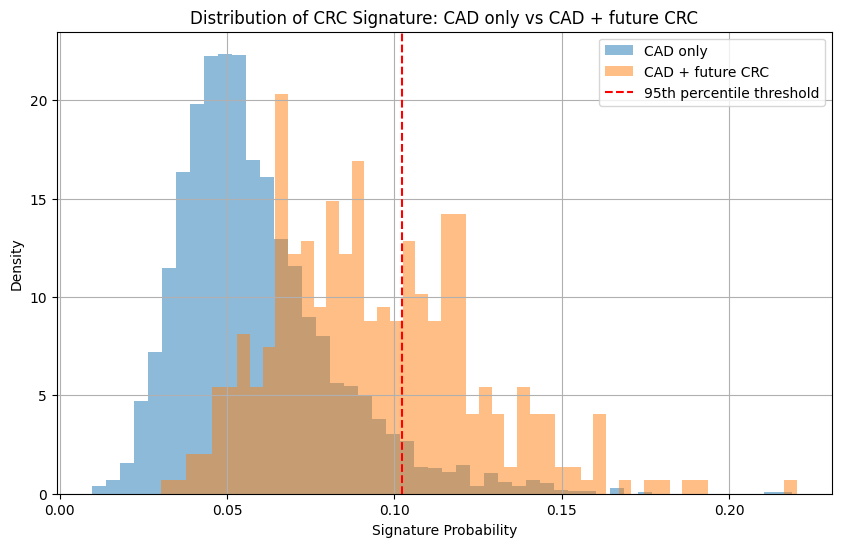

In [62]:
def get_cad_only_patients(base_dir, disease1_idx=0):  # Assuming CAD is disease index 0
    """
    Identify patients who had CAD but didn't develop CRC
    """
    cad_patients = []
    cad_times = []
    
    # Process each batch
    for start_idx in range(0, 400000, 10000):
        end_idx = min(start_idx + 10000, 400000)
        
        try:
            # Load model and Y values for this batch
            model_data = torch.load(os.path.join(base_dir, f'output_{start_idx}_{end_idx}/model.pt'))
            Y = model_data['Y']
            
            # Find patients with CAD but no CRC
            for i in range(len(Y)):
                patient_idx = start_idx + i
                
                # Check if patient has CAD
                cad_times_patient = torch.where(Y[i, disease1_idx] == 1)[0]
                
                if len(cad_times_patient) > 0:  # Has CAD
                    # Check if patient doesn't have CRC
                    if not torch.any(Y[i, 10] == 1):  # Assuming CRC is index 10
                        cad_patients.append(patient_idx)
                        cad_times.append(cad_times_patient[0].item())
    
        except FileNotFoundError:
            continue
    
    # Create DataFrame
    cad_only_df = pd.DataFrame({
        'patient': cad_patients,
        'time_d1': cad_times
    })
    
    print(f"Found {len(cad_only_df)} CAD-only patients")
    return cad_only_df

# Get CAD-only patients
cad_only_df = get_cad_only_patients(base_dir)

# Now run the comparison
def compare_cad_groups(base_dir, sig_refs, results_df, cad_only_df, disease2_idx=10):
    """
    Compare signature patterns between CAD+CRC and CAD-only patients
    """
    # Setup reference trajectory
    healthy_ref = torch.full((1, sig_refs.shape[1]), -5.0)
    full_refs = torch.cat([sig_refs, healthy_ref], dim=0)
    ref_probs = torch.softmax(full_refs, dim=0).numpy()
    
    # Get colon signature
    first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
    phi = first_model['model_state_dict']['phi']
    colon_signature = int(torch.sigmoid(phi[:, disease2_idx, :]).mean(dim=1).argmax().item())
    
    # Track probabilities for both groups
    crc_probs = []  # CAD + CRC group
    cad_probs = []  # CAD only group
    
    # Process each batch
    for start_idx in range(0, 400000, 10000):
        end_idx = min(start_idx + 10000, 400000)
        
        # Get cases from both groups in this batch
        crc_cases = results_df[
            (results_df['patient'] >= start_idx) & 
            (results_df['patient'] < end_idx)
        ]
        cad_cases = cad_only_df[
            (cad_only_df['patient'] >= start_idx) & 
            (cad_only_df['patient'] < end_idx)
        ]
        
        if len(crc_cases) > 0 or len(cad_cases) > 0:
            model = torch.load(os.path.join(base_dir, f'output_{start_idx}_{end_idx}/model.pt'))
            lambda_values = model['model_state_dict']['lambda_']
            thetas = torch.softmax(lambda_values, dim=1)
            
            # Process CRC cases
            for _, case in crc_cases.iterrows():
                patient_idx = int(case['patient'] - start_idx)
                dx_time = int(case['time_d2'])
                time_idx = min(max(0, dx_time - 24), thetas.shape[2]-1)  # 2 years before diagnosis
                prob = thetas[patient_idx, colon_signature, time_idx].item()
                crc_probs.append(prob)
            
            # Process CAD-only cases
            for _, case in cad_cases.iterrows():
                patient_idx = int(case['patient'] - start_idx)
                cad_time = int(case['time_d1'])
                # Take probability at similar timepoint after CAD
                time_idx = min(max(0, cad_time + 24), thetas.shape[2]-1)  # 2 years after CAD
                prob = thetas[patient_idx, colon_signature, time_idx].item()
                cad_probs.append(prob)
    
    # Calculate statistics and plot
    plt.figure(figsize=(10, 6))
    plt.hist(cad_probs, bins=50, alpha=0.5, label='CAD only', density=True)
    plt.hist(crc_probs, bins=50, alpha=0.5, label='CAD + future CRC', density=True)
    
    threshold = np.percentile(cad_probs, 95)
    plt.axvline(threshold, color='r', linestyle='--', label='95th percentile threshold')
    plt.xlabel('Signature Probability')
    plt.ylabel('Density')
    plt.title('Distribution of CRC Signature: CAD only vs CAD + future CRC')
    plt.legend()
    plt.grid(True)
    
    sensitivity = np.mean(np.array(crc_probs) > threshold)
    
    print(f"\nAnalysis Results:")
    print(f"Number of CAD + CRC cases: {len(crc_probs)}")
    print(f"Number of CAD only cases: {len(cad_probs)}")
    print(f"Sensitivity at 95% specificity: {sensitivity:.3f}")
    print(f"\nMean probability:")
    print(f"CAD + CRC: {np.mean(crc_probs):.3f} ± {np.std(crc_probs):.3f}")
    print(f"CAD only: {np.mean(cad_probs):.3f} ± {np.std(cad_probs):.3f}")
    
    return crc_probs, cad_probs, threshold

# Run the comparison
crc_probs, cad_probs, threshold = compare_cad_groups(base_dir, sig_refs=signature_refs, 
                                                    results_df=results_df, cad_only_df=cad_only_df)

In [168]:
disease_names[66]

np.str_('Major depressive disorder')

In [70]:
def print_disease_names(base_dir):
    """
    Print disease names from the first model's DataFrame
    """
    # Load first model
    first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
    
    # Get disease names DataFrame
    disease_names_df = first_model['disease_names']
    
    print("\nAvailable diseases:")
    # Assuming the disease names are in a column - let's see the structure
    print("\nDataFrame structure:")
    print(disease_names_df.head())
    print("\nColumns:", disease_names_df.columns.tolist())
    
    return disease_names_df

# Look at the disease names DataFrame structure
disease_names_df = print_disease_names(base_dir)


Available diseases:

DataFrame structure:
                           0
0        Bacterial enteritis
1            Viral Enteritis
2   Gram negative septicemia
3    Bacterial infection NOS
4  Staphylococcus infections

Columns: [0]


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/3415850116.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_dir

In [71]:
def find_diseases_of_interest(disease_names_df):
    """
    Search for specific diseases and related conditions
    """
    diseases = disease_names_df[0].tolist()  # Get all disease names
    
    print("\nSearching for diseases of interest...")
    
    # Search terms for different conditions
    search_terms = {
        'depression': ['depression', 'depressive', 'mood'],
        'breast_cancer': ['breast', 'mammary'],
        'dementia': ['dementia', 'alzheimer', 'cognitive'],
        'diabetes': ['diabetes', 'diabetic'],
        'heart': ['cad', 'coronary', 'heart', 'cardiac'],
        'cancer': ['cancer', 'neoplasm', 'malignant']
    }
    
    # Find matches
    for category, terms in search_terms.items():
        print(f"\n{category.replace('_', ' ').title()} related conditions:")
        for i, disease in enumerate(diseases):
            if any(term.lower() in disease.lower() for term in terms):
                print(f"{i}: {disease}")

# Find diseases of interest
find_diseases_of_interest(disease_names_df)


Searching for diseases of interest...

Depression related conditions:
66: Major depressive disorder

Breast Cancer related conditions:
16: Breast cancer [female]
17: Malignant neoplasm of female breast
256: Benign neoplasm of breast
257: Lump or mass in breast
258: Hypertrophy of breast (Gynecomastia)

Dementia related conditions:

Diabetes related conditions:
46: Type 1 diabetes
47: Type 2 diabetes
48: Type 2 diabetes with ophthalmic manifestations
49: Diabetic retinopathy

Heart related conditions:
105: Rheumatic disease of the heart valves
111: Unstable angina (intermediate coronary syndrome)
114: Coronary atherosclerosis
115: Other chronic ischemic heart disease, unspecified
116: Other acute and subacute forms of ischemic heart disease
117: Other forms of chronic heart disease
118: Pulmonary heart disease
128: Cardiac arrest
129: Arrhythmia (cardiac) NOS
130: Congestive heart failure (CHF) NOS
131: Heart failure NOS

Cancer related conditions:
10: Colon cancer
11: Malignant neopla

In [78]:
def analyze_multiple_progressions(base_dir, sig_refs, disease_pairs):
    """
    Analyze multiple disease progressions
    """
    results = {}
    
    for disease2_name, disease2_idx in disease_pairs.items():
        print(f"\n\nAnalyzing CAD → {disease2_name} progression")
        
        # Get signature that most strongly predicts second disease
        first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
        phi = first_model['model_state_dict']['phi']
        target_signature = int(torch.sigmoid(phi[:, disease2_idx, :]).mean(dim=1).argmax().item())
        print(f"Disease {disease2_name} is most strongly associated with signature {target_signature}")
        
        # Find progression cases (CAD → disease2)
        progression_df = results_df[results_df['disease2_idx'] == disease2_idx]
        
        # Compare trajectories
        prog_probs, control_probs, threshold = compare_groups(
            base_dir, sig_refs, progression_df, cad_only_df, 
            target_signature, disease2_idx, disease2_name
        )
        
        results[disease2_name] = {
            'progression_probs': prog_probs,
            'control_probs': control_probs,
            'threshold': threshold
        }
    
    return results

# Define disease pairs to analyze
disease_pairs = {
    'Major Depression': 66,
    'Breast Cancer': 17,
    'Type 2 Diabetes': 47
}

# Run analysis for all pairs
results = analyze_multiple_progressions(base_dir, sig_refs=signature_refs, disease_pairs=disease_pairs)



Analyzing CAD → Major Depression progression
Disease Major Depression is most strongly associated with signature 7


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/1605913122.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_di

KeyError: 'disease2_idx'

In [74]:
results_df

patient  time_d1  time_d2  gap  years_between
0       1593       39       48    9       0.750000
1       1636       48       50    2       0.166667
2       3485       12       28   16       1.333333
3       4471       33       49   16       1.333333
4       6154       38       45    7       0.583333
..       ...      ...      ...  ...            ...
384   397524       44       46    2       0.166667
385   397853       35       47   12       1.000000
386   399306       19       24    5       0.416667
387   399609       22       38   16       1.333333
388   399772       33       44   11       0.916667

[389 rows x 5 columns]



Analyzing CAD → Major Depression progression


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/1432669144.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_data = torch.load(os.path.join(base_dir

Found 1829 cases of progression to Major Depression
Disease Major Depression is most strongly associated with signature 7


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/1432669144.py:73: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_di


Analysis Results for Major Depression:
Number of CAD + Major Depression cases: 1829
Number of CAD only cases: 3487
Sensitivity at 95% specificity: 0.101

Mean probability:
CAD + Major Depression: 0.149 ± 0.046
CAD only: 0.130 ± 0.041


Analyzing CAD → Malignant Breast Neoplasm progression
Found 229 cases of progression to Malignant Breast Neoplasm
Disease Malignant Breast Neoplasm is most strongly associated with signature 19

Analysis Results for Malignant Breast Neoplasm:
Number of CAD + Malignant Breast Neoplasm cases: 229
Number of CAD only cases: 3487
Sensitivity at 95% specificity: 0.009

Mean probability:
CAD + Malignant Breast Neoplasm: 0.043 ± 0.011
CAD only: 0.047 ± 0.013


Analyzing CAD → Type 2 Diabetes progression
Found 3281 cases of progression to Type 2 Diabetes
Disease Type 2 Diabetes is most strongly associated with signature 15

Analysis Results for Type 2 Diabetes:
Number of CAD + Type 2 Diabetes cases: 3281
Number of CAD only cases: 3487
Sensitivity at 95% specific

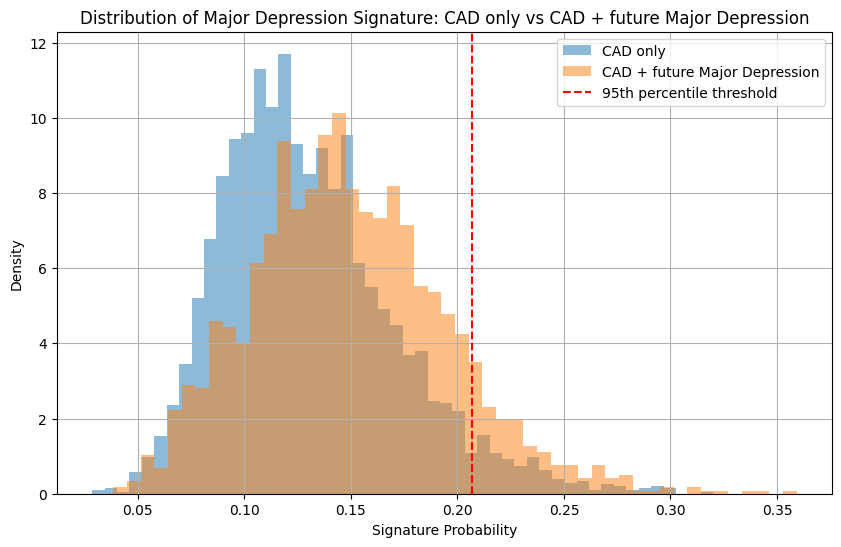

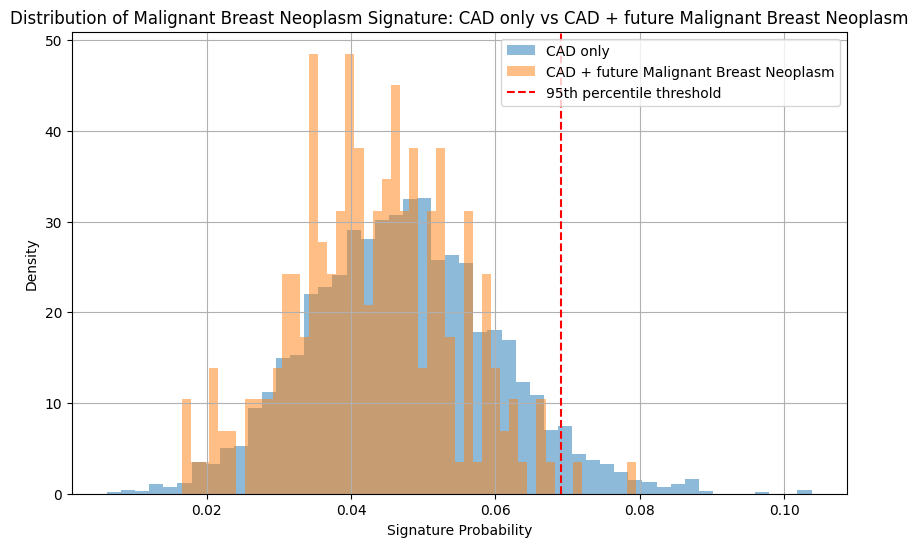

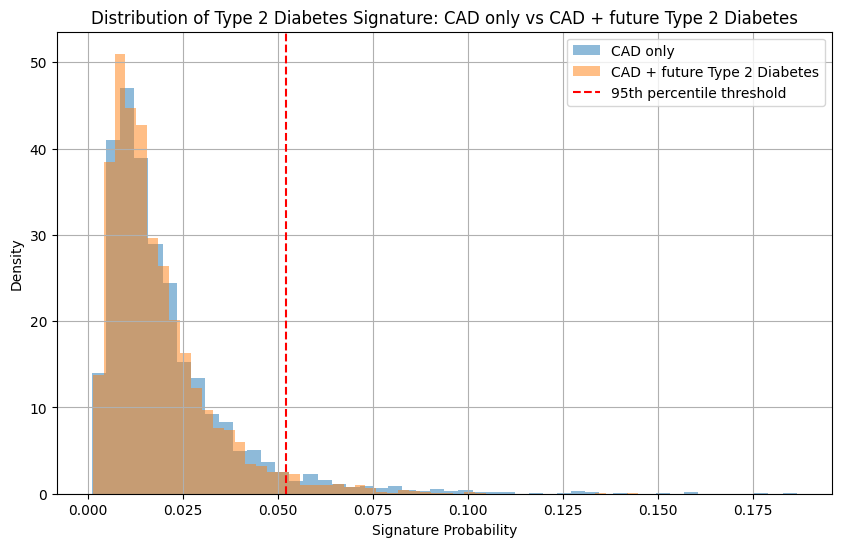

In [81]:
def analyze_multiple_progressions(base_dir, sig_refs, disease_pairs):
    """
    Analyze multiple disease progressions
    """
    all_results = {}
    
    # First get CAD-only cases if we haven't already
    if 'cad_only_df' not in globals():
        cad_only_cases = []
        for start_idx in range(0, 400000, 10000):
            end_idx = min(start_idx + 10000, 400000)
            try:
                model_data = torch.load(os.path.join(base_dir, f'output_{start_idx}_{end_idx}/model.pt'))
                Y = model_data['Y']
                
                # Check each patient in this batch
                for i in range(len(Y)):
                    patient_idx = start_idx + i
                    # Has CAD (114) but none of our target diseases
                    if torch.any(Y[i, 114] == 1) and not any(torch.any(Y[i, d] == 1) for d in disease_pairs.values()):
                        cad_time = torch.where(Y[i, 114] == 1)[0][0].item()
                        cad_only_cases.append({
                            'patient': patient_idx,
                            'time_d1': cad_time
                        })
            except FileNotFoundError:
                continue
        
        global cad_only_df
        cad_only_df = pd.DataFrame(cad_only_cases)
        print(f"Found {len(cad_only_df)} CAD-only cases")
    
    # Now analyze each disease progression
    for disease2_name, disease2_idx in disease_pairs.items():
        print(f"\n\nAnalyzing CAD → {disease2_name} progression")
        
        # Create new progression DataFrame for this disease
        progression_cases = []
        
        # Process each batch to find cases of this specific progression
        for start_idx in range(0, 400000, 10000):
            end_idx = min(start_idx + 10000, 400000)
            try:
                model_data = torch.load(os.path.join(base_dir, f'output_{start_idx}_{end_idx}/model.pt'))
                Y = model_data['Y']
                
                # Check each patient in this batch
                for i in range(len(Y)):
                    patient_idx = start_idx + i
                    
                    # Check if patient has CAD then disease2
                    if torch.any(Y[i, 114] == 1) and torch.any(Y[i, disease2_idx] == 1):
                        cad_time = torch.where(Y[i, 114] == 1)[0][0].item()
                        disease2_time = torch.where(Y[i, disease2_idx] == 1)[0][0].item()
                        
                        if cad_time < disease2_time:  # CAD before disease2
                            progression_cases.append({
                                'patient': patient_idx,
                                'time_d1': cad_time,
                                'time_d2': disease2_time,
                                'gap': disease2_time - cad_time,
                                'years_between': (disease2_time - cad_time) / 12
                            })
            except FileNotFoundError:
                continue
        
        # Create DataFrame for this progression
        prog_df = pd.DataFrame(progression_cases)
        print(f"Found {len(prog_df)} cases of progression to {disease2_name}")
        
        if len(prog_df) > 0:
            # Get signature that most strongly predicts second disease
            first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
            phi = first_model['model_state_dict']['phi']
            target_signature = int(torch.sigmoid(phi[:, disease2_idx, :]).mean(dim=1).argmax().item())
            print(f"Disease {disease2_name} is most strongly associated with signature {target_signature}")
            
            # Compare trajectories
            prog_probs, control_probs, threshold = compare_groups(
                base_dir, sig_refs, prog_df, cad_only_df, 
                target_signature, disease2_idx, disease2_name
            )
            
            all_results[disease2_name] = {
                'progression_probs': prog_probs,
                'control_probs': control_probs,
                'threshold': threshold,
                'n_cases': len(prog_df)
            }
        else:
            print(f"No progression cases found for {disease2_name}")
    
    return all_results

# Define disease pairs to analyze
disease_pairs = {
    'Major Depression': 66,
    'Malignant Breast Neoplasm': 17,  # Changed to malignant neoplasm of female breast
    'Type 2 Diabetes': 47
    "Cerebrovascular disease":
}

# Run analysis for all pairs
results = analyze_multiple_progressions(base_dir, sig_refs=signature_refs, disease_pairs=disease_pairs)

In [ ]:
def print_disease_names(base_dir):
    """
    Print disease names from the first model's DataFrame
    """
    # Load first model
    first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
    
    # Get disease names DataFrame
    disease_names_df = first_model['disease_names']
    
    print("\nAvailable diseases:")
    # Assuming the disease names are in a column - let's see the structure
    print("\nDataFrame structure:")
    print(disease_names_df.head())
    print("\nColumns:", disease_names_df.columns.tolist())
    
    return disease_names_df

# Look at the disease names DataFrame structure
disease_names_df = print_disease_names(base_dir)


Available diseases:

DataFrame structure:
                           0
0        Bacterial enteritis
1            Viral Enteritis
2   Gram negative septicemia
3    Bacterial infection NOS
4  Staphylococcus infections

Columns: [0]


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/3415850116.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_dir

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/1951554032.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_dir


Analysis Results:
Number of primary breast cancer cases: 16608
Number of CAD → breast cancer cases: 229

Mean probability:
Primary breast cancer: 0.050 ± 0.011
CAD → breast cancer: 0.043 ± 0.011


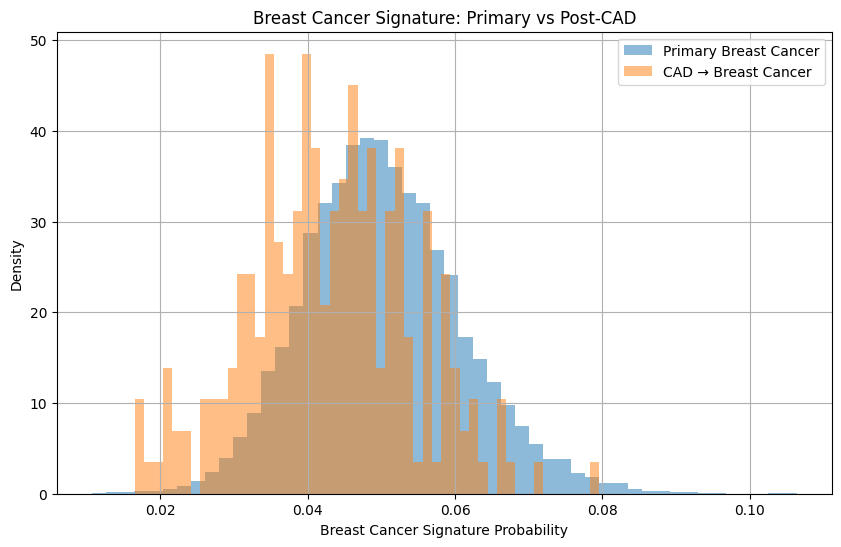

In [82]:
def compare_signature_patterns(base_dir, disease_idx=17, sig_refs=None):
    """
    Compare signature patterns between:
    1. CAD → Breast Cancer patients
    2. Primary Breast Cancer patients (no prior CAD)
    """
    # Get breast cancer signature
    first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
    phi = first_model['model_state_dict']['phi']
    bc_signature = int(torch.sigmoid(phi[:, disease_idx, :]).mean(dim=1).argmax().item())
    
    cad_bc_probs = []  # CAD → BC progression
    primary_bc_probs = []  # Primary BC
    
    # Process each batch
    for start_idx in range(0, 400000, 10000):
        end_idx = min(start_idx + 10000, 400000)
        try:
            model_data = torch.load(os.path.join(base_dir, f'output_{start_idx}_{end_idx}/model.pt'))
            Y = model_data['Y']
            lambda_values = model_data['model_state_dict']['lambda_']
            thetas = torch.softmax(lambda_values, dim=1)
            
            # Check each patient
            for i in range(len(Y)):
                patient_idx = start_idx + i
                
                # If patient has breast cancer
                if torch.any(Y[i, disease_idx] == 1):
                    bc_time = torch.where(Y[i, disease_idx] == 1)[0][0].item()
                    
                    # Get probability 2 years before diagnosis
                    time_idx = max(0, bc_time - 24)
                    prob = thetas[i, bc_signature, time_idx].item()
                    
                    # Check if they had prior CAD
                    had_prior_cad = torch.any(Y[i, 114] == 1)
                    if had_prior_cad:
                        cad_time = torch.where(Y[i, 114] == 1)[0][0].item()
                        if cad_time < bc_time:  # CAD before BC
                            cad_bc_probs.append(prob)
                    else:  # No prior CAD
                        primary_bc_probs.append(prob)
                        
        except FileNotFoundError:
            continue
    
    # Plot distributions
    plt.figure(figsize=(10, 6))
    plt.hist(primary_bc_probs, bins=50, alpha=0.5, label='Primary Breast Cancer', density=True)
    plt.hist(cad_bc_probs, bins=50, alpha=0.5, label='CAD → Breast Cancer', density=True)
    plt.xlabel('Breast Cancer Signature Probability')
    plt.ylabel('Density')
    plt.title('Breast Cancer Signature: Primary vs Post-CAD')
    plt.legend()
    plt.grid(True)
    
    # Print statistics
    print("\nAnalysis Results:")
    print(f"Number of primary breast cancer cases: {len(primary_bc_probs)}")
    print(f"Number of CAD → breast cancer cases: {len(cad_bc_probs)}")
    print(f"\nMean probability:")
    print(f"Primary breast cancer: {np.mean(primary_bc_probs):.3f} ± {np.std(primary_bc_probs):.3f}")
    print(f"CAD → breast cancer: {np.mean(cad_bc_probs):.3f} ± {np.std(cad_bc_probs):.3f}")
    
    return primary_bc_probs, cad_bc_probs

# Run the comparison
primary_probs, cad_bc_probs = compare_signature_patterns(base_dir, disease_idx=17)

In [ ]:
def compare_signature_patterns(base_dir, disease_idx=66, sig_refs=None):
    """
    Compare signature patterns between:
    1. CAD → Breast Cancer patients
    2. Primary Breast Cancer patients (no prior CAD)
    """
    # Get breast cancer signature
    first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
    phi = first_model['model_state_dict']['phi']
    bc_signature = int(torch.sigmoid(phi[:, disease_idx, :]).mean(dim=1).argmax().item())
    
    cad_bc_probs = []  # CAD → BC progression
    primary_bc_probs = []  # Primary BC
    
    # Process each batch
    for start_idx in range(0, 400000, 10000):
        end_idx = min(start_idx + 10000, 400000)
        try:
            model_data = torch.load(os.path.join(base_dir, f'output_{start_idx}_{end_idx}/model.pt'))
            Y = model_data['Y']
            lambda_values = model_data['model_state_dict']['lambda_']
            thetas = torch.softmax(lambda_values, dim=1)
            
            # Check each patient
            for i in range(len(Y)):
                patient_idx = start_idx + i
                
                # If patient has breast cancer
                if torch.any(Y[i, disease_idx] == 1):
                    bc_time = torch.where(Y[i, disease_idx] == 1)[0][0].item()
                    
                    # Get probability 2 years before diagnosis
                    time_idx = max(0, bc_time - 24)
                    prob = thetas[i, bc_signature, time_idx].item()
                    
                    # Check if they had prior CAD
                    had_prior_cad = torch.any(Y[i, 114] == 1)
                    if had_prior_cad:
                        cad_time = torch.where(Y[i, 114] == 1)[0][0].item()
                        if cad_time < bc_time:  # CAD before BC
                            cad_bc_probs.append(prob)
                    else:  # No prior CAD
                        primary_bc_probs.append(prob)
                        
        except FileNotFoundError:
            continue
    
    # Plot distributions
    plt.figure(figsize=(10, 6))
    plt.hist(primary_bc_probs, bins=50, alpha=0.5, label='Primary Breast Cancer', density=True)
    plt.hist(cad_bc_probs, bins=50, alpha=0.5, label='CAD → Breast Cancer', density=True)
    plt.xlabel('Breast Cancer Signature Probability')
    plt.ylabel('Density')
    plt.title('Breast Cancer Signature: Primary vs Post-CAD')
    plt.legend()
    plt.grid(True)
    
    # Print statistics
    print("\nAnalysis Results:")
    print(f"Number of primary breast cancer cases: {len(primary_bc_probs)}")
    print(f"Number of CAD → breast cancer cases: {len(cad_bc_probs)}")
    print(f"\nMean probability:")
    print(f"Primary breast cancer: {np.mean(primary_bc_probs):.3f} ± {np.std(primary_bc_probs):.3f}")
    print(f"CAD → breast cancer: {np.mean(cad_bc_probs):.3f} ± {np.std(cad_bc_probs):.3f}")
    
    return primary_bc_probs, cad_bc_probs

# Run the comparison
primary_probs, cad_bc_probs = compare_signature_patterns(base_dir, disease_idx=17)

In [89]:
def show_all_diseases(disease_names_df):
    """
    Print all disease names with their indices
    """
    print("\nAll diseases:")
    for i, disease in enumerate(disease_names_df[0]):
        print(f"{i}: {disease}")

# Show all diseases
show_all_diseases(disease_names_df)


All diseases:
0: Bacterial enteritis
1: Viral Enteritis
2: Gram negative septicemia
3: Bacterial infection NOS
4: Staphylococcus infections
5: Streptococcus infection
6: E. coli
7: Viral warts & HPV
8: Viral infection
9: Candidiasis
10: Colon cancer
11: Malignant neoplasm of rectum, rectosigmoid junction, and anus
12: Neoplasm of unspecified nature of digestive system
13: Cancer of bronchus; lung
14: Melanomas of skin
15: Other non-epithelial cancer of skin
16: Breast cancer [female]
17: Malignant neoplasm of female breast
18: Cervical intraepithelial neoplasia [CIN] [Cervical dysplasia]
19: Malignant neoplasm of uterus
20: Malignant neoplasm of ovary
21: Cancer of prostate
22: Malignant neoplasm of kidney, except pelvis
23: Malignant neoplasm of bladder
24: Malignant neoplasm, other
25: Secondary malignant neoplasm
26: Secondary malignancy of lymph nodes
27: Secondary malignancy of respiratory organs
28: Secondary malignant neoplasm of digestive systems
29: Secondary malignant neopla

In [117]:
first_model['clusters'][76]

np.int32(7)

In [90]:
disease_pairs = {
    'Cerebrovascular Disease': 132,
    'Colon Cancer': 10,
    'Major Depression': 66
}

# Run comparison for each disease
for disease_name, disease_idx in disease_pairs.items():
    print(f"\nAnalyzing CAD → {disease_name}")
    primary_probs, cad_progression_probs = compare_signature_patterns(
        base_dir, 
        disease_idx=disease_idx,
        disease2_name=disease_name
    )


Analyzing CAD → Cerebrovascular Disease


TypeError: compare_signature_patterns() got an unexpected keyword argument 'disease2_name'


Analyzing CAD → Cerebrovascular Disease


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/3261972880.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_dir


Analysis Results:
Number of primary cases: 3727
Number of CAD → progression cases: 672

Mean probability:
Primary cases: 0.004 ± 0.002
CAD → progression: 0.005 ± 0.002

Analyzing CAD → Colon Cancer

Analysis Results:
Number of primary cases: 5989
Number of CAD → progression cases: 389

Mean probability:
Primary cases: 0.096 ± 0.029
CAD → progression: 0.094 ± 0.030

Analyzing CAD → Major Depression

Analysis Results:
Number of primary cases: 26805
Number of CAD → progression cases: 1829

Mean probability:
Primary cases: 0.126 ± 0.046
CAD → progression: 0.149 ± 0.046

Analyzing CAD → Breast Cancer

Analysis Results:
Number of primary cases: 16608
Number of CAD → progression cases: 229

Mean probability:
Primary cases: 0.050 ± 0.011
CAD → progression: 0.043 ± 0.011


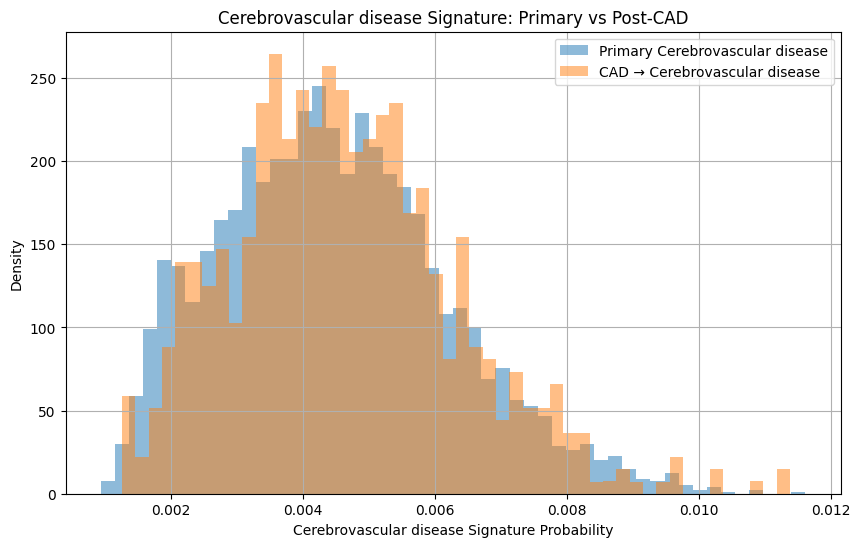

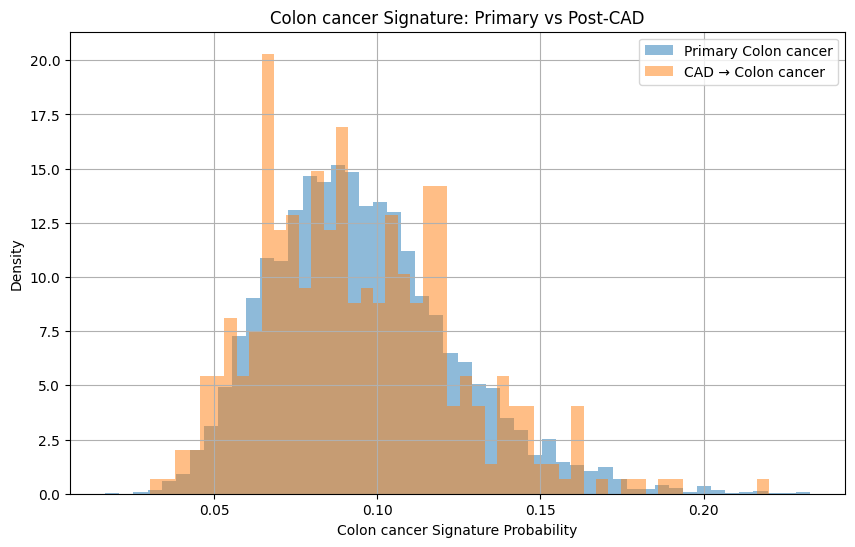

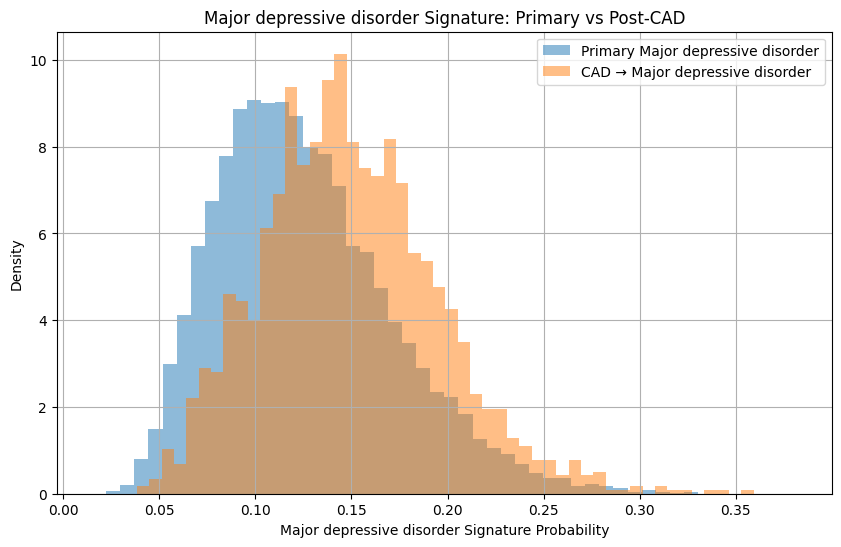

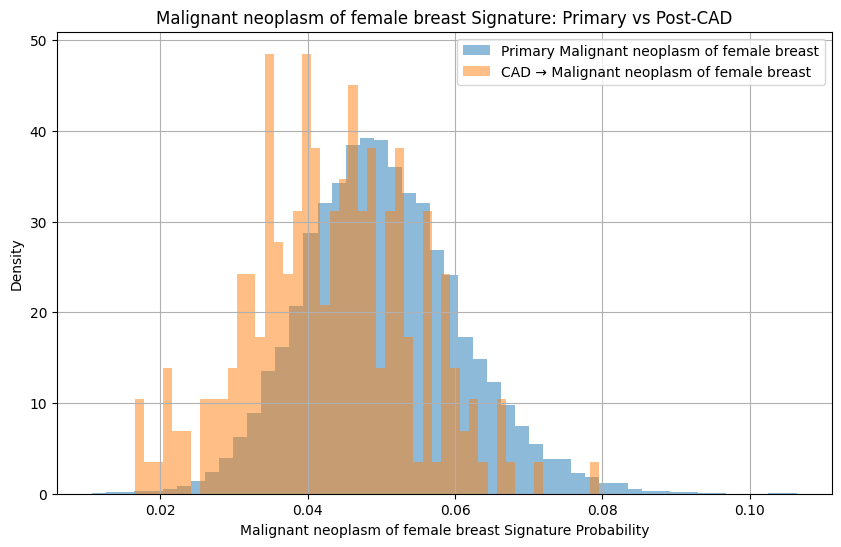

In [92]:
def compare_signature_patterns(base_dir, disease_idx, sig_refs=None):
    """
    Compare signature patterns between:
    1. CAD → Disease progression
    2. Primary Disease cases (no prior CAD)
    """
    # Get disease signature
    first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
    phi = first_model['model_state_dict']['phi']
    disease_signature = int(torch.sigmoid(phi[:, disease_idx, :]).mean(dim=1).argmax().item())
    
    cad_progression_probs = []  # CAD → Disease progression
    primary_probs = []  # Primary Disease
    
    # Process each batch
    for start_idx in range(0, 400000, 10000):
        end_idx = min(start_idx + 10000, 400000)
        try:
            model_data = torch.load(os.path.join(base_dir, f'output_{start_idx}_{end_idx}/model.pt'))
            Y = model_data['Y']
            lambda_values = model_data['model_state_dict']['lambda_']
            thetas = torch.softmax(lambda_values, dim=1)
            
            # Check each patient
            for i in range(len(Y)):
                patient_idx = start_idx + i
                
                # If patient has the disease
                if torch.any(Y[i, disease_idx] == 1):
                    disease_time = torch.where(Y[i, disease_idx] == 1)[0][0].item()
                    
                    # Get probability 2 years before diagnosis
                    time_idx = max(0, disease_time - 24)
                    prob = thetas[i, disease_signature, time_idx].item()
                    
                    # Check if they had prior CAD
                    had_prior_cad = torch.any(Y[i, 114] == 1)
                    if had_prior_cad:
                        cad_time = torch.where(Y[i, 114] == 1)[0][0].item()
                        if cad_time < disease_time:  # CAD before disease
                            cad_progression_probs.append(prob)
                    else:  # No prior CAD
                        primary_probs.append(prob)
                        
        except FileNotFoundError:
            continue
    
    # Plot distributions
    plt.figure(figsize=(10, 6))
    plt.hist(primary_probs, bins=50, alpha=0.5, label=f'Primary {first_model["disease_names"][0][disease_idx]}', density=True)
    plt.hist(cad_progression_probs, bins=50, alpha=0.5, label=f'CAD → {first_model["disease_names"][0][disease_idx]}', density=True)
    plt.xlabel(f'{first_model["disease_names"][0][disease_idx]} Signature Probability')
    plt.ylabel('Density')
    plt.title(f'{first_model["disease_names"][0][disease_idx]} Signature: Primary vs Post-CAD')
    plt.legend()
    plt.grid(True)
    
    # Print statistics
    print("\nAnalysis Results:")
    print(f"Number of primary cases: {len(primary_probs)}")
    print(f"Number of CAD → progression cases: {len(cad_progression_probs)}")
    print(f"\nMean probability:")
    print(f"Primary cases: {np.mean(primary_probs):.3f} ± {np.std(primary_probs):.3f}")
    print(f"CAD → progression: {np.mean(cad_progression_probs):.3f} ± {np.std(cad_progression_probs):.3f}")
    
    return primary_probs, cad_progression_probs

# Run comparison for each disease
disease_pairs = {
    'Cerebrovascular Disease': 132,
    'Colon Cancer': 10,
    'Major Depression': 66,
    'Breast Cancer':17
}

for disease_name, disease_idx in disease_pairs.items():
    print(f"\nAnalyzing CAD → {disease_name}")
    primary_probs, cad_progression_probs = compare_signature_patterns(
        base_dir, 
        disease_idx=disease_idx
    )

In [90]:
refs=torch.load("/Users/sarahurbut/aladynoulli2/pyScripts/reference_trajectories.pt")
signature_refs=refs['signature_refs']

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_83563/90707294.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  refs=torch.load("/Users/sarahurbut/aladynoulli2

In [91]:
signature_refs.shape

torch.Size([20, 52])

In [92]:
base_dir

'/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/'

In [95]:
sig_props = torch.softmax(torch.tensor(refs['signature_refs']), dim=0)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_83563/135524809.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sig_props = torch.softmax(torch.tensor(refs['signature_refs']), dim=0)



Analyzing Breast Cancer with references
Disease signature for Malignant neoplasm of female breast: 19


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_83563/3415759481.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_data = torch.load(os.path.join(base_di


Found 16606 primary cases
Found 229 CAD progression cases

Analyzing Major Depression with references


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_83563/3415759481.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sig_props = torch.softmax(torch.tensor(signature_refs), dim=0)
/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_83563/3415759481.py:131: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sig_props = torch.softmax(torch.tensor(signature_refs), dim=0)


Disease signature for Major depressive disorder: 7

Found 26779 primary cases
Found 1829 CAD progression cases

Analyzing Cerebrovascular Disease with references
Disease signature for Cerebrovascular disease: 11

Found 3727 primary cases
Found 672 CAD progression cases

Analyzing Colon Cancer with references
Disease signature for Colon cancer: 17

Found 5989 primary cases
Found 389 CAD progression cases


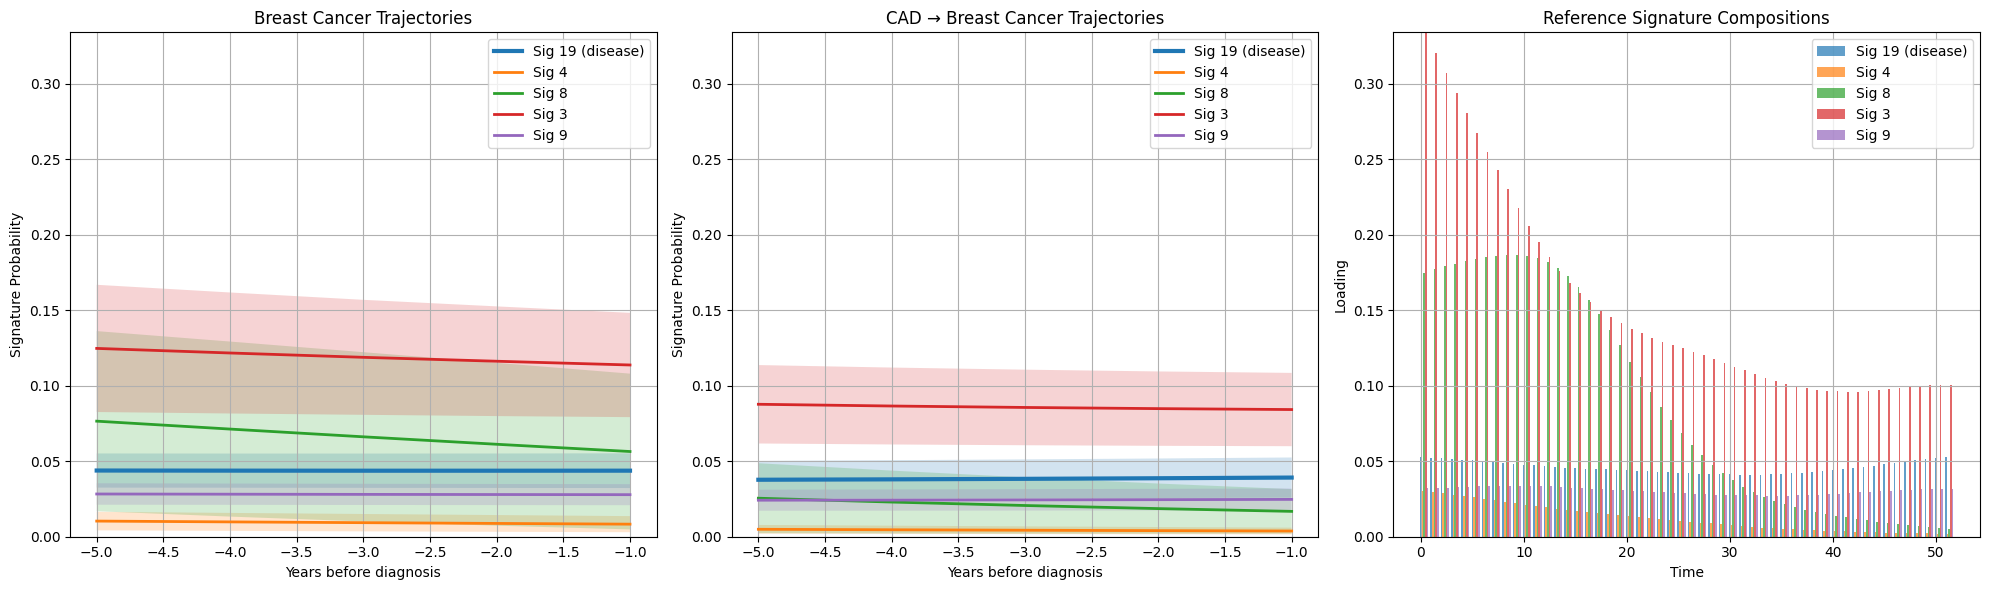

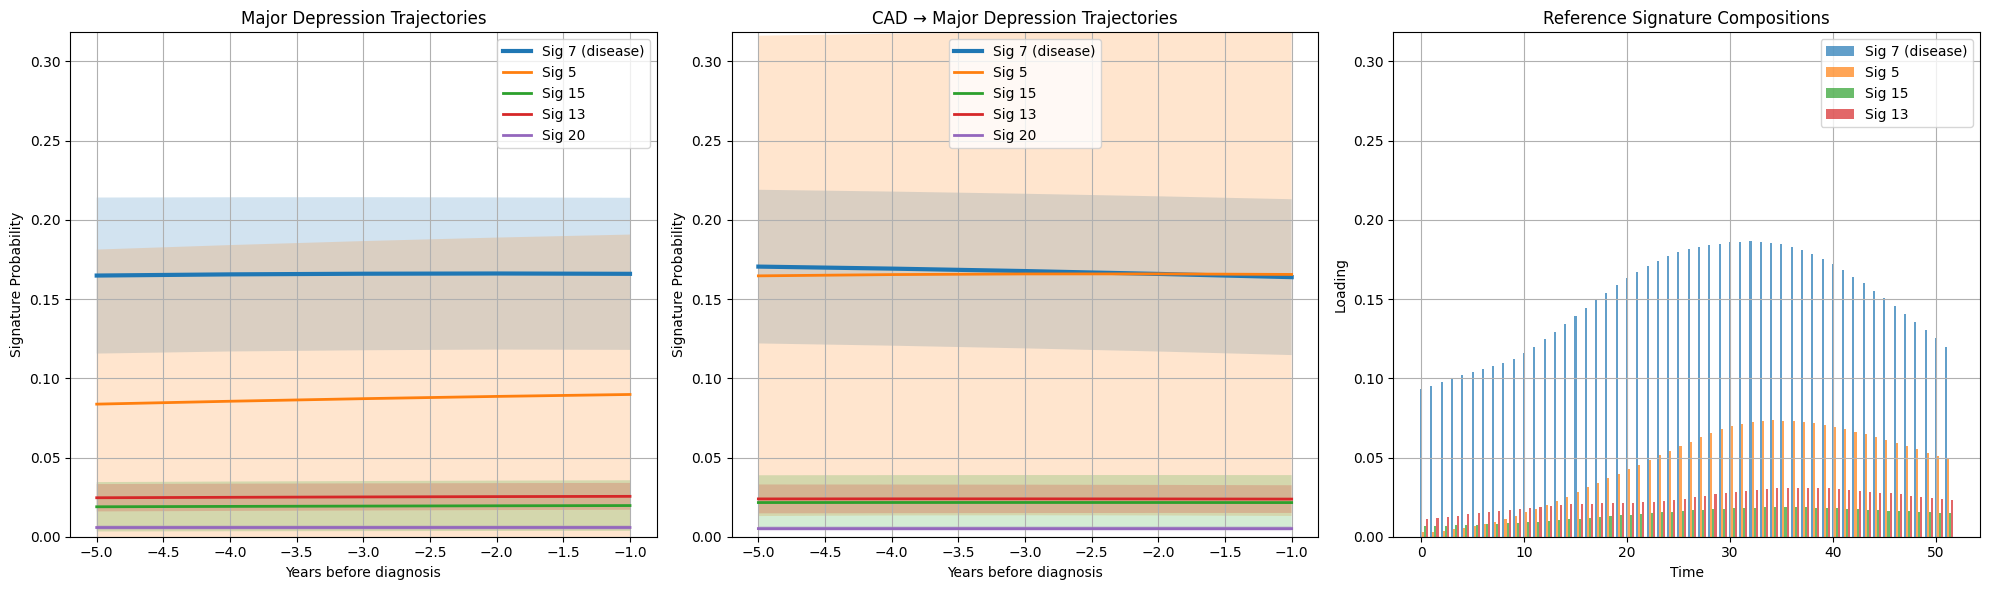

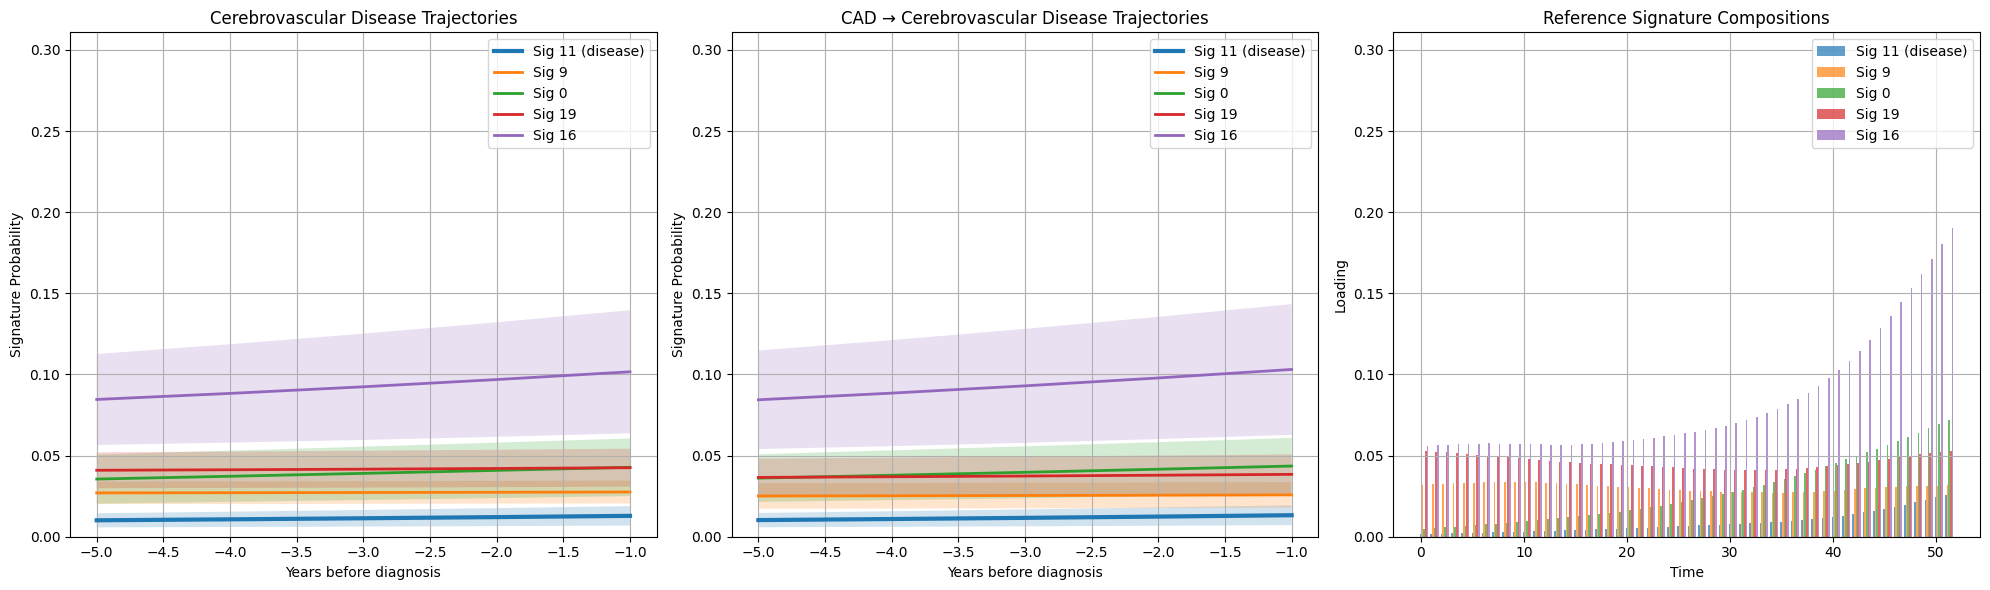

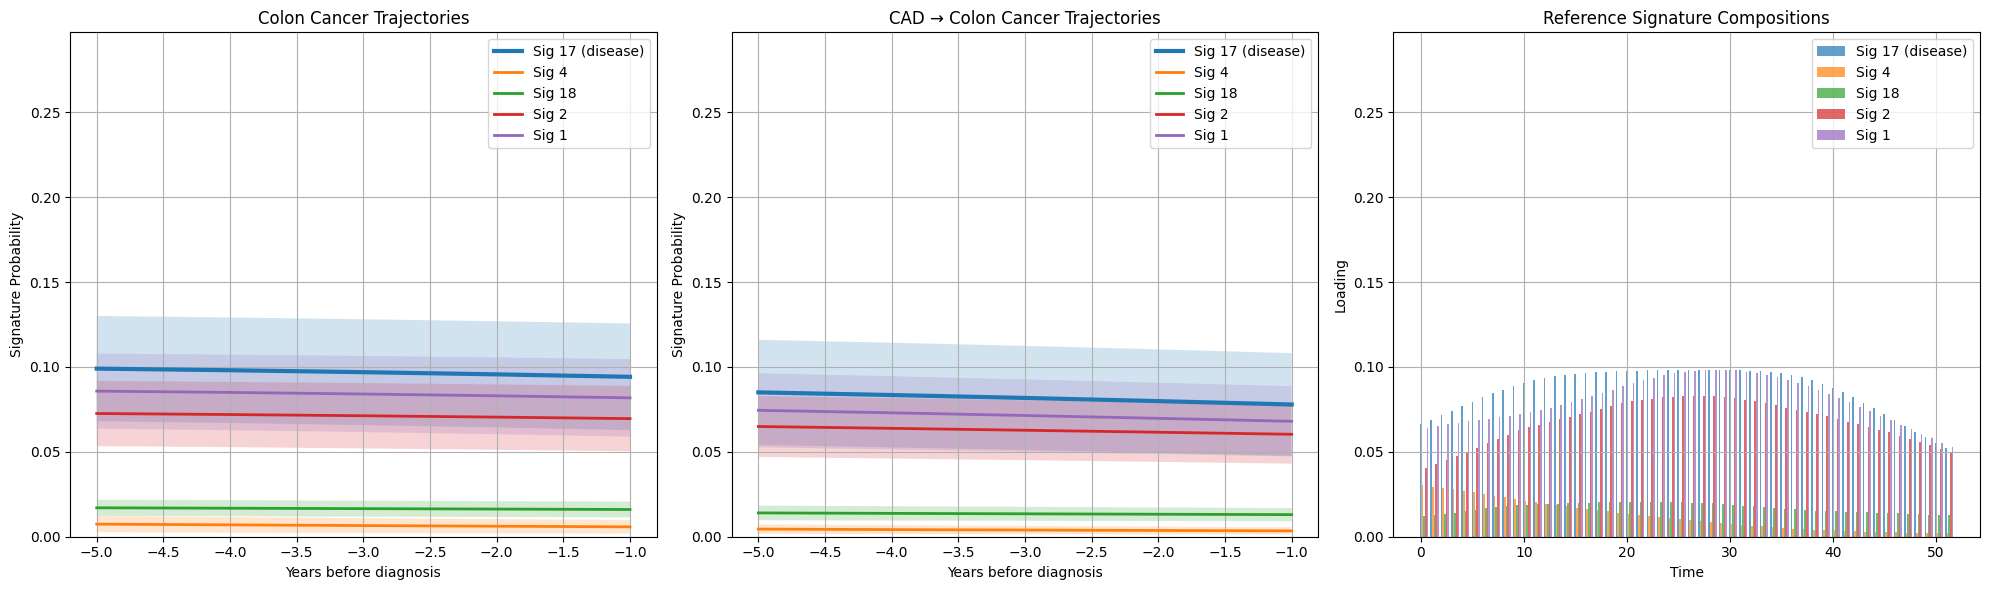

In [102]:
def analyze_temporal_signatures(base_dir, disease_idx, window_size=5):
    """
    Analyze temporal signature patterns before disease diagnosis
    Focus on the disease's primary signature and related ones
    """
    primary_trajectories = []
    cad_trajectories = []
    disease_signature = None
    
    # Process each batch
    for start_idx in range(0, 400000, 10000):
        end_idx = min(start_idx + 10000, 400000)
        try:
            model_data = torch.load(os.path.join(base_dir, f'output_{start_idx}_{end_idx}/model.pt'))
            Y = model_data['Y']
            lambda_values = model_data['model_state_dict']['lambda_']
            thetas = torch.softmax(lambda_values, dim=1)
            
            # Get disease signature - do this only once
            if disease_signature is None:
                phi = model_data['model_state_dict']['phi']
                disease_signature = int(torch.sigmoid(phi[:, disease_idx, :]).mean(dim=1).argmax().item())
                print(f"Disease signature for {model_data['disease_names'][0][disease_idx]}: {disease_signature}")
            
            # Check each patient
            for i in range(len(Y)):
                if torch.any(Y[i, disease_idx] == 1):
                    disease_time = torch.where(Y[i, disease_idx] == 1)[0][0].item()
                    
                    # Get trajectory for fixed window before diagnosis
                    start_time = max(0, disease_time - window_size)
                    time_points = disease_time - start_time
                    
                    # Only include if we have enough history
                    if time_points >= window_size//2:  # At least half the window
                        # Pad with zeros if needed
                        trajectory = np.zeros((thetas.shape[1], window_size))
                        actual_data = thetas[i, :, start_time:disease_time].numpy()
                        trajectory[:, -time_points:] = actual_data
                        
                        # Check if they had prior CAD
                        had_prior_cad = torch.any(Y[i, 114] == 1)
                        if had_prior_cad:
                            cad_time = torch.where(Y[i, 114] == 1)[0][0].item()
                            if cad_time < disease_time:
                                cad_trajectories.append(trajectory)
                        else:
                            primary_trajectories.append(trajectory)
                        
        except FileNotFoundError:
            continue
    
    # Convert to arrays
    primary_trajectories = np.array(primary_trajectories)
    cad_trajectories = np.array(cad_trajectories)
    
    print(f"\nFound {len(primary_trajectories)} primary cases")
    print(f"Found {len(cad_trajectories)} CAD progression cases")
    
    if len(primary_trajectories) == 0 or len(cad_trajectories) == 0:
        print("Not enough cases for analysis")
        return None, None
        
    # Calculate means and standard deviations
    mean_primary = np.mean(primary_trajectories, axis=0)
    std_primary = np.std(primary_trajectories, axis=0)
    mean_cad = np.mean(cad_trajectories, axis=0)
    std_cad = np.std(cad_trajectories, axis=0)
    
    # Get disease signature and correlated signatures
    sig_correlations = np.corrcoef(mean_primary)
    related_sigs = np.argsort(sig_correlations[disease_signature])[-5:]  # Top 4 correlated + disease sig
    sigs_to_plot = [disease_signature]  # Start with disease signature
    sigs_to_plot.extend([s for s in related_sigs if s != disease_signature])
    
    # Calculate softmax for reference signatures
    
    plot_sigs = [sig for sig in sigs_to_plot if sig < 20]
    
    # Calculate softmax for reference signatures
    sig_props = torch.softmax(torch.tensor(signature_refs), dim=0)
    
    # Get y-axis limits
    y_max = max(
        np.max(mean_primary + std_primary),
        np.max(mean_cad + std_cad),
        torch.max(sig_props[plot_sigs]).item()
    )
    y_min = 0  # Since these are all probabilities/proportions
    
    plt.figure(figsize=(20, 6))
    
    # Plot primary cases
    plt.subplot(1, 3, 1)
    for sig in sigs_to_plot:
        plt.plot(range(-window_size, 0), mean_primary[sig], 
                label=f'Sig {sig}{" (disease)" if sig==disease_signature else ""}',
                linewidth=3 if sig==disease_signature else 2)
        plt.fill_between(range(-window_size, 0),
                        mean_primary[sig] - std_primary[sig],
                        mean_primary[sig] + std_primary[sig],
                        alpha=0.2)
    
    plt.title(f'{list(diseases.keys())[list(diseases.values()).index(disease_idx)]} Trajectories')
    plt.xlabel('Years before diagnosis')
    plt.ylabel('Signature Probability')
    plt.ylim(y_min, y_max)
    plt.legend()
    plt.grid(True)
    
    # Plot CAD progression cases
    plt.subplot(1, 3, 2)
    for sig in sigs_to_plot:
        plt.plot(range(-window_size, 0), mean_cad[sig], 
                label=f'Sig {sig}{" (disease)" if sig==disease_signature else ""}',
                linewidth=3 if sig==disease_signature else 2)
        plt.fill_between(range(-window_size, 0),
                        mean_cad[sig] - std_cad[sig],
                        mean_cad[sig] + std_cad[sig],
                        alpha=0.2)
    
    plt.title(f'CAD → {list(diseases.keys())[list(diseases.values()).index(disease_idx)]} Trajectories')
    plt.xlabel('Years before diagnosis')
    plt.ylabel('Signature Probability')
    plt.ylim(y_min, y_max)
    plt.legend()
    plt.grid(True)
    
    # Plot reference signatures
    plt.subplot(1, 3, 3)
    sig_props = torch.softmax(torch.tensor(signature_refs), dim=0)
    
    bar_width = 0.8 / len(plot_sigs)  # Adjust width based on number of signatures
    for i, sig in enumerate(plot_sigs):
        x_positions = np.arange(len(sig_props[sig])) + i * bar_width
        plt.bar(x_positions, sig_props[sig], width=bar_width, alpha=0.7,
                label=f'Sig {sig}{" (disease)" if sig==disease_signature else ""}')
    
    plt.title('Reference Signature Compositions')
    plt.xlabel('Time')
    plt.ylabel('Loading')
    plt.ylim(y_min, y_max)
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    
    return primary_trajectories, cad_trajectories

# Run for each disease
diseases = {
    'Breast Cancer': 17,
    'Major Depression': 66,
    'Cerebrovascular Disease': 132,
    'Colon Cancer': 10,
}

for disease_name, disease_idx in diseases.items():
    print(f"\nAnalyzing {disease_name} with references")
    primary_traj, cad_traj = analyze_temporal_signatures(base_dir, disease_idx)

In [96]:
signature_refs.shape

torch.Size([20, 52])

In [97]:
signature_refs

tensor([[-5.1059, -5.0456, -4.9853,  ..., -2.6202, -2.5767, -2.5330],
        [-2.5581, -2.5542, -2.5502,  ..., -2.7607, -2.8007, -2.8409],
        [-3.0251, -2.9816, -2.9382,  ..., -2.8347, -2.8656, -2.8969],
        ...,
        [-2.5267, -2.4998, -2.4730,  ..., -2.7528, -2.8045, -2.8566],
        [-4.2426, -4.1940, -4.1465,  ..., -4.2500, -4.2633, -4.2765],
        [-2.7581, -2.7757, -2.7931,  ..., -2.8778, -2.8571, -2.8363]])

In [174]:
dn=first_model['disease_names']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(dn)


                                                     0
0                                  Bacterial enteritis
1                                      Viral Enteritis
2                             Gram negative septicemia
3                              Bacterial infection NOS
4                            Staphylococcus infections
5                              Streptococcus infection
6                                              E. coli
7                                    Viral warts & HPV
8                                      Viral infection
9                                          Candidiasis
10                                        Colon cancer
11   Malignant neoplasm of rectum, rectosigmoid jun...
12   Neoplasm of unspecified nature of digestive sy...
13                            Cancer of bronchus; lung
14                                   Melanomas of skin
15                 Other non-epithelial cancer of skin
16                              Breast cancer [female]
17        

In [189]:
def find_signature_increases_with_diagnosis(thetas, Y, window=5):
    """
    Find cases where signature loadings increase with specific diagnoses
    """
    diagnoses_of_interest = {
        'inflammatory': {
            'codes': [
                297,  # Rheumatoid arthritis
                300,  # Polymyalgia Rheumatica
                198,  # Regional enteritis
                199   # Ulcerative colitis
            ],
            'signature': 1
        },
        'metabolic': {
            'codes': [
                46,   # Type 1 diabetes
                47,   # Type 2 diabetes
                60,   # Obesity
                51,   # Hyperlipidemia
            ],
            'signature': 15
        },
        'psychiatric': {
            'codes': [
                66,   # Major depressive disorder
                67,   # Anxiety disorder
                68,   # Alcohol-related disorders
            ],
            'signature': 7
        }
    }
    
    cases = {k: [] for k in diagnoses_of_interest.keys()}
    
    for pt_idx in range(len(all_thetas)):
        for pathway, info in diagnoses_of_interest.items():
            sig = info['signature']
            
            # Look for any of the relevant diagnoses
            for code in info['codes']:
                if torch.any(Y[pt_idx, code] == 1):
                    # Find first occurrence of diagnosis
                    dx_time = torch.where(Y[pt_idx, code] == 1)[0][0].item()
                    
                    if dx_time > window and dx_time < len(thetas[pt_idx, sig]) - window:
                        # Compare signature loading before and after diagnosis
                        before = thetas[pt_idx, sig, dx_time-window:dx_time].mean()
                        after = thetas[pt_idx, sig, dx_time:dx_time+window].mean()
                        
                        # Calculate percent increase
                        pct_increase = (after - before) / before if before > 0 else float('inf')
                        
                        if after > before:  # Any increase
                            cases[pathway].append({
                                'patient_idx': pt_idx,
                                'diagnosis': code,
                                'dx_time': dx_time,
                                'before_loading': before.item() if torch.is_tensor(before) else before,
                                'after_loading': after.item() if torch.is_tensor(after) else after,
                                'pct_increase': pct_increase.item() if torch.is_tensor(pct_increase) else pct_increase,
                                'trajectories': thetas[pt_idx].cpu().numpy() if torch.is_tensor(thetas) else thetas[pt_idx]
                            })
    
    # Sort cases by percent increase and print summary
    for pathway, pathway_cases in cases.items():
        if pathway_cases:
            pathway_cases.sort(key=lambda x: x['pct_increase'], reverse=True)
            print(f"\n{pathway.title()} Pathway:")
            print(f"Found {len(pathway_cases)} cases with signature increases")
            print("\nTop 3 examples:")
            for case in pathway_cases[:3]:
                print(f"Patient {case['patient_idx']}:")
                print(f"  Diagnosis at time {case['dx_time']}")
                print(f"  Loading before: {case['before_loading']:.3f}")
                print(f"  Loading after: {case['after_loading']:.3f}")
                print(f"  Percent increase: {case['pct_increase']:.1%}")
    
    return cases

# Run the analysis
signature_increases = find_signature_increases_with_diagnosis(all_thetas, Y)


Inflammatory Pathway:
Found 5889 cases with signature increases

Top 3 examples:
Patient 163245:
  Diagnosis at time 18
  Loading before: 0.047
  Loading after: 0.059
  Percent increase: 25.6%
Patient 179288:
  Diagnosis at time 16
  Loading before: 0.082
  Loading after: 0.103
  Percent increase: 25.5%
Patient 97080:
  Diagnosis at time 20
  Loading before: 0.063
  Loading after: 0.078
  Percent increase: 25.3%

Metabolic Pathway:
Found 47363 cases with signature increases

Top 3 examples:
Patient 202499:
  Diagnosis at time 14
  Loading before: 0.002
  Loading after: 0.002
  Percent increase: 44.6%
Patient 14374:
  Diagnosis at time 14
  Loading before: 0.007
  Loading after: 0.009
  Percent increase: 41.1%
Patient 386202:
  Diagnosis at time 12
  Loading before: 0.019
  Loading after: 0.027
  Percent increase: 41.0%

Psychiatric Pathway:
Found 24548 cases with signature increases

Top 3 examples:
Patient 375597:
  Diagnosis at time 12
  Loading before: 0.068
  Loading after: 0.092


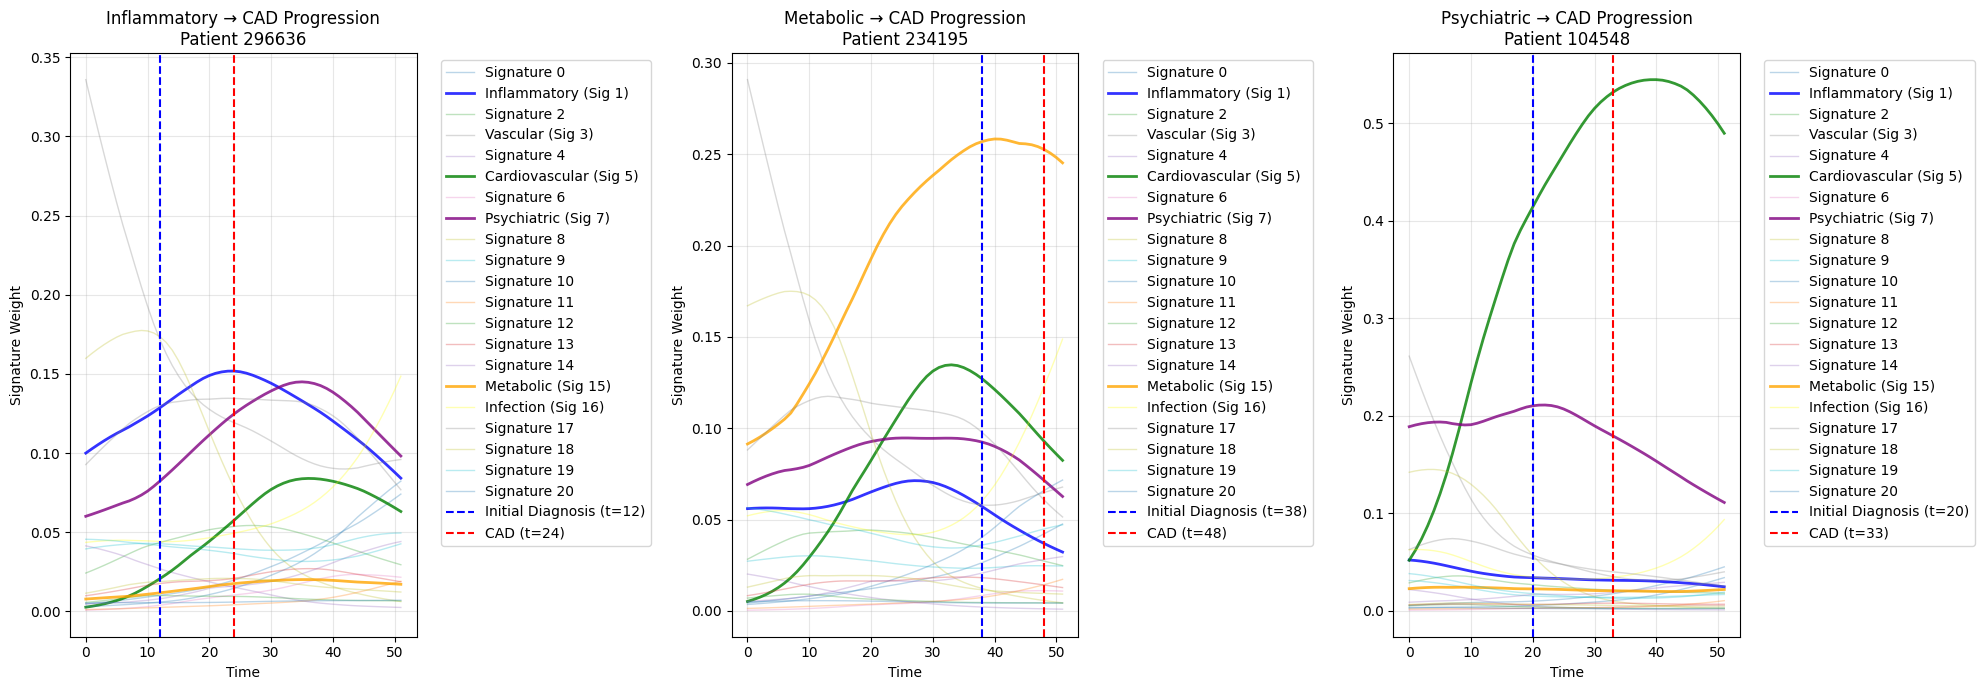

In [193]:
def find_clean_pathway_progressions(thetas, Y, window=5):
    """
    Find clean examples of three distinct pathways to CAD:
    1. Inflammatory → CAD (high Sig 1)
    2. Metabolic → CAD (high Sig 15)
    3. Psychiatric → CAD (high Sig 7)
    """
    pathways = {
        'inflammatory': {
            'codes': [
                297,  # Rheumatoid arthritis
                300,  # Polymyalgia Rheumatica
                198,  # Regional enteritis
                199   # Ulcerative colitis
            ],
            'signature': 1
        },
        'metabolic': {
            'codes': [
                46,   # Type 1 diabetes
                47,   # Type 2 diabetes
                60,   # Obesity
                51,   # Hyperlipidemia
            ],
            'signature': 15
        },
        'psychiatric': {
            'codes': [
                66,   # Major depressive disorder
                67,   # Anxiety disorder
                68,   # Alcohol-related disorders
            ],
            'signature': 7
        }
    }
    
    def calculate_signature_dominance(trajectories, primary_sig, dx_time, window=5):
        """
        Calculate how cleanly dominant the primary signature is after diagnosis
        """
        # Get mean of primary signature after diagnosis
        primary_mean = trajectories[primary_sig, dx_time:dx_time+window].mean()
        
        # Get means of other key signatures
        other_sigs = {1: 'inflammatory', 7: 'psychiatric', 15: 'metabolic'}
        other_means = {
            sig: trajectories[sig, dx_time:dx_time+window].mean()
            for sig in other_sigs if sig != primary_sig
        }
        
        # Calculate dominance ratio with penalty for other signature activity
        max_other = max(other_means.values())
        dominance_ratio = primary_mean / (max_other + 0.01)
        cleanliness_penalty = sum(other_means.values()) / (primary_mean + 0.01)
        
        return dominance_ratio / cleanliness_penalty
    
    cad_idx = 114  # Coronary atherosclerosis
    cases = {k: [] for k in pathways.keys()}
    
    for pt_idx in range(len(all_thetas)):
        # Check if patient develops CAD
        if torch.any(Y[pt_idx, cad_idx] == 1):
            cad_time = torch.where(Y[pt_idx, cad_idx] == 1)[0][0].item()
            
            # Look for initial diagnoses that precede CAD
            for pathway, info in pathways.items():
                sig = info['signature']
                
                for code in info['codes']:
                    if torch.any(Y[pt_idx, code] == 1):
                        dx_time = torch.where(Y[pt_idx, code] == 1)[0][0].item()
                        
                        # Check if diagnosis precedes CAD with enough window
                        if dx_time < cad_time - window and dx_time > window:
                            # Calculate signature dominance
                            dominance_score = calculate_signature_dominance(
                                thetas[pt_idx], sig, dx_time, window)
                            
                            # Compare signature before and after diagnosis
                            before = thetas[pt_idx, sig, dx_time-window:dx_time].mean()
                            after = thetas[pt_idx, sig, dx_time:dx_time+window].mean()
                            
                            if after > before:  # Signature increases after diagnosis
                                cases[pathway].append({
                                    'patient_idx': pt_idx,
                                    'initial_dx': code,
                                    'dx_time': dx_time,
                                    'cad_time': cad_time,
                                    'time_to_cad': cad_time - dx_time,
                                    'dominance_score': dominance_score.item() if torch.is_tensor(dominance_score) else dominance_score,
                                    'trajectories': thetas[pt_idx].cpu().numpy() if torch.is_tensor(thetas) else thetas[pt_idx]
                                })
    
    # Sort cases by dominance score
    for pathway, pathway_cases in cases.items():
        if pathway_cases:
            pathway_cases.sort(key=lambda x: x['dominance_score'], reverse=True)
    
    return cases

def plot_clean_progressions(cases):
    """
    Plot the cleanest examples of each pathway progression
    """
    pathways = ['inflammatory', 'metabolic', 'psychiatric']
    fig, axes = plt.subplots(1, 3, figsize=(20, 7))
    
    sig_colors = {
        1: 'blue',      # Inflammatory
        7: 'purple',    # Psychiatric
        15: 'orange',   # Metabolic
        5: 'green',     # Cardiovascular
        3: 'gray',      # Vascular
        16: 'yellow'    # Infection
    }
    
    sig_labels = {
        1: 'Inflammatory (Sig 1)',
        7: 'Psychiatric (Sig 7)',
        15: 'Metabolic (Sig 15)',
        5: 'Cardiovascular (Sig 5)',
        3: 'Vascular (Sig 3)',
        16: 'Infection (Sig 16)'
    }
    
    for i, pathway in enumerate(pathways):
        if cases[pathway]:
            case = cases[pathway][0]  # Best example
            ax = axes[i]
            
            # Plot signature trajectories
            for sig in range(case['trajectories'].shape[0]):
                color = sig_colors.get(sig, f'C{sig}')
                alpha = 0.8 if sig in [1, 7, 15, 5] else 0.3
                lw = 2 if sig in [1, 7, 15, 5] else 1
                label = sig_labels.get(sig, f'Signature {sig}')
                
                ax.plot(case['trajectories'][sig], 
                       color=color, alpha=alpha, linewidth=lw,
                       label=label)
            
            # Mark key events
            ax.axvline(case['dx_time'], color='blue', linestyle='--', 
                      label=f'Initial Diagnosis (t={case["dx_time"]})')
            ax.axvline(case['cad_time'], color='red', linestyle='--',
                      label=f'CAD (t={case["cad_time"]})')
            
            ax.set_title(f'{pathway.title()} → CAD Progression\nPatient {case["patient_idx"]}')
            ax.set_xlabel('Time')
            ax.set_ylabel('Signature Weight')
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# Run analysis and create plots
clean_cases = find_clean_pathway_progressions(all_thetas, Y)
fig = plot_clean_progressions(clean_cases)
plt.show()

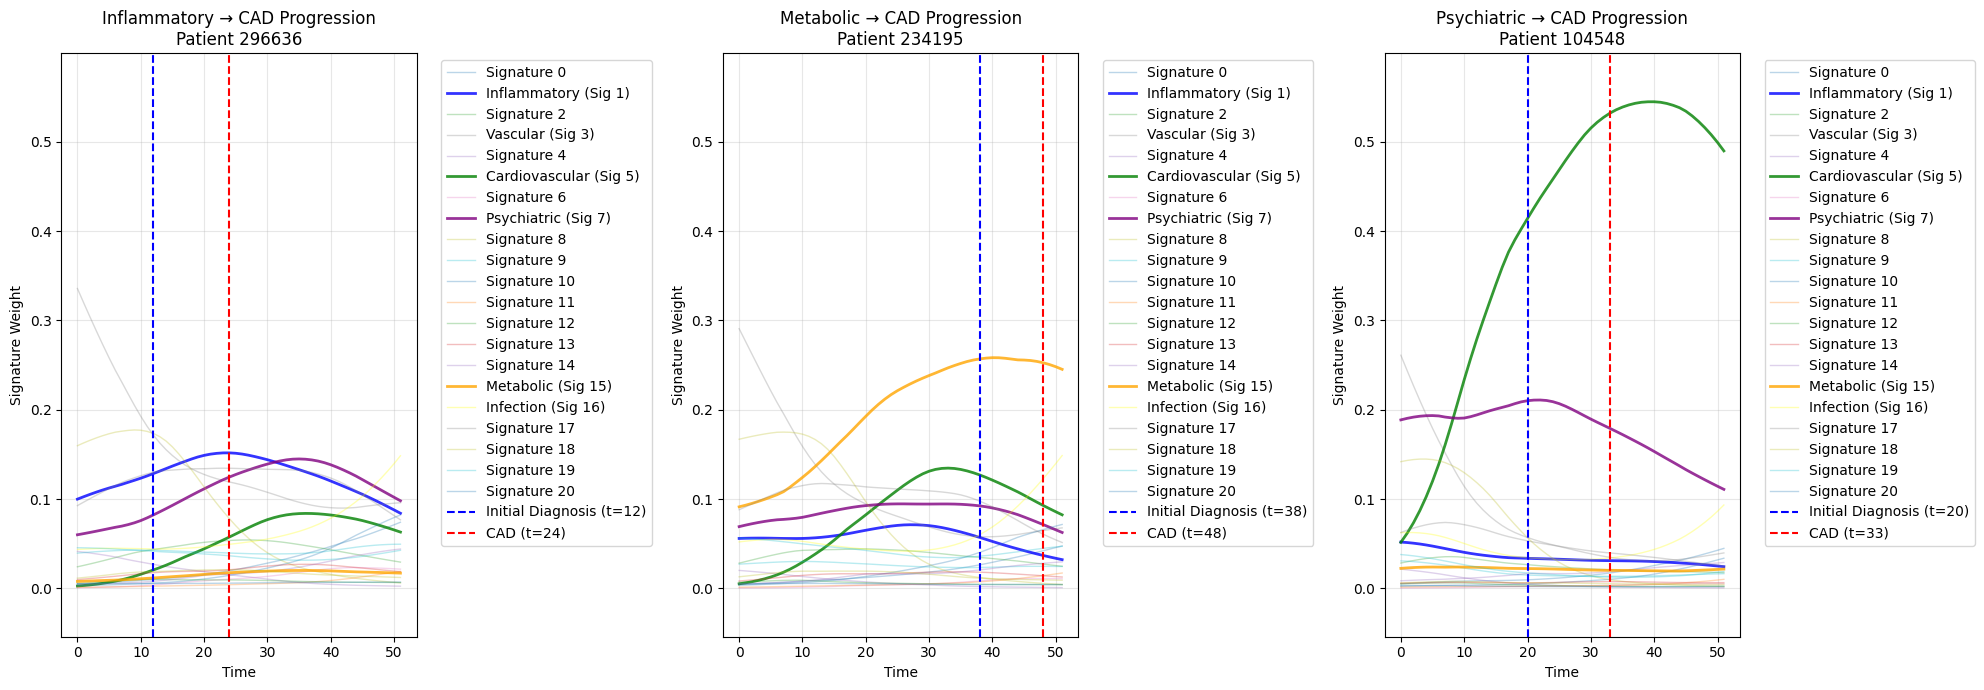

In [197]:
def plot_clean_progressions(cases):
    """
    Plot the cleanest examples of each pathway progression with aligned y-axes
    """
    pathways = ['inflammatory', 'metabolic', 'psychiatric']
    fig, axes = plt.subplots(1, 3, figsize=(20, 7))
    
    sig_colors = {
        1: 'blue',      # Inflammatory
        7: 'purple',    # Psychiatric
        15: 'orange',   # Metabolic
        5: 'green',     # Cardiovascular
        3: 'gray',      # Vascular
        16: 'yellow'    # Infection
    }
    
    sig_labels = {
        1: 'Inflammatory (Sig 1)',
        7: 'Psychiatric (Sig 7)',
        15: 'Metabolic (Sig 15)',
        5: 'Cardiovascular (Sig 5)',
        3: 'Vascular (Sig 3)',
        16: 'Infection (Sig 16)'
    }
    
    # First find global y-axis limits
    y_min, y_max = float('inf'), float('-inf')
    for pathway in pathways:
        if cases[pathway]:
            case = cases[pathway][0]
            y_min = min(y_min, case['trajectories'].min())
            y_max = max(y_max, case['trajectories'].max())
    
    # Add small padding to y-axis limits
    y_padding = (y_max - y_min) * 0.1
    y_min -= y_padding
    y_max += y_padding
    
    for i, pathway in enumerate(pathways):
        if cases[pathway]:
            case = cases[pathway][0]  # Best example
            ax = axes[i]
            
            # Plot signature trajectories
            for sig in range(case['trajectories'].shape[0]):
                color = sig_colors.get(sig, f'C{sig}')
                alpha = 0.8 if sig in [1, 7, 15, 5] else 0.3
                lw = 2 if sig in [1, 7, 15, 5] else 1
                label = sig_labels.get(sig, f'Signature {sig}')
                
                ax.plot(case['trajectories'][sig], 
                       color=color, alpha=alpha, linewidth=lw,
                       label=label)
            
            # Mark key events
            ax.axvline(case['dx_time'], color='blue', linestyle='--', 
                      label=f'Initial Diagnosis (t={case["dx_time"]})')
            ax.axvline(case['cad_time'], color='red', linestyle='--',
                      label=f'CAD (t={case["cad_time"]})')
            
            # Set consistent y-axis limits
            ax.set_ylim(y_min, y_max)
            
            ax.set_title(f'{pathway.title()} → CAD Progression\nPatient {case["patient_idx"]}')
            ax.set_xlabel('Time')
            ax.set_ylabel('Signature Weight')
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# Run analysis and create plots
clean_cases = find_clean_pathway_progressions(all_thetas, Y)
fig = plot_clean_progressions(clean_cases)
plt.show()

In [ ]:
def print_disease_names(base_dir):
    """
    Print disease names from the first model's DataFrame
    """
    # Load first model
    first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
    
    # Get disease names DataFrame
    disease_names_df = first_model['disease_names']
    
    print("\nAvailable diseases:")
    # Assuming the disease names are in a column - let's see the structure
    print("\nDataFrame structure:")
    print(disease_names_df.head())
    print("\nColumns:", disease_names_df.columns.tolist())
    
    return disease_names_df

# Look at the disease names DataFrame structure
disease_names_df = print_disease_names(base_dir)


Available diseases:

DataFrame structure:
                           0
0        Bacterial enteritis
1            Viral Enteritis
2   Gram negative septicemia
3    Bacterial infection NOS
4  Staphylococcus infections

Columns: [0]


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/3415850116.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_dir

In [ ]:
def print_disease_names(base_dir):
    """
    Print disease names from the first model's DataFrame
    """
    # Load first model
    first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
    
    # Get disease names DataFrame
    disease_names_df = first_model['disease_names']
    
    print("\nAvailable diseases:")
    # Assuming the disease names are in a column - let's see the structure
    print("\nDataFrame structure:")
    print(disease_names_df.head())
    print("\nColumns:", disease_names_df.columns.tolist())
    
    return disease_names_df

# Look at the disease names DataFrame structure
disease_names_df = print_disease_names(base_dir)


Available diseases:

DataFrame structure:
                           0
0        Bacterial enteritis
1            Viral Enteritis
2   Gram negative septicemia
3    Bacterial infection NOS
4  Staphylococcus infections

Columns: [0]


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/3415850116.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_dir

In [ ]:
def print_disease_names(base_dir):
    """
    Print disease names from the first model's DataFrame
    """
    # Load first model
    first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
    
    # Get disease names DataFrame
    disease_names_df = first_model['disease_names']
    
    print("\nAvailable diseases:")
    # Assuming the disease names are in a column - let's see the structure
    print("\nDataFrame structure:")
    print(disease_names_df.head())
    print("\nColumns:", disease_names_df.columns.tolist())
    
    return disease_names_df

# Look at the disease names DataFrame structure
disease_names_df = print_disease_names(base_dir)


Available diseases:

DataFrame structure:
                           0
0        Bacterial enteritis
1            Viral Enteritis
2   Gram negative septicemia
3    Bacterial infection NOS
4  Staphylococcus infections

Columns: [0]


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/3415850116.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_dir

In [104]:
first_model['clusters'][17]

np.int32(19)

In [105]:
signature_refs.shape

torch.Size([20, 52])

In [137]:
def plot_signature_temporal_patterns(disease_names, sigs_of_interest=[0,5,6,10,11,7,15,17], n_top=10):
    """Show temporal patterns of top diseases for each signature with emphasis on psychiatric conditions"""
    phi = first_model['model_state_dict']['phi'].detach().numpy()
    prevalence_logit = first_model['logit_prevalence_t'].detach().numpy()
    
    # Center phi values
    phi_centered = np.zeros_like(phi)
    for k in range(phi.shape[0]):
        for d in range(phi.shape[1]):
            phi_centered[k, d, :] = phi[k, d, :] - prevalence_logit[d, :]
    
    phi_avg = phi_centered.mean(axis=2)
    
    # Create figure with white background for PowerPoint
    fig, axes = plt.subplots(8, 1, figsize=(20, 40), dpi=300)
    axes = axes.ravel()
    
    psychiatric_conditions = ['Major depressive disorder', 'Anxiety disorder', 'Bipolar disorder']
    
    # Create age array (assuming 52 time points from age 30 to 82)
    ages = np.linspace(30, 82, phi.shape[2])
    
    for idx, sig in enumerate(sigs_of_interest):
        scores = phi_avg[sig, :]
        top_indices = np.argsort(scores)[-n_top:][::-1]
        
        ax = axes[idx]
        ax.set_facecolor('white')
        
        # Plot each disease trajectory
        for disease_idx in top_indices:
            disease_name = disease_names[disease_idx]
            temporal_pattern = phi[sig, disease_idx, :]
            
            # Highlight psychiatric conditions
            if any(cond.lower() in disease_name.lower() for cond in psychiatric_conditions):
                line_style = '-'
                linewidth = 4
                alpha = 1.0
            else:
                line_style = '-'
                linewidth = 2.5
                alpha = 0.7
            
            ax.plot(ages, temporal_pattern, label=disease_name, 
                   linewidth=linewidth, alpha=alpha, 
                   linestyle=line_style)
        
        ax.set_title(f'Signature {sig} - Disease Temporal Patterns', 
                    fontsize=16, pad=20)
        ax.set_xlabel('Age (years)', fontsize=14)  # Changed label to Age
        ax.set_ylabel('Log Odds Ratio', fontsize=14)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
                 fontsize=12, frameon=True)
        ax.grid(True, alpha=0.3)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=12)
        
        # Set x-axis limits
        ax.set_xlim(30, 82)
    
    plt.suptitle('Disease Progression Patterns by Signature\nHighlighting Psychiatric Conditions', 
                fontsize=20, y=1.02)
    
    plt.tight_layout()
    
    # Save as SVG
    plt.savefig('/Users/sarahurbut/Dropbox (Personal)/temporal_patterns.svg', 
                bbox_inches='tight', facecolor='white',
                format='svg')
    plt.close('all')

# Run the analysis
disease_names = first_model['disease_names'][0].tolist()
plot_signature_temporal_patterns(disease_names=disease_names)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_2103/1566077990.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


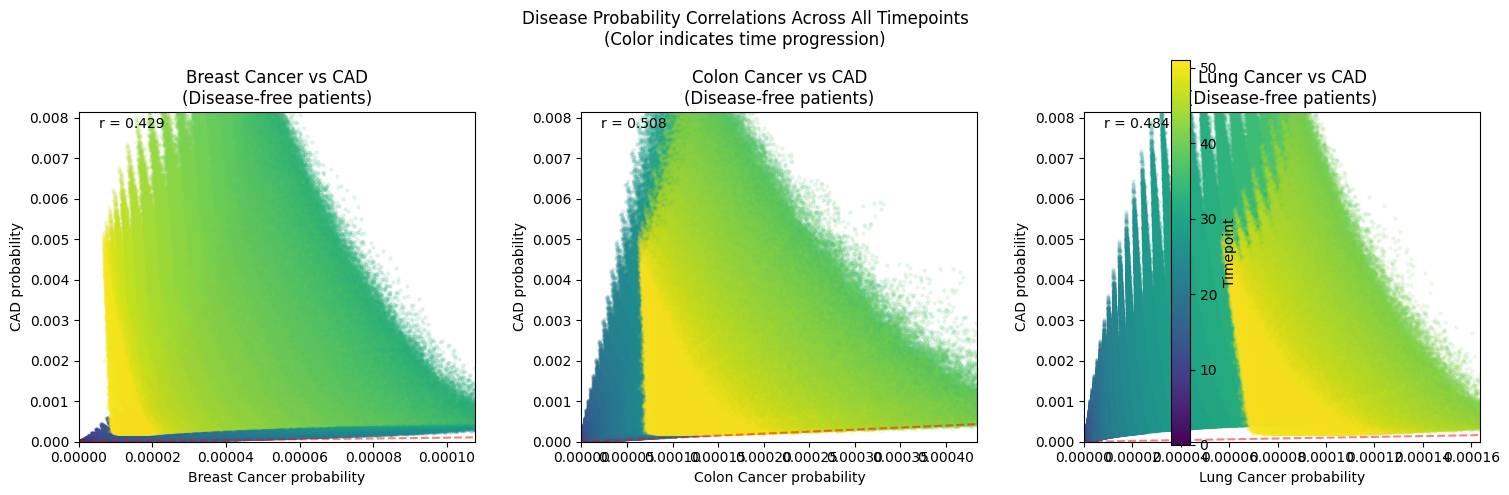

In [236]:
def plot_cancer_CAD_correlations(pi_pred, Y, n_patients=400000):
    """
    Plot correlations between cancer probabilities and CAD for first 400K disease-free patients
    across all timepoints, with adjusted axes
    """
    # Subset data
    Y_subset = Y[:n_patients]
    pi_pred_subset = pi_pred[:n_patients]
    
    # Disease indices from the list
    disease_pairs = [
        (16, 114),  # Breast cancer [female] vs CAD
        (10, 114),  # Colon cancer vs CAD
        (13, 114)   # Cancer of bronchus; lung vs CAD
    ]
    
    disease_names = [
        "Breast Cancer",
        "Colon Cancer", 
        "Lung Cancer"
    ]
    
    fig, axes = plt.subplots(1, len(disease_pairs), figsize=(15, 5))
    
    # Create colormap for time progression
    colors = plt.cm.viridis(np.linspace(0, 1, 52))
    
    for idx, (cancer_idx, cad_idx) in enumerate(disease_pairs):
        all_cancer_probs = []
        all_cad_probs = []
        
        for t in range(52):  # For each timepoint
            # Get disease-free patients at this timepoint
            healthy_mask = (Y_subset[:, cancer_idx, t] == 0) & (Y_subset[:, cad_idx, t] == 0)
            
            # Get probabilities for disease pair for healthy patients
            prob_cancer = pi_pred_subset[healthy_mask, cancer_idx, t]
            prob_cad = pi_pred_subset[healthy_mask, cad_idx, t]
            
            # Store for finding overall range
            all_cancer_probs.append(prob_cancer)
            all_cad_probs.append(prob_cad)
            
            # Create scatter plot with color indicating time
            axes[idx].scatter(prob_cancer, prob_cad, alpha=0.1, color=colors[t], s=5)
        
        # Combine all timepoints for correlation
        all_cancer = np.concatenate(all_cancer_probs)
        all_cad = np.concatenate(all_cad_probs)
        
        # Set axes limits based on actual ranges (with small padding)
        max_cancer = np.percentile(all_cancer, 99.9)
        max_cad = np.percentile(all_cad, 99.9)
        axes[idx].set_xlim(0, max_cancer * 1.1)
        axes[idx].set_ylim(0, max_cad * 1.1)
        
        axes[idx].set_xlabel(f'{disease_names[idx]} probability')
        axes[idx].set_ylabel('CAD probability')
        axes[idx].set_title(f'{disease_names[idx]} vs CAD\n(Disease-free patients)')
        
        # Add correlation coefficient for all timepoints
        corr = np.corrcoef(all_cancer, all_cad)[0,1]
        axes[idx].text(0.05, 0.95, f'r = {corr:.3f}', 
                      transform=axes[idx].transAxes)
        
        # Add diagonal line up to the max value
        max_val = max(max_cancer, max_cad)
        axes[idx].plot([0, max_val], [0, max_val], 'r--', alpha=0.5)
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=51))
    cbar = fig.colorbar(sm, ax=axes, label='Timepoint')
    
    plt.suptitle('Disease Probability Correlations Across All Timepoints\n(Color indicates time progression)')
    plt.tight_layout()
    return fig

# Run the analysis
fig = plot_cancer_CAD_correlations(pi_pred, Y, n_patients=400000)
plt.show()

In [237]:
def find_anticorrelated_diseases(pi_pred, Y, n_patients=400000, timepoint=51):
    """
    Find diseases that are anti-correlated with CAD in their probabilities
    """
    # Get last timepoint data for disease-free patients
    Y_last = Y[:n_patients, :, timepoint]
    pi_last = pi_pred[:n_patients, :, timepoint]
    
    # CAD index is 114
    cad_idx = 114
    correlations = []
    
    # Calculate correlation with each disease
    for disease_idx in range(pi_last.shape[1]):
        if disease_idx != cad_idx:
            # Get disease-free patients for both conditions
            healthy_mask = (Y_last[:, disease_idx] == 0) & (Y_last[:, cad_idx] == 0)
            
            # Get probabilities
            prob_disease = pi_last[healthy_mask, disease_idx]
            prob_cad = pi_last[healthy_mask, cad_idx]
            
            # Calculate correlation
            corr = np.corrcoef(prob_disease, prob_cad)[0,1]
            correlations.append((disease_idx, corr))
    
    # Sort by correlation (most negative first)
    correlations.sort(key=lambda x: x[1])
    
    # Print top anti-correlated diseases
    print("\nMost anti-correlated diseases with CAD:")
    for idx, corr in correlations[:10]:
        print(f"Disease {idx}: correlation = {corr:.3f}")
        
    return correlations

# Find anti-correlated diseases
correlations = find_anticorrelated_diseases(pi_pred, Y)


Most anti-correlated diseases with CAD:
Disease 265: correlation = -0.856
Disease 40: correlation = -0.834
Disease 262: correlation = -0.809
Disease 239: correlation = -0.799
Disease 234: correlation = -0.792
Disease 270: correlation = -0.781
Disease 235: correlation = -0.774
Disease 242: correlation = -0.769
Disease 266: correlation = -0.761
Disease 219: correlation = -0.740


In [245]:
def analyze_CAD_patterns(pi_pred, Y, n_patients=400000, timepoint=51):
    """
    Create a heatmap of disease correlations with CAD and cluster similar patterns
    """
    import seaborn as sns
    from scipy.cluster.hierarchy import linkage, dendrogram
    
    # Get last timepoint data
    Y_last = Y[:n_patients, :, timepoint]
    pi_last = pi_pred[:n_patients, :, timepoint]
    
    # CAD index is 114
    cad_idx = 114
    
    # Calculate correlations for all diseases
    correlations = []
    disease_names = []  # We'll need the actual disease names here
    
    # Create correlation matrix
    n_diseases = pi_last.shape[1]
    corr_matrix = np.zeros((n_diseases, n_diseases))
    
    for i in range(n_diseases):
        for j in range(i+1, n_diseases):
            # Get disease-free patients for both conditions
            healthy_mask = (Y_last[:, i] == 0) & (Y_last[:, j] == 0)
            
            # Get probabilities
            prob_i = pi_last[healthy_mask, i]
            prob_j = pi_last[healthy_mask, j]
            
            # Calculate correlation
            corr = np.corrcoef(prob_i, prob_j)[0,1]
            corr_matrix[i,j] = corr
            corr_matrix[j,i] = corr
    
    # Perform hierarchical clustering
    linkage_matrix = linkage(corr_matrix, method='ward')
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    # Plot dendrogram
    dendrogram(linkage_matrix, ax=ax1)
    ax1.set_title('Disease Clustering based on Correlation Patterns')
    
    # Plot heatmap
    sns.heatmap(corr_matrix, 
                cmap='RdBu_r',
                center=0,
                ax=ax2,
                cbar_kws={'label': 'Correlation'})
    ax2.set_title('Disease Correlation Heatmap')
    
    plt.tight_layout()
    return fig, corr_matrix

# Create visualization
fig, corr_matrix = analyze_CAD_patterns(pi_pred, Y)
plt.show()

# Also print top positive and negative correlations with CAD
cad_idx = 114
cad_correlations = corr_matrix[cad_idx]
top_pos = np.argsort(cad_correlations)[-10:][::-1]
top_neg = np.argsort(cad_correlations)[:10]

print("\nTop positive correlations with CAD:")
for idx in top_pos:
    print(f"Disease {idx}: {cad_correlations[idx]:.3f}")

print("\nTop negative correlations with CAD:")
for idx in top_neg:
    print(f"Disease {idx}: {cad_correlations[idx]:.3f}")

KeyboardInterrupt: 

In [246]:
def calculate_10year_risk(pi):
    """
    pi: hazard rates [N, D, T]
    returns: 10-year risk [N, D]
    """
    # Calculate survival probabilities
    survival_prob = torch.cumprod(1 - pi[:, :, :10], dim=2)  # Up to 10 years
    
    # 10-year risk is 1 minus survival probability at year 10
    risk_10year = 1 - survival_prob[:, :, -1]
    
    return risk_10year

In [133]:
def calibrate_cad_predictions(pi_pred, cad_index=114):
    """
    Calibrate the CAD predictions using the smoothed empirical calibration curve
    
    Args:
        pi_pred: raw model predictions [N, D, T]
        cad_index: index for CAD (114)
    """
    # First calculate raw 10-year risks
    raw_10yr_risk = calculate_10year_risk(pi_pred)
    raw_cad_risk = raw_10yr_risk[:, cad_index]
    
    # Apply smoothed calibration function
    # This should be the function we derived earlier that maps
    # model predictions to empirical rates
    def smoothed_calibration(x):
        # Insert the actual calibration function we derived
        # This might be a spline or other smooth function
        # that maps raw_prob -> calibrated_prob
        pass
    
    calibrated_risk = smoothed_calibration(raw_cad_risk)
    
    return calibrated_risk

# Then we can use this in our comparison:
def compare_with_pce(pi_pred, patient_ids, pce_df, cad_index=114):
    # First calibrate
    calibrated_risks = calibrate_cad_predictions(pi_pred)
    
    # Then do the comparison...

In [134]:
# Get μ_dt from checkpoint and predictions
mu_dt = first_model['prevalence_t'][114,:]  # Shape: (348, 52)
scale_factor = np.mean(mu_dt) / np.mean(predicted_risk_2d)
scaled_risk_2d = predicted_risk_2d * scale_factor

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Original predictions vs μ_dt
ax1.scatter(mu_dt.flatten(), predicted_risk_2d.flatten(), 
           alpha=0.3, color='blue', s=10)
ax1.plot([0, max(mu_dt.max(), predicted_risk_2d.max())], 
         [0, max(mu_dt.max(), predicted_risk_2d.max())], 
         'k--', label='x=y')
ax1.set_xlabel('Smoothed Prevalence (μ_dt)')
ax1.set_ylabel('Original Predicted Risk')
ax1.set_title('Original Predictions vs Smoothed Prevalence')
ax1.set_xscale('log')
ax1.set_yscale('log')

# Scaled predictions vs μ_dt
ax2.scatter(mu_dt.flatten(), scaled_risk_2d.flatten(), 
           alpha=0.3, color='green', s=10)
ax2.plot([0, max(mu_dt.max(), scaled_risk_2d.max())], 
         [0, max(mu_dt.max(), scaled_risk_2d.max())], 
         'k--', label='x=y')
ax2.set_xlabel('Smoothed Prevalence (μ_dt)')
ax2.set_ylabel('Scaled Predicted Risk')
ax2.set_title(f'Simple Scaling (factor={scale_factor:.2f}) vs Smoothed Prevalence')
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

NameError: name 'predicted_risk_2d' is not defined

ASCVD Hazard scaling factor: 2.69


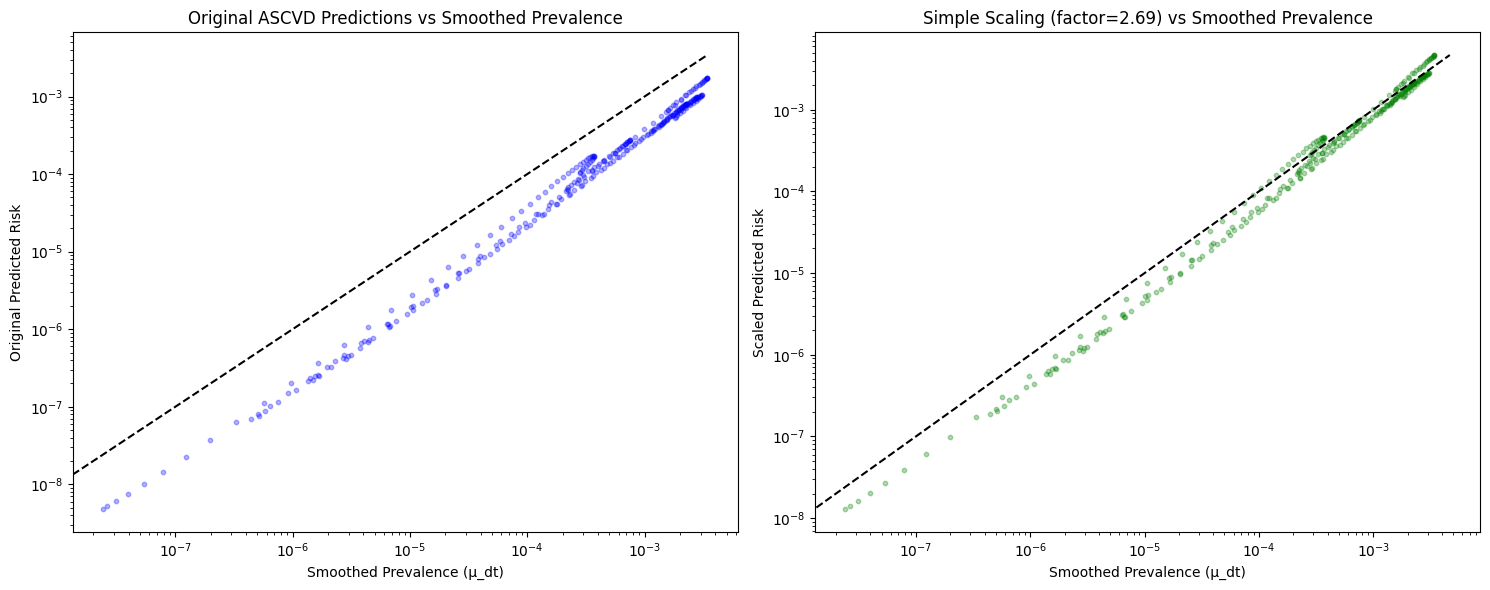

np.float64(2.688078123174822)

In [64]:
def calibrate_ascvd_hazards(pi_pred, first_model):
    """
    Calibrate ASCVD hazards using population-level rates
    """
    ascvd_indices = [111, 112, 113, 114, 115, 116]
    
    # Get mean predictions across patients for each ASCVD condition and timepoint
    pred_risk = pi_pred[:, ascvd_indices, :].mean(axis=0)  # Shape: [6 diseases, 52 timepoints]
    
    # Get prevalence for ASCVD conditions
    if torch.is_tensor(first_model['prevalence_t']):
        mu_dt = first_model['prevalence_t'][ascvd_indices].cpu().numpy()
    else:
        mu_dt = first_model['prevalence_t'][ascvd_indices]
    
    # Calculate scaling factor from overall means
    scale_factor = np.mean(mu_dt) / np.mean(pred_risk)
    print(f"ASCVD Hazard scaling factor: {scale_factor:.2f}")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Original predictions vs μ_dt
    ax1.scatter(mu_dt.flatten(), pred_risk.flatten(), 
               alpha=0.3, color='blue', s=10)
    ax1.plot([0, max(mu_dt.max(), pred_risk.max())], 
             [0, max(mu_dt.max(), pred_risk.max())], 
             'k--', label='x=y')
    ax1.set_xlabel('Smoothed Prevalence (μ_dt)')
    ax1.set_ylabel('Original Predicted Risk')
    ax1.set_title('Original ASCVD Predictions vs Smoothed Prevalence')
    ax1.set_xscale('log')
    ax1.set_yscale('log')

    # Scaled predictions vs μ_dt
    scaled_risk = pred_risk * scale_factor
    ax2.scatter(mu_dt.flatten(), scaled_risk.flatten(), 
               alpha=0.3, color='green', s=10)
    ax2.plot([0, max(mu_dt.max(), scaled_risk.max())], 
             [0, max(mu_dt.max(), scaled_risk.max())], 
             'k--', label='x=y')
    ax2.set_xlabel('Smoothed Prevalence (μ_dt)')
    ax2.set_ylabel('Scaled Predicted Risk')
    ax2.set_title(f'Simple Scaling (factor={scale_factor:.2f}) vs Smoothed Prevalence')
    ax2.set_xscale('log')
    ax2.set_yscale('log')

    plt.tight_layout()
    plt.show()
    

        
    return scale_factor

calibrate_ascvd_hazards(pi_pred=pi_pred,first_model=first_model)

In [58]:
patient_ids=np.load('/Users/sarahurbut/aladynoulli2/pyScripts/npys/processed_patient_ids.npy')

In [60]:
import pandas as pd 
# Try reading with rpy2 explicitly preserving row names
from rpy2.robjects import r

# Read with explicit row.names preservation
r('''
read_rds_with_names <- function(path) {
    df <- readRDS(path)
    attr(df, "row.names") <- rownames(df)
    df
}
''')

pce_df = r['read_rds_with_names']('/Users/sarahurbut/Dropbox (Personal)/pce_withnames.rds')

# Convert to pandas with index
pce_array = np.array(pce_df)
ages = range(40, 80)
pce_df = pd.DataFrame(pce_array, columns=ages)

# Print what we got
print("Shape:", pce_df.shape)
print("\nFirst few rows:")
print(pce_df.head())

# Or alternatively, we could read the row names separately:
row_names = r('rownames(readRDS("/Users/sarahurbut/Dropbox (Personal)/pce_withnames.rds"))')
pce_df.index = np.array(row_names)


Shape: (79117, 40)

First few rows:
     40    41    42    43    44    45    46    47    48    49  ...     70  \
0  3.25  3.63  4.05  4.50  4.98  5.51  6.08  6.69  7.34  8.04  ...  35.06   
1  2.05  2.30  2.56  2.85  3.16  3.50  3.86  4.25  4.67  5.12  ...  23.55   
2  1.00  1.00  1.00  1.00  1.00  1.00  1.04  1.13  1.22  1.33  ...  10.64   
3  1.89  1.95  2.02  2.11  2.21  2.33  2.46  2.60  2.76  2.94  ...  16.06   
4  1.31  1.38  1.46  1.56  1.67  1.79  1.93  2.08  2.25  2.44  ...  18.03   

      71     72     73     74     75     76     77     78     79  
0  36.92  38.82  40.75  42.72  44.71  46.73  48.77  50.82  52.88  
1  24.91  26.32  27.77  29.26  30.80  32.37  33.98  35.62  37.30  
2  11.80  13.09  14.51  16.07  17.79  19.68  21.74  23.98  26.42  
3  17.53  19.13  20.86  22.73  24.76  26.94  29.29  31.80  34.48  
4  19.88  21.90  24.10  26.49  29.08  31.86  34.85  38.04  41.42  

[5 rows x 40 columns]


In [61]:
# Get the row names from R
row_names = np.array(r('rownames(readRDS("/Users/sarahurbut/Dropbox (Personal)/pce_withnames.rds"))'))

# Create DataFrame with proper row names and age columns
pce_array = np.array(pce_df)
ages = range(40, 80)
pce_df = pd.DataFrame(pce_array, index=row_names, columns=ages)

print("Shape:", pce_df.shape)
print("\nFirst few rows:")
print(pce_df.head())

# Verify we have the right structure
print("\nIndex (row names) sample:", pce_df.index[:6])
print("Columns (ages):", pce_df.columns.tolist()[:5], "...", pce_df.columns.tolist()[-5:])

Shape: (79117, 40)

First few rows:
           40    41    42    43    44    45    46    47    48    49  ...  \
5021704  3.25  3.63  4.05  4.50  4.98  5.51  6.08  6.69  7.34  8.04  ...   
5021715  2.05  2.30  2.56  2.85  3.16  3.50  3.86  4.25  4.67  5.12  ...   
5021723  1.00  1.00  1.00  1.00  1.00  1.00  1.04  1.13  1.22  1.33  ...   
5021737  1.89  1.95  2.02  2.11  2.21  2.33  2.46  2.60  2.76  2.94  ...   
5021742  1.31  1.38  1.46  1.56  1.67  1.79  1.93  2.08  2.25  2.44  ...   

            70     71     72     73     74     75     76     77     78     79  
5021704  35.06  36.92  38.82  40.75  42.72  44.71  46.73  48.77  50.82  52.88  
5021715  23.55  24.91  26.32  27.77  29.26  30.80  32.37  33.98  35.62  37.30  
5021723  10.64  11.80  13.09  14.51  16.07  17.79  19.68  21.74  23.98  26.42  
5021737  16.06  17.53  19.13  20.86  22.73  24.76  26.94  29.29  31.80  34.48  
5021742  18.03  19.88  21.90  24.10  26.49  29.08  31.86  34.85  38.04  41.42  

[5 rows x 40 columns]

Ind

In [62]:

processed_ids=patient_ids
# Get intersection
pce_ids = set(pce_df.index)
processed_ids_set = set(processed_ids)
common_ids = pce_ids.intersection(processed_ids_set)

print(f"PCE patients: {len(pce_ids):,}")
print(f"Processed patients: {len(processed_ids_set):,}")
print(f"Intersection: {len(common_ids):,}")

# Convert intersection to list and sort for consistency
common_ids = sorted(list(common_ids))

# Create a subset of PCE data for just the overlapping patients
pce_subset = pce_df.loc[common_ids]
print("\nShape of PCE subset:", pce_subset.shape)
print("\nFirst few rows of subset:")
print(pce_subset.head())

PCE patients: 79,117
Processed patients: 400,000
Intersection: 59,896

Shape of PCE subset: (59896, 40)

First few rows of subset:
           40    41    42    43    44    45    46    47    48    49  ...  \
5021715  2.05  2.30  2.56  2.85  3.16  3.50  3.86  4.25  4.67  5.12  ...   
5021723  1.00  1.00  1.00  1.00  1.00  1.00  1.04  1.13  1.22  1.33  ...   
5021737  1.89  1.95  2.02  2.11  2.21  2.33  2.46  2.60  2.76  2.94  ...   
5021742  1.31  1.38  1.46  1.56  1.67  1.79  1.93  2.08  2.25  2.44  ...   
5021759  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  ...   

            70     71     72     73     74     75     76     77     78     79  
5021715  23.55  24.91  26.32  27.77  29.26  30.80  32.37  33.98  35.62  37.30  
5021723  10.64  11.80  13.09  14.51  16.07  17.79  19.68  21.74  23.98  26.42  
5021737  16.06  17.53  19.13  20.86  22.73  24.76  26.94  29.29  31.80  34.48  
5021742  18.03  19.88  21.90  24.10  26.49  29.08  31.86  34.85  38.04  41.42  
5021759   7.

In [63]:
# Print the ASCVD indices we're using
ascvd_indices = [111, 112, 113, 114, 115, 116]

# Look at total events for each condition
condition_events = ascvd_events.sum(axis=(0,2))  # sum across patients and time

print("Events by condition:")
for idx, count in zip(ascvd_indices, condition_events):
    print(f"Index {idx}: {count} events")

# Also let's look at a few example patients' raw predictions before aggregation
print("\nRaw predictions for first few patients at age 40:")
age_idx = 10  # age 40
for i in range(3):
    print(f"\nPatient {i}:")
    print("Raw predictions for each condition:")
    print(ascvd_preds[i, :, age_idx])

NameError: name 'ascvd_events' is not defined

In [172]:

# Define ASCVD conditions
ascvd_indices = [111, 112, 113, 114, 115, 116]
ascvd_names = [
    "Acute myocardial infarction",
    "Atherosclerotic heart disease",
    "Angina pectoris",
    "Acute ischemic heart disease",
    "Chronic ischemic heart disease",
    "Atherosclerosis"
]

# Look at total events for each condition
condition_events = ascvd_events.sum(axis=(0,2))  # sum across patients and time

print("Events by condition:")
for idx, name, count in zip(ascvd_indices, ascvd_names, condition_events):
    print(f"Index {idx} - {name}: {count} events")

# Look at raw predictions
print("\nRaw predictions for first few patients at age 40:")
age_idx = 10  # age 40
for i in range(3):
    print(f"\nPatient {i}:")
    print("Raw predictions for each condition:")
    for name, pred in zip(ascvd_names, ascvd_preds[i, :, age_idx]):
        print(f"{name}: {pred:.6f}")


Events by condition:
Index 111 - Acute myocardial infarction: 1206.0 events
Index 112 - Atherosclerotic heart disease: 3802.0 events
Index 113 - Angina pectoris: 4327.0 events
Index 114 - Acute ischemic heart disease: 5323.0 events
Index 115 - Chronic ischemic heart disease: 4634.0 events
Index 116 - Atherosclerosis: 569.0 events

Raw predictions for first few patients at age 40:

Patient 0:
Raw predictions for each condition:
Acute myocardial infarction: 0.000004
Atherosclerotic heart disease: 0.000009
Angina pectoris: 0.000010
Acute ischemic heart disease: 0.000010
Chronic ischemic heart disease: 0.000005
Atherosclerosis: 0.000000

Patient 1:
Raw predictions for each condition:
Acute myocardial infarction: 0.000004
Atherosclerotic heart disease: 0.000008
Angina pectoris: 0.000009
Acute ischemic heart disease: 0.000010
Chronic ischemic heart disease: 0.000005
Atherosclerosis: 0.000000

Patient 2:
Raw predictions for each condition:
Acute myocardial infarction: 0.000007
Atherosclerotic

In [70]:
disease_names=first_model['disease_names']


In [80]:
disease_names[0][112]

np.str_('Myocardial infarction')

In [81]:
# Get indices for ASCVD conditions and our common patients
ascvd_indices = [111, 112, 113, 114, 115, 116]
ascvd_indices=112
patient_mask = np.isin(patient_ids, common_ids)

# Extract predictions just for these patients and ASCVD conditions
ascvd_preds = pi_pred[patient_mask][:, ascvd_indices, :]

# Apply calibration factor
ascvd_preds_calibrated = ascvd_preds * 2.69

print("Shape of calibrated predictions:", ascvd_preds_calibrated.shape)
print("Should be (n_common_patients, n_ascvd_conditions, n_timepoints)")
print(f"Expected: ({len(common_ids)}, 6, 52)")

# Verify we got the right patients
print("\nFirst few patient indices:", common_ids[:5])
print("\nSample of calibrated predictions for first patient, first condition:")
print(ascvd_preds_calibrated[0, 0, :10])  # First 10 timepoints

Shape of calibrated predictions: (59896, 52)
Should be (n_common_patients, n_ascvd_conditions, n_timepoints)
Expected: (59896, 6, 52)

First few patient indices: ['5021715', '5021723', '5021737', '5021742', '5021759']

Sample of calibrated predictions for first patient, first condition:


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [56]:
def calculate_ten_year_risks(ascvd_preds, common_ids, max_age=70):
    """
    Calculate 10-year ASCVD risks for each patient at each age
    ascvd_preds starts at age 30, we want risks for ages 40-max_age
    """
    n_patients = len(common_ids)
    n_ages = max_age - 40 + 1  # e.g., ages 40-70 inclusive
    ten_year_risks = np.zeros((n_patients, n_ages))
    
    age_offset = 10  # Offset because predictions start at age 30
    
    for age_idx in range(n_ages):
        # For each starting age (40-70), look at next 10 years
        start_idx = age_idx + age_offset
        time_window = slice(start_idx, start_idx + 10)
        
        # Get all predictions for this 10-year window
        window_preds = ascvd_preds[:, :, time_window]
        
        # Probability of surviving (no events)
        survival_probs = 1 - window_preds
        
        # Probability of surviving all diseases for all years
        total_survival = np.prod(survival_probs, axis=(1,2))
        
        # 10-year risk is probability of not surviving
        ten_year_risks[:, age_idx] = 1 - total_survival
    
    risk_df = pd.DataFrame(ten_year_risks * 100,
                          index=common_ids, 
                          columns=range(40, max_age + 1))
    
    return risk_df

# Calculate risks up to age 70
model_risks = calculate_ten_year_risks(ascvd_preds_calibrated, common_ids, max_age=70)

print("\nFirst few model predictions (%) up to age 70:")
print(model_risks.head())
print("\nCorresponding PCE predictions:")
print(pce_subset.iloc[:, :31].head())  # Show only up to age 70


First few model predictions (%) up to age 70:
               40        41        42        43        44        45        46  \
5021715  0.590714  0.757967  0.959883  1.200529  1.483354  1.811140  2.185535   
5021723  0.548252  0.699722  0.881145  1.095644  1.345780  1.633504  1.959797   
5021737  1.236020  1.598430  2.035911  2.556331  3.165773  3.868752  4.667278   
5021742  0.669787  0.864897  1.101268  1.383496  1.715261  2.099276  2.536765   
5021759  0.808286  1.045602  1.333061  1.676263  2.079731  2.546938  3.079656   

               47        48        49  ...         61         62         63  \
5021715  2.606585  3.072172  3.578212  ...   8.754134   8.768996   8.694714   
5021723  2.324320  2.724989  3.158141  ...   7.487641   7.490934   7.419163   
5021737  5.559919  6.540817  7.600822  ...  18.584974  18.720128  18.681804   
5021742  3.026937  3.566397  4.149556  ...   9.842419   9.835471   9.729661   
5021759  3.677278  4.336075  5.049741  ...  12.201324  12.226201  12.13

In [57]:
# Check patient ID alignment
print("First few PCE patient IDs:")
print(pce_subset.index[:10])

print("\nFirst few model patient IDs:")
print(model_risks.index[:10])

First few PCE patient IDs:
Index(['5021715', '5021723', '5021737', '5021742', '5021759', '5021761',
       '5021790', '5021806', '5021811', '5021828'],
      dtype='object')

First few model patient IDs:
Index(['5021715', '5021723', '5021737', '5021742', '5021759', '5021761',
       '5021790', '5021806', '5021811', '5021828'],
      dtype='object')


In [61]:
max_age=70
ascvd_indices = [111, 112, 113, 114, 115, 116]
mu_dt = first_model['prevalence_t'][ascvd_indices]  # [6 conditions, 52 timepoints]
n_ages = max_age - 40 + 1
ten_year_risks = np.zeros(n_ages)

age_offset = 10  # Start at age 40 (index 10) in prevalence data
    
for age_idx in range(n_ages):
    # Get 10 years of prevalence starting at this age
    start_idx = age_idx + age_offset
    time_window = slice(start_idx, start_idx + 10)
    window_prev = mu_dt[:, time_window]  # [6 conditions, 10 years]
    
    # Calculate survival probability across all conditions and years
    survival_prob = np.prod(1 - window_prev)
    
    # 10-year risk is 1 - survival probability
    ten_year_risks[age_idx] = (1 - survival_prob) * 100  # percentage
   

In [63]:
start_idx = age_idx + age_offset
time_window = slice(start_idx, start_idx + 10)
window_prev = mu_dt[:, time_window]  # [6 conditions, 10 years]


In [69]:
def calculate_prevalence_10yr_risk(first_model, max_age=70):
    """
    Calculate 10-year risk from smoothed prevalence rates
    For each age:
    1. For each year t in next 10 years:
       - Calculate P(any ASCVD in year t) = 1 - prod(1 - p_disease_t)
    2. Calculate 10-year survival = prod(1 - P(any ASCVD in year t))
    3. 10-year risk = 1 - 10-year survival
    """
    ascvd_indices = [111, 112, 113, 114, 115, 116]
    mu_dt = first_model['prevalence_t'][ascvd_indices]  # [6 conditions, 52 timepoints]
    
    n_ages = max_age - 40 + 1
    ten_year_risks = np.zeros(n_ages)
    age_offset = 10  
    
    for age_idx in range(n_ages):
        start_idx = age_idx + age_offset
        time_window = slice(start_idx, start_idx + 10)
        window_prev = mu_dt[:, time_window]  # [6 conditions, 10 years]
        
        # For each year, calculate P(any ASCVD)
        yearly_any_ascvd = np.zeros(10)
        for year in range(10):
            # Probability of no disease for each condition this year
            no_disease_probs = 1 - window_prev[:, year]
            # Probability of no ASCVD this year
            no_ascvd = np.prod(no_disease_probs)
            # Probability of any ASCVD this year
            yearly_any_ascvd[year] = 1 - no_ascvd
        
        # Calculate 10-year survival probability
        ten_year_survival = np.prod(1 - yearly_any_ascvd)
        
        # 10-year risk
        ten_year_risks[age_idx] = (1 - ten_year_survival) * 100
    
    return ten_year_risks

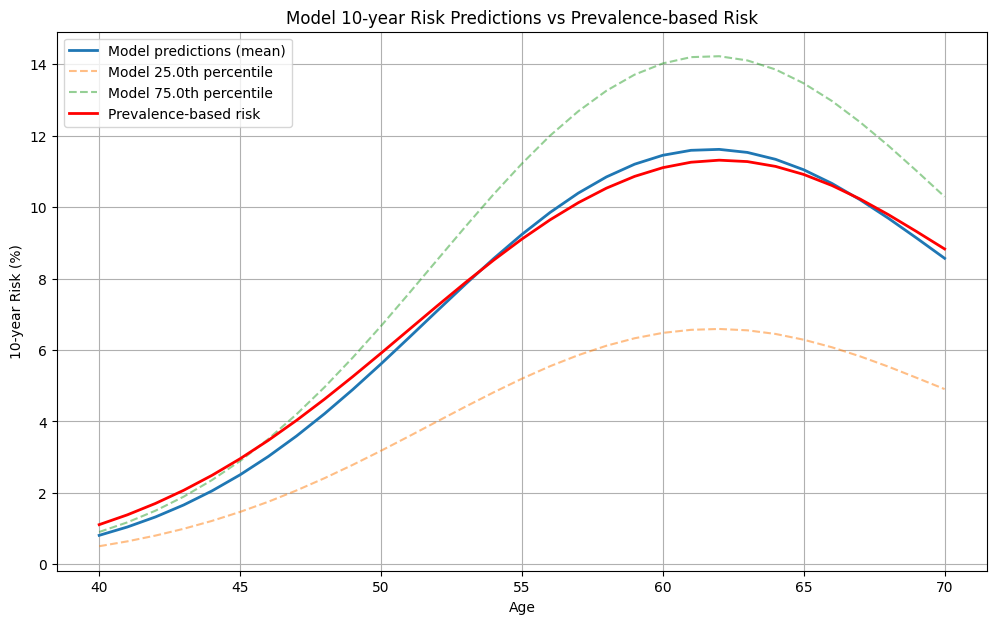


Comparison at specific ages:

Age 40:
Prevalence-based risk: 1.11%
Model mean prediction: 0.81%
Model 25-75th percentile: [0.51%, 0.91%]

Age 50:
Prevalence-based risk: 5.91%
Model mean prediction: 5.61%
Model 25-75th percentile: [3.18%, 6.67%]

Age 60:
Prevalence-based risk: 11.10%
Model mean prediction: 11.45%
Model 25-75th percentile: [6.48%, 14.02%]

Age 70:
Prevalence-based risk: 8.83%
Model mean prediction: 8.57%
Model 25-75th percentile: [4.91%, 10.29%]


In [73]:
# Calculate prevalence-based risks
prev_10yr_risk = calculate_prevalence_10yr_risk(first_model)

plt.figure(figsize=(12, 7))

# Plot average model predictions
plt.plot(range(40, 71), model_risks.mean(), 
         label='Model predictions (mean)', 
         linewidth=2)

# Plot prediction quantiles
quantiles = [0.25, 0.75]
for q in quantiles:
    plt.plot(range(40, 71), model_risks.quantile(q), 
            '--', alpha=0.5,
            label=f'Model {q*100}th percentile')

# Plot prevalence-based risk
plt.plot(range(40, 71), prev_10yr_risk, 
         'r-', label='Prevalence-based risk',
         linewidth=2)

plt.xlabel('Age')
plt.ylabel('10-year Risk (%)')
plt.title('Model 10-year Risk Predictions vs Prevalence-based Risk')
plt.legend()
plt.grid(True)
plt.show()

# Print some numerical comparisons
print("\nComparison at specific ages:")
for age in [40, 50, 60, 70]:
    idx = age - 40
    print(f"\nAge {age}:")
    print(f"Prevalence-based risk: {prev_10yr_risk[idx]:.2f}%")
    print(f"Model mean prediction: {model_risks[age].mean():.2f}%")
    print(f"Model 25-75th percentile: [{model_risks[age].quantile(0.25):.2f}%, {model_risks[age].quantile(0.75):.2f}%]")

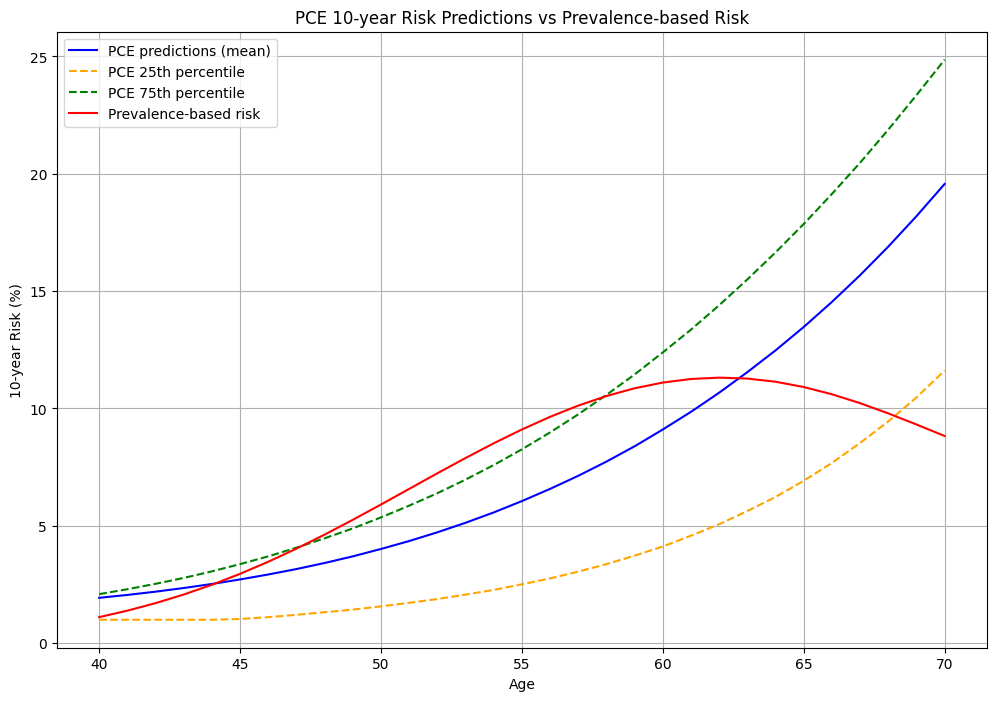

In [182]:
# Get PCE predictions for ages 40-70 only
pce_mean = pce_subset.iloc[:, :31].mean()  # first 31 columns (40-70)
pce_25 = pce_subset.iloc[:, :31].quantile(0.25)
pce_75 = pce_subset.iloc[:, :31].quantile(0.75)

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(range(40, 71), pce_mean, label='PCE predictions (mean)', color='blue')
plt.plot(range(40, 71), pce_25, '--', label='PCE 25th percentile', color='orange')
plt.plot(range(40, 71), pce_75, '--', label='PCE 75th percentile', color='green')
plt.plot(range(40, 71),prev_10yr_risk, 'r-', label='Prevalence-based risk')

plt.xlabel('Age')
plt.ylabel('10-year Risk (%)')
plt.title('PCE 10-year Risk Predictions vs Prevalence-based Risk')
plt.grid(True)
plt.legend()
plt.show()

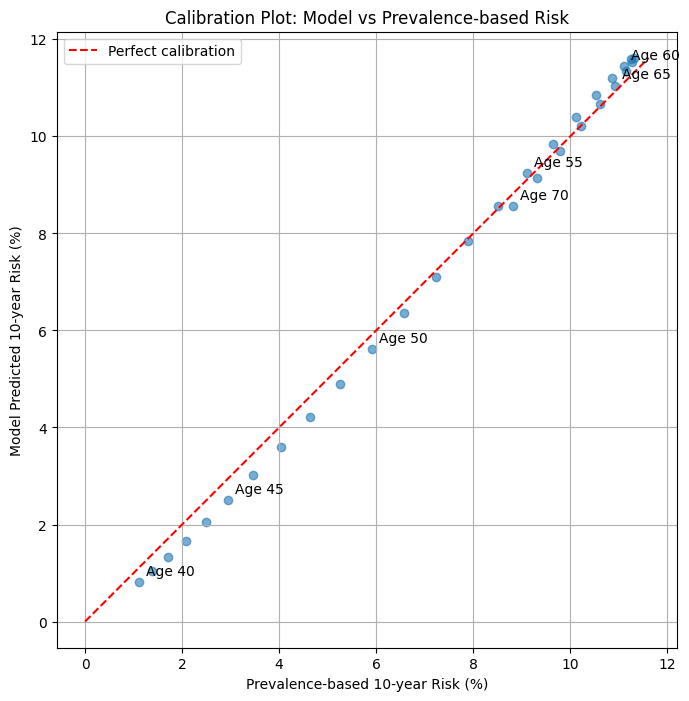

R² score: 0.993

Risk comparisons at key ages:
Age 40: Prevalence = 1.11%, Model = 0.81%
Age 50: Prevalence = 5.91%, Model = 5.61%
Age 60: Prevalence = 11.10%, Model = 11.45%
Age 70: Prevalence = 8.83%, Model = 8.57%


In [75]:
# Get model predictions and prevalence risks
model_means = model_risks.mean()  # This is indexed by age (40-70)
prev_risks = pd.Series(prev_10yr_risk, index=range(40, 71))  # Make prev_risks match the age indexing

plt.figure(figsize=(8, 8))

# Scatter plot of predicted vs actual
plt.scatter(prev_risks, model_means, alpha=0.6)

# Add diagonal reference line
max_risk = max(max(prev_risks), max(model_means))
plt.plot([0, max_risk], [0, max_risk], 'r--', label='Perfect calibration')

# Add labels and title
plt.xlabel('Prevalence-based 10-year Risk (%)')
plt.ylabel('Model Predicted 10-year Risk (%)')
plt.title('Calibration Plot: Model vs Prevalence-based Risk')

# Add age labels to points
for age in range(40, 71, 5):
    plt.annotate(f'Age {age}', 
                (prev_risks[age], model_means[age]),
                xytext=(5, 5), textcoords='offset points')

plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

# Print calibration metrics
from sklearn.metrics import r2_score
print(f"R² score: {r2_score(prev_risks, model_means):.3f}")
print("\nRisk comparisons at key ages:")
for age in [40, 50, 60, 70]:
    print(f"Age {age}: Prevalence = {prev_risks[age]:.2f}%, Model = {model_means[age]:.2f}%")

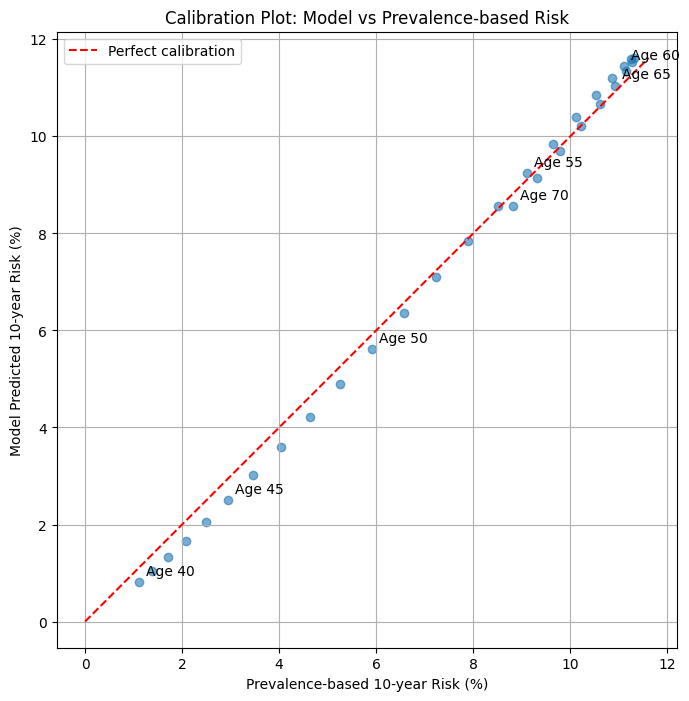

R² score: 0.993

Risk comparisons at key ages:
Age 40: Prevalence = 1.11%, Model = 0.81%
Age 50: Prevalence = 5.91%, Model = 5.61%
Age 60: Prevalence = 11.10%, Model = 11.45%
Age 70: Prevalence = 8.83%, Model = 8.57%


In [76]:
# Get values directly as arrays for plotting
prev_values = prev_10yr_risk
model_values = model_risks.mean().values

plt.figure(figsize=(8, 8))

# Scatter plot of predicted vs actual
plt.scatter(prev_values, model_values, alpha=0.6)

# Add diagonal reference line
max_risk = max(max(prev_values), max(model_values))
plt.plot([0, max_risk], [0, max_risk], 'r--', label='Perfect calibration')

# Add labels and title
plt.xlabel('Prevalence-based 10-year Risk (%)')
plt.ylabel('Model Predicted 10-year Risk (%)')
plt.title('Calibration Plot: Model vs Prevalence-based Risk')

# Add age labels to points (using array indices)
for i, age in enumerate(range(40, 71, 5)):
    idx = age - 40
    plt.annotate(f'Age {age}', 
                (prev_values[idx], model_values[idx]),
                xytext=(5, 5), textcoords='offset points')

plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

# Print calibration metrics
print(f"R² score: {r2_score(prev_values, model_values):.3f}")
print("\nRisk comparisons at key ages:")
for age in [40, 50, 60, 70]:
    idx = age - 40
    print(f"Age {age}: Prevalence = {prev_values[idx]:.2f}%, Model = {model_values[idx]:.2f}%")

Age 40: Our AUC = 0.679, PCE AUC = 0.651
Age 41: Our AUC = 0.679, PCE AUC = 0.657
Age 42: Our AUC = 0.673, PCE AUC = 0.661
Age 43: Our AUC = 0.668, PCE AUC = 0.656
Age 44: Our AUC = 0.667, PCE AUC = 0.656
Age 45: Our AUC = 0.668, PCE AUC = 0.662
Age 46: Our AUC = 0.670, PCE AUC = 0.660
Age 47: Our AUC = 0.668, PCE AUC = 0.657
Age 48: Our AUC = 0.666, PCE AUC = 0.660
Age 49: Our AUC = 0.661, PCE AUC = 0.659
Age 50: Our AUC = 0.659, PCE AUC = 0.663
Age 51: Our AUC = 0.658, PCE AUC = 0.662
Age 52: Our AUC = 0.657, PCE AUC = 0.660
Age 53: Our AUC = 0.652, PCE AUC = 0.664
Age 54: Our AUC = 0.649, PCE AUC = 0.665
Age 55: Our AUC = 0.647, PCE AUC = 0.665
Age 56: Our AUC = 0.644, PCE AUC = 0.665
Age 57: Our AUC = 0.638, PCE AUC = 0.663
Age 58: Our AUC = 0.633, PCE AUC = 0.662
Age 59: Our AUC = 0.628, PCE AUC = 0.663
Age 60: Our AUC = 0.623, PCE AUC = 0.664
Age 61: Our AUC = 0.616, PCE AUC = 0.664
Age 62: Our AUC = 0.614, PCE AUC = 0.664
Age 63: Our AUC = 0.610, PCE AUC = 0.661
Age 64: Our AUC 

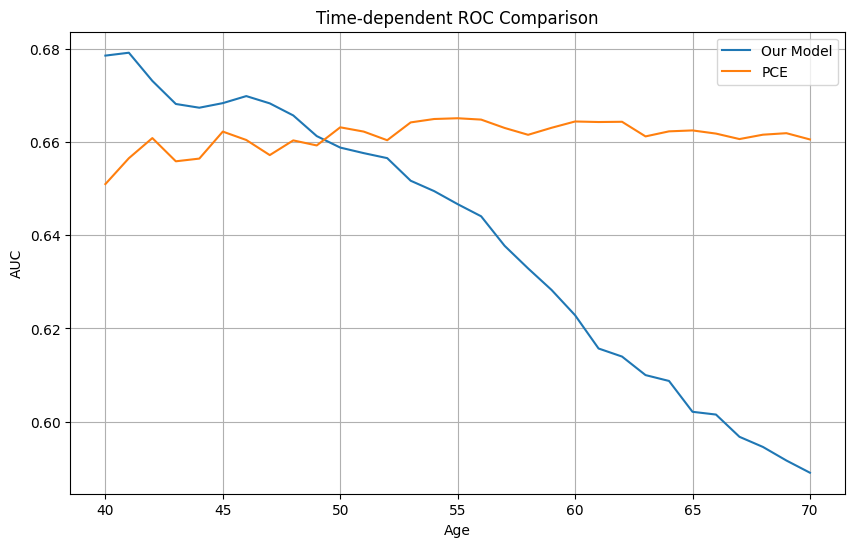

In [82]:
from sklearn.metrics import roc_auc_score

def calculate_time_dependent_roc(model_risks, pce_subset, Y, patient_ids, common_ids, ages=range(40, 71)):
    """
    Calculate ROC curves for both models at each age
    """
    # Get ASCVD events for our subset of patients
    ascvd_indices = [111, 112, 113, 114, 115, 116]
    
    # First subset Y to first 400K patients
    Y_subset = Y[:400000]
    
    # Then get our common patients
    patient_mask = np.isin(patient_ids, common_ids)
    ascvd_events = Y_subset[patient_mask][:, ascvd_indices]
    
    results = []
    for age in ages:
        # Get predictions at this age
        our_preds = model_risks[age].values  # Convert to numpy
        pce_preds = pce_subset[age].values   # Convert to numpy
        
        # Get outcomes in next 10 years from this age
        start_idx = age - 30  # Convert age to index
        # Use torch operations for the 3D tensor
        outcome = torch.any(torch.any(ascvd_events[..., start_idx:start_idx+10], dim=1), dim=1)
        outcome = outcome.numpy()  # Convert to numpy for sklearn
        
        # Calculate AUC for both models
        our_auc = roc_auc_score(outcome, our_preds)
        pce_auc = roc_auc_score(outcome, pce_preds)
        
        results.append({
            'age': age,
            'our_auc': our_auc,
            'pce_auc': pce_auc
        })
        
        # Print progress
        print(f"Age {age}: Our AUC = {our_auc:.3f}, PCE AUC = {pce_auc:.3f}")
    
    return pd.DataFrame(results)

# Calculate ROCs
roc_results = calculate_time_dependent_roc(model_risks, pce_subset, Y, patient_ids, common_ids)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(roc_results['age'], roc_results['our_auc'], label='Our Model')
plt.plot(roc_results['age'], roc_results['pce_auc'], label='PCE')
plt.xlabel('Age')
plt.ylabel('AUC')
plt.title('Time-dependent ROC Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
# Year by year:
yearly_any_ascvd = np.zeros(10)
for year in range(10):
    no_disease_probs = 1 - window_prev[:, year]  # for each disease this year
    no_ascvd = np.prod(no_disease_probs)         # across diseases
    yearly_any_ascvd[year] = 1 - no_ascvd        # any ASCVD this year

ten_year_survival = np.prod(1 - yearly_any_ascvd)  # across years
risk = 1 - ten_year_survival
print(risk)

0.013853562100952566


In [107]:
pce_subset.shape

(59896, 40)

In [109]:
model_risks.shape

(59896, 31)

<bound method NDFrame.head of               id  start  stop  event  our_score  pce_score
0        5021715     40    41  False  -0.430064   0.064366
1        5021715     41    42  False  -0.429580   0.127737
2        5021715     42    43  False  -0.428599   0.180426
3        5021715     43    44  False  -0.427176   0.231952
4        5021715     44    45  False  -0.425374   0.278152
...          ...    ...   ...    ...        ...        ...
1540405  5929643     65    66  False  -0.379406  -0.965346
1540406  5929643     66    67  False  -0.379558  -0.973646
1540407  5929643     67    68  False  -0.380365  -0.981684
1540408  5929643     68    69  False  -0.381889  -0.990255
1540409  5929643     69    70   True  -0.384189  -0.997080

[1540410 rows x 6 columns]>

In [ ]:
def create_time_dependent_dataset(model_risks, pce_subset, Y, patient_ids, common_ids):
    """
    Create expanded dataset with:
    - Time points
    - Event status
    - Our score (model_risks)
    - PCE score
    """
    # Get ASCVD events
    ascvd_indices = [111, 112, 113, 114, 115, 116]
    Y_subset = Y[:400000]
    patient_mask = np.isin(patient_ids, common_ids)
    ascvd_events = Y_subset[patient_mask][:, ascvd_indices]
    
    data = []
    for i, pid in enumerate(common_ids):
        # Get first event time if any
        any_event = torch.any(torch.any(ascvd_events[i], dim=1))
        if any_event:
            event_time = torch.where(torch.any(ascvd_events[i], dim=1))[0][0].item() + 30
        else:
            event_time = 70
            
        # Create records for each age until event or censoring
        for age in range(40, min(event_time + 1, 71)):  # Cap at 70
            # Get 10-year risks at this age
            age_idx = age - 40
            # Use integer location instead of label-based indexing
            our_score = model_risks.iloc[i, age_idx]
            pce_score = pce_subset.iloc[i, age_idx]
            
            data.append({
                'id': pid,
                'start': age,
                'stop': age + 1,
                'event': 1 if age == event_time and any_event else 0,
                'our_score': our_score,
                'pce_score': pce_score
            })
    
    return pd.DataFrame(data)

# Create dataset
td_data = create_time_dependent_dataset(model_risks, pce_subset, Y, patient_ids, common_ids)


In [183]:
yearly_events.shape

(59896, 52)

In [130]:
def bootstrap_cindex(data, n_bootstraps=100):
    """Calculate bootstrapped C-index with confidence intervals"""
    np.random.seed(42)
    cindices = {'our_score': [], 'pce_score': []}
    
    # Get unique IDs
    unique_ids = data['id'].unique()
    
    for _ in range(n_bootstraps):
        # Sample IDs with replacement
        boot_ids = np.random.choice(unique_ids, size=len(unique_ids), replace=True)
        boot_data = data[data['id'].isin(boot_ids)].copy()
        
        for score in ['our_score', 'pce_score']:
            ctv = CoxTimeVaryingFitter()
            ctv.fit(df=boot_data, 
                   id_col='id', 
                   event_col='event',
                   start_col='start', 
                   stop_col='stop',
                   covariates=[score])  # Specify as covariates parameter
            cindices[score].append(ctv.concordance_index_)
    
    results = {
        'our_score': {
            'mean': np.mean(cindices['our_score']),
            'ci_lower': np.percentile(cindices['our_score'], 2.5),
            'ci_upper': np.percentile(cindices['our_score'], 97.5)
        },
        'pce_score': {
            'mean': np.mean(cindices['pce_score']),
            'ci_lower': np.percentile(cindices['pce_score'], 2.5),
            'ci_upper': np.percentile(cindices['pce_score'], 97.5)
        }
    }
    
    return results

In [131]:
# Calculate C-indices
results = bootstrap_cindex(td_data)

# Plot results
plt.figure(figsize=(8, 6))
models = ['our_score', 'pce_score']
means = [results[m]['mean'] for m in models]
errors = [(results[m]['ci_upper'] - results[m]['ci_lower'])/2 for m in models]

plt.bar(range(len(models)), means, yerr=errors, capsize=5)
plt.xticks(range(len(models)), ['Our Model', 'PCE'])
plt.ylabel('C-index')
plt.title('Model Performance Comparison')
plt.show()

# Print numerical results
for model in models:
    print(f"\n{model}:")
    print(f"Mean C-index: {results[model]['mean']:.3f}")
    print(f"95% CI: ({results[model]['ci_lower']:.3f}, {results[model]['ci_upper']:.3f})")

TypeError: fit() got an unexpected keyword argument 'covariates'

In [137]:
# Save the time-dependent data to CSV
td_data.to_csv('td_data_for_r.csv', index=False)

In [138]:
ascvd_indices = [111, 112, 113, 114, 115, 116]
Y_subset = Y[:400000]
patient_mask = np.isin(patient_ids, common_ids)
ascvd_events = Y_subset[patient_mask][:, ascvd_indices]


In [146]:
def create_time_dependent_dataset(model_risks, pce_subset, Y, patient_ids, common_ids):
    """
    Create expanded dataset with:
    - Time points
    - Event status
    - Our score (model_risks)
    - PCE score
    """
    # Get ASCVD events
    ascvd_indices = [111, 112, 113, 114, 115, 116]
    Y_subset = Y[:400000]
    patient_mask = np.isin(patient_ids, common_ids)
    ascvd_events = Y_subset[patient_mask][:, ascvd_indices]
    
    data = []
    for i, pid in enumerate(common_ids):
        # Get first event time if any
        events_over_time = torch.any(ascvd_events[i], dim=1)
        any_event = torch.any(events_over_time)
        
        if any_event:
            event_time = torch.where(events_over_time)[0][0].item() + 30
        else:
            event_time = 70
            
        # Create records for each age until event or censoring
        for age in range(40, min(event_time + 1, 71)):  # Cap at 70
            # Get risks at this age
            age_idx = age - 40
            our_score = model_risks.iloc[i, age_idx]
            pce_score = pce_subset.iloc[i, age_idx]
            
            # Set event flag for the last record if there was an event
            is_last_record = (age == min(event_time, 70))
            has_event = any_event and is_last_record
            
            data.append({
                'id': pid,
                'start': age,
                'stop': age + 1,
                'event': has_event,  # Boolean instead of 0/1
                'our_score': our_score,
                'pce_score': pce_score
            })
    
    return pd.DataFrame(data)

# Create dataset
td_data = create_time_dependent_dataset(model_risks, pce_subset, Y, patient_ids, common_ids)

# Verify the events
print("Event counts:")
print(td_data['event'].value_counts())
print("\nNumber of unique patients with events:")
print(td_data[td_data['event']]['id'].nunique())

Event counts:
event
tensor(False)    465
tensor(False)    465
tensor(False)    465
tensor(False)    465
tensor(False)    465
                ... 
tensor(False)     31
tensor(False)     31
tensor(False)     31
tensor(False)     31
tensor(False)     31
Name: count, Length: 12351, dtype: int64

Number of unique patients with events:


KeyError: "None of [Index([tensor(False), tensor(False), tensor(False), tensor(False),\n       tensor(False), tensor(False), tensor(False), tensor(False),\n       tensor(False), tensor(False),\n       ...\n       tensor(False), tensor(False), tensor(False), tensor(False),\n       tensor(False), tensor(False), tensor(False), tensor(False),\n       tensor(False), tensor(False)],\n      dtype='object', length=1591757)] are in the [columns]"

In [148]:
# Get ASCVD events for common patients
ascvd_indices = [111, 112, 113, 114, 115, 116]
patient_mask = np.isin(patient_ids, common_ids)

ascvd_events = Y_subset[patient_mask][:, ascvd_indices, :]

# Sum across ASCVD conditions for each year
yearly_events = (ascvd_events.sum(axis=1) > 0).numpy()

In [155]:
yearly_events.sum()
total_events = yearly_events.sum()
unique_patients_with_events = (yearly_events.sum(axis=1) > 0).sum()

print(f"Total event occurrences: {total_events}")
print(f"Number of unique patients with events: {unique_patients_with_events}")

# Look at distribution across years
events_by_year = yearly_events.sum(axis=0)
print("\nEvents by year (starting at age 40):")
for year, count in enumerate(events_by_year):
    print(f"Age {year+30}: {count} events")

Total event occurrences: 13828
Number of unique patients with events: 8549

Events by year (starting at age 40):
Age 30: 0 events
Age 31: 0 events
Age 32: 1 events
Age 33: 0 events
Age 34: 2 events
Age 35: 3 events
Age 36: 5 events
Age 37: 7 events
Age 38: 9 events
Age 39: 8 events
Age 40: 15 events
Age 41: 20 events
Age 42: 30 events
Age 43: 29 events
Age 44: 42 events
Age 45: 54 events
Age 46: 69 events
Age 47: 63 events
Age 48: 101 events
Age 49: 86 events
Age 50: 147 events
Age 51: 156 events
Age 52: 240 events
Age 53: 209 events
Age 54: 288 events
Age 55: 282 events
Age 56: 363 events
Age 57: 332 events
Age 58: 469 events
Age 59: 393 events
Age 60: 514 events
Age 61: 454 events
Age 62: 570 events
Age 63: 496 events
Age 64: 626 events
Age 65: 464 events
Age 66: 570 events
Age 67: 516 events
Age 68: 676 events
Age 69: 509 events
Age 70: 642 events
Age 71: 549 events
Age 72: 600 events
Age 73: 470 events
Age 74: 589 events
Age 75: 456 events
Age 76: 468 events
Age 77: 304 events
Age 

In [160]:
yearly_events.shape

(59896, 52)

In [159]:
# Create the time-dependent dataset
data = []
for i, pid in enumerate(common_ids):
    # Get events for this patient starting at age 40 (index 10 in yearly_events)
    patient_events = yearly_events[i, 10:41]  # 31 years (age 40-70)
    
    # Create records for each timepoint
    for t in range(31):  # 31 years (age 40-70)
        data.append({
            'id': pid,
            'start': t + 40,  # start at age 40
            'stop': t + 41,   # stop at age 41-71
            'event': int(patient_events[t]),
            'our_score': model_risks.iloc[i, t],
            'pce_score': pce_subset.iloc[i, t]
        })

td_data = pd.DataFrame(data)

# Save to CSV
td_data.to_csv('td_data_for_r.csv', index=False)

# Verify the output
print("Dataset shape:", td_data.shape)
print("\nEvent counts:")
print(td_data['event'].value_counts())
print("\nAge range:")
print("Start:", td_data['start'].min(), "-", td_data['start'].max())
print("Stop:", td_data['stop'].min(), "-", td_data['stop'].max())

Dataset shape: (1856776, 6)

Event counts:
event
0    1847351
1       9425
Name: count, dtype: int64

Age range:
Start: 40 - 70
Stop: 41 - 71


In [158]:
yearly_events.shape

(59896, 52)

Our score summary:
count    1.856776e+06
mean     7.385749e+00
std      6.348860e+00
min      4.021889e-01
25%      3.004500e+00
50%      5.759009e+00
75%      9.575573e+00
max      5.334641e+01
Name: our_score, dtype: float64

PCE score summary:
count    1.856776e+06
mean     7.698926e+00
std      7.765010e+00
min      1.000000e+00
25%      2.130000e+00
50%      4.960000e+00
75%      1.059000e+01
max      8.642000e+01
Name: pce_score, dtype: float64


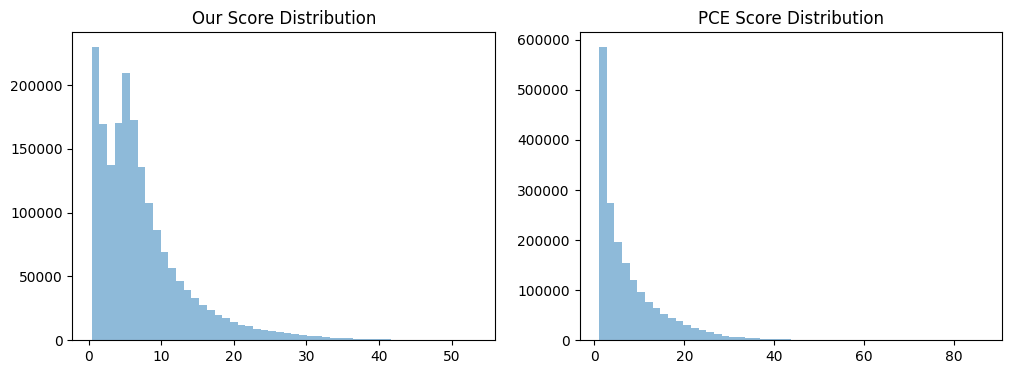


Patient 5021715 scores:
Age	Our Score	PCE Score
40	0.5907	2.0500
41	0.7580	2.3000
42	0.9599	2.5600
43	1.2005	2.8500
44	1.4834	3.1600
45	1.8111	3.5000
46	2.1855	3.8600
47	2.6066	4.2500
48	3.0722	4.6700
49	3.5782	5.1200
50	4.1179	5.6000
51	4.6812	6.1100
52	5.2560	6.6600
53	5.8287	7.2500
54	6.3857	7.8700
55	6.9123	8.5200
56	7.3947	9.2200
57	7.8198	9.9600
58	8.1765	10.7400
59	8.4553	11.5600
60	8.6492	12.4200
61	8.7541	13.3300
62	8.7690	14.2800
63	8.6947	15.2800
64	8.5351	16.3200
65	8.2974	17.4100
66	7.9906	18.5500
67	7.6266	19.7300
68	7.2199	20.9500
69	6.7867	22.2300
70	6.3440	23.5500

Patient 5021723 scores:
Age	Our Score	PCE Score
40	0.5483	1.0000
41	0.6997	1.0000
42	0.8811	1.0000
43	1.0956	1.0000
44	1.3458	1.0000
45	1.6335	1.0000
46	1.9598	1.0400
47	2.3243	1.1300
48	2.7250	1.2200
49	3.1581	1.3300
50	3.6179	1.4500
51	4.0959	1.5900
52	4.5820	1.7400
53	5.0649	1.9000
54	5.5331	2.0900
55	5.9745	2.3000
56	6.3773	2.5400
57	6.7306	2.8000
58	7.0250	3.0900
59	7.2528	3.4100
60	7.4080	3.7800
61	7.

In [161]:
print("Our score summary:")
print(td_data['our_score'].describe())
print("\nPCE score summary:")
print(td_data['pce_score'].describe())

# Plot histograms
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(td_data['our_score'], bins=50, alpha=0.5)
plt.title('Our Score Distribution')
plt.subplot(122)
plt.hist(td_data['pce_score'], bins=50, alpha=0.5)
plt.title('PCE Score Distribution')
plt.show()

# Let's also look at a few individual patients over time
sample_patients = td_data['id'].unique()[:5]
for pid in sample_patients:
    patient_data = td_data[td_data['id'] == pid]
    print(f"\nPatient {pid} scores:")
    print("Age\tOur Score\tPCE Score")
    for _, row in patient_data.iterrows():
        print(f"{row['start']}\t{row['our_score']:.4f}\t{row['pce_score']:.4f}")

    age   our_auc   pce_auc  n_events
0    40  0.678534  0.650977       403
1    41  0.679154  0.656525       508
2    42  0.673112  0.660843       620
3    43  0.668159  0.655864       798
4    44  0.667358  0.656445       939
5    45  0.668341  0.662235      1138
6    46  0.669851  0.660435      1314
7    47  0.668290  0.657195      1539
8    48  0.665701  0.660347      1748
9    49  0.661271  0.659265      2025
10   50  0.658807  0.663154      2270
11   51  0.657618  0.662237      2536
12   52  0.656543  0.660384      2752
13   53  0.651695  0.664207      2987
14   54  0.649468  0.664937      3209
15   55  0.646673  0.665098      3476
16   56  0.644067  0.664809      3620
17   57  0.637735  0.663016      3788
18   58  0.632885  0.661547      3950
19   59  0.628264  0.663054      4123
20   60  0.622845  0.664405      4221
21   61  0.615710  0.664289      4321
22   62  0.613979  0.664341      4439
23   63  0.610005  0.661204      4429
24   64  0.608746  0.662288      4430
25   65  0.6

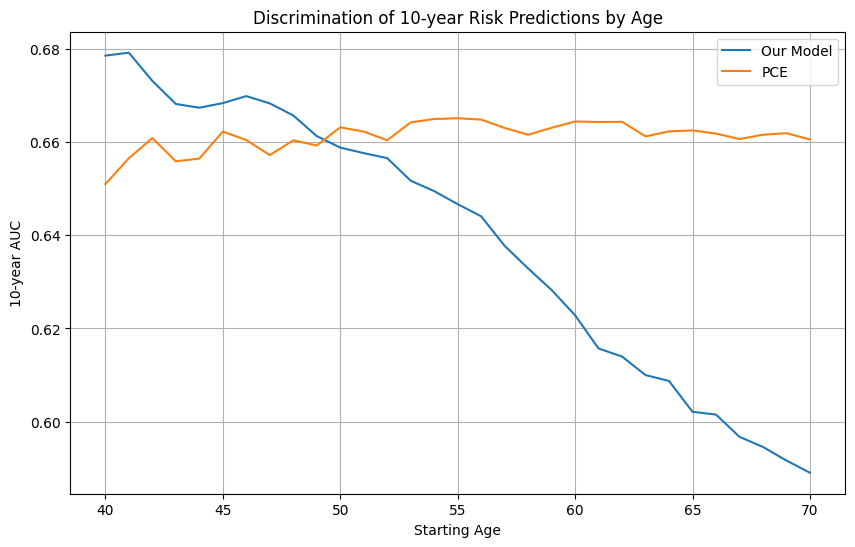

In [184]:
def calculate_10year_discrimination(yearly_events, our_risks, pce_risks):
    """
    Calculate discrimination metrics for 10-year outcomes
    yearly_events: array of shape [n_patients, years_30_to_82]
    our_risks: DataFrame of 10-year risks (ages 40-70)
    pce_risks: DataFrame of PCE 10-year risks (ages 40-70)
    """
    results = []
    
    # For ages 40-70
    for age in range(40, 71):
        yearly_idx = age - 30  # Convert age to yearly_events index (starts at 30)
        risk_idx = age - 40    # Convert age to risk index (starts at 40)
        
        # Get actual 10-year outcomes (any event in next 10 years)
        outcomes = (yearly_events[:, yearly_idx:yearly_idx+10].sum(axis=1) > 0).astype(int)
        
        # Get predicted risks at this age
        our_preds = our_risks.iloc[:, risk_idx]
        pce_preds = pce_risks.iloc[:, risk_idx]
        
        # Calculate AUC
        our_auc = roc_auc_score(outcomes, our_preds)
        pce_auc = roc_auc_score(outcomes, pce_preds)
        
        results.append({
            'age': age,
            'our_auc': our_auc,
            'pce_auc': pce_auc,
            'n_events': outcomes.sum()
        })
    
    return pd.DataFrame(results)

# Calculate and plot results
results = calculate_10year_discrimination(yearly_events, model_risks, pce_subset)
print(results)

# Plot AUCs by age
plt.figure(figsize=(10, 6))
plt.plot(results['age'], results['our_auc'], label='Our Model')
plt.plot(results['age'], results['pce_auc'], label='PCE')
plt.xlabel('Starting Age')
plt.ylabel('10-year AUC')
plt.title('Discrimination of 10-year Risk Predictions by Age')
plt.legend()
plt.grid(True)
plt.show()

In [185]:
# Print some diagnostics
print("For age 40:")
print(f"Number of events in next 10 years: {results.iloc[0]['n_events']}")
print(f"Our AUC: {results.iloc[0]['our_auc']:.3f}")
print(f"PCE AUC: {results.iloc[0]['pce_auc']:.3f}")

print("\nFor age 60:")
print(f"Number of events in next 10 years: {results.iloc[20]['n_events']}")
print(f"Our AUC: {results.iloc[20]['our_auc']:.3f}")
print(f"PCE AUC: {results.iloc[20]['pce_auc']:.3f}")

# Maybe check the raw predictions and outcomes for a few ages
def check_predictions(age):
    idx = age - 40
    yearly_idx = age - 30
    outcomes = (yearly_events[:, yearly_idx:yearly_idx+10].sum(axis=1) > 0).astype(int)
    our_preds = model_risks.iloc[:, idx]
    pce_preds = pce_subset.iloc[:, idx]
    return outcomes, our_preds, pce_preds

For age 40:
Number of events in next 10 years: 403.0
Our AUC: 0.679
PCE AUC: 0.651

For age 60:
Number of events in next 10 years: 4221.0
Our AUC: 0.623
PCE AUC: 0.664


In [186]:
# Look at the distribution of predictions at age 40
age = 40
outcomes, our_preds, pce_preds = check_predictions(age)

print("Age 40 predictions for event vs no event:")
print("\nOur predictions:")
print("Event cases mean:", our_preds[outcomes==1].mean())
print("Non-event cases mean:", our_preds[outcomes==0].mean())

print("\nPCE predictions:")
print("Event cases mean:", pce_preds[outcomes==1].mean())
print("Non-event cases mean:", pce_preds[outcomes==0].mean())

Age 40 predictions for event vs no event:

Our predictions:
Event cases mean: 1.1840125924518363
Non-event cases mean: 0.808433578436837

PCE predictions:
Event cases mean: 3.117493796526055
Non-event cases mean: 1.9254803086077357


In [187]:
# Look at the distribution of predictions at age 60
age = 60
outcomes, our_preds, pce_preds = check_predictions(age)

print("Age 60 predictions for event vs no event:")
print("\nOur predictions:")
print("Event cases mean:", our_preds[outcomes==1].mean())
print("Non-event cases mean:", our_preds[outcomes==0].mean())

print("\nPCE predictions:")
print("Event cases mean:", pce_preds[outcomes==1].mean())
print("Non-event cases mean:", pce_preds[outcomes==0].mean())

# Also print ratios
print("\nRatios (event/non-event):")
print("Our model:", our_preds[outcomes==1].mean() / our_preds[outcomes==0].mean())
print("PCE:", pce_preds[outcomes==1].mean() / pce_preds[outcomes==0].mean())

# And absolute differences
print("\nAbsolute differences (event - non-event):")
print("Our model:", our_preds[outcomes==1].mean() - our_preds[outcomes==0].mean())
print("PCE:", pce_preds[outcomes==1].mean() - pce_preds[outcomes==0].mean())

Age 60 predictions for event vs no event:

Our predictions:
Event cases mean: 14.470369433643684
Non-event cases mean: 11.22282436514325

PCE predictions:
Event cases mean: 12.48128405591092
Non-event cases mean: 8.84949762011675

Ratios (event/non-event):
Our model: 1.2893696776175987
PCE: 1.4103946451760565

Absolute differences (event - non-event):
Our model: 3.2475450685004343
PCE: 3.6317864357941705


Age 40:


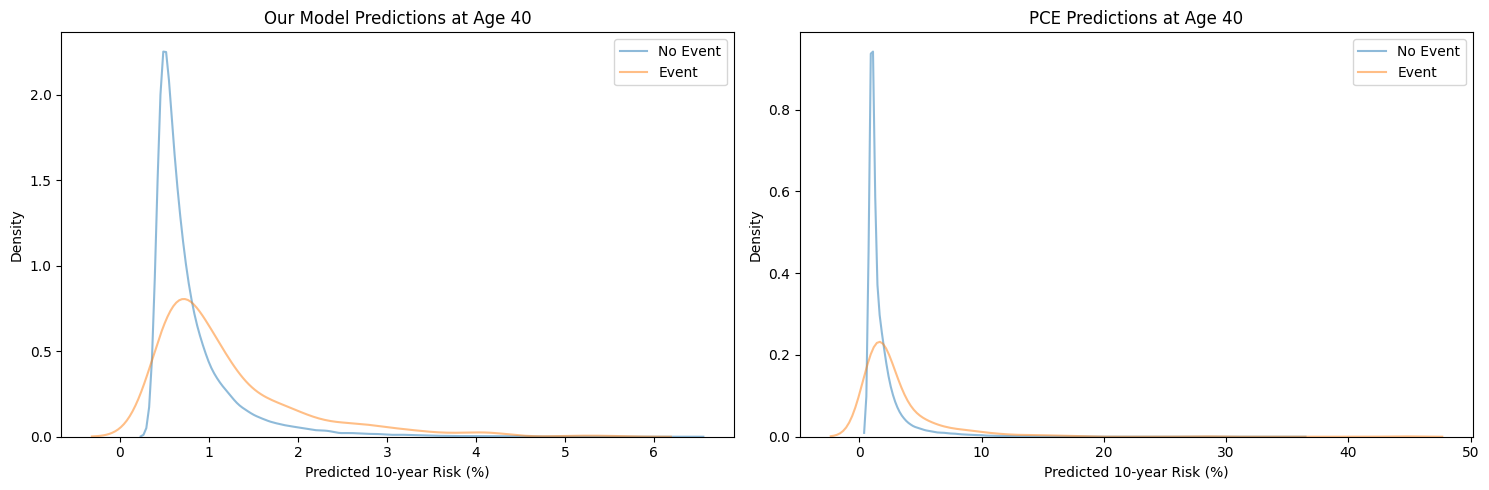


Age 60:


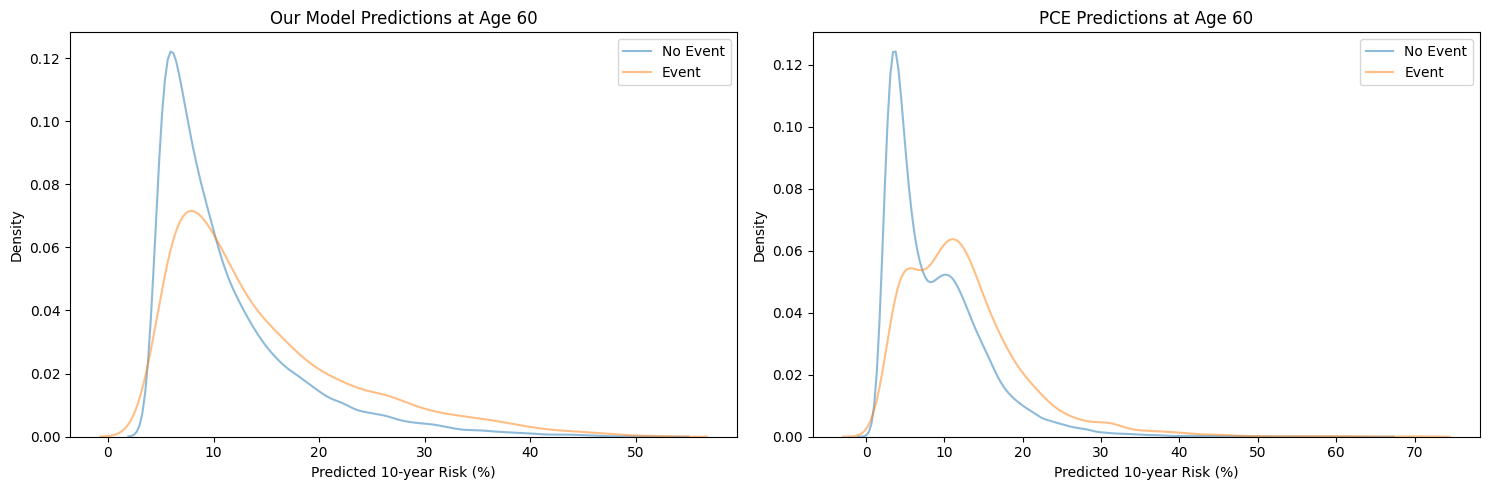

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_risk_distributions(age):
    outcomes, our_preds, pce_preds = check_predictions(age)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Our model
    sns.kdeplot(data=our_preds[outcomes==0], label='No Event', ax=ax1, alpha=0.5)
    sns.kdeplot(data=our_preds[outcomes==1], label='Event', ax=ax1, alpha=0.5)
    ax1.set_title(f'Our Model Predictions at Age {age}')
    ax1.set_xlabel('Predicted 10-year Risk (%)')
    ax1.legend()
    
    # PCE
    sns.kdeplot(data=pce_preds[outcomes==0], label='No Event', ax=ax2, alpha=0.5)
    sns.kdeplot(data=pce_preds[outcomes==1], label='Event', ax=ax2, alpha=0.5)
    ax2.set_title(f'PCE Predictions at Age {age}')
    ax2.set_xlabel('Predicted 10-year Risk (%)')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Plot for both ages
print("Age 40:")
plot_risk_distributions(40)
print("\nAge 60:")
plot_risk_distributions(60)

In [31]:
refs = torch.load('/Users/sarahurbut/aladynoulli2/pyScripts/reference_trajectories.pt')
signature_refs = refs['signature_refs']
# 3. Compare with original model
print("\nComparing with original model predictions...")
# Load and initialize model properly
model_path = '/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_0_10000/model.pt'
checkpoint = torch.load(model_path)

model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=checkpoint['hyperparameters']['N'],
    D=checkpoint['hyperparameters']['D'],
    T=checkpoint['hyperparameters']['T'],
    K=20,
    P=checkpoint['hyperparameters']['P'],
    init_var_scaler=1e-1,
    G=checkpoint['G'],
    Y=checkpoint['Y'],
    genetic_scale=3,
    prevalence_t=checkpoint['prevalence_t'],
    signature_references=signature_refs,
    healthy_reference=True,
    disease_names=checkpoint['disease_names']
)

model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

with torch.no_grad():
    original_pi, _, _ = model.forward()
    #original_pi = original_pi.cpu().numpy()

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_27353/4008410507.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  refs = torch.load('/Users/sarahurbut/aladynou


Comparing with original model predictions...
Lambda kernel condition number: 56314924.00
Phi kernel condition number: 59684776.00

Cluster Sizes:
Cluster 0: 14 diseases
Cluster 1: 7 diseases
Cluster 2: 21 diseases
Cluster 3: 15 diseases
Cluster 4: 17 diseases
Cluster 5: 16 diseases
Cluster 6: 57 diseases
Cluster 7: 18 diseases
Cluster 8: 13 diseases
Cluster 9: 11 diseases
Cluster 10: 18 diseases
Cluster 11: 12 diseases
Cluster 12: 26 diseases
Cluster 13: 7 diseases
Cluster 14: 9 diseases
Cluster 15: 8 diseases
Cluster 16: 7 diseases
Cluster 17: 11 diseases
Cluster 18: 6 diseases
Cluster 19: 55 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 14
Base value (first 5): tensor([-18.4207, -18.4207, -17.3858, -16.3508, -16.3508])
Base value centered (first 5): tensor([-0.5458, -0.5458,  0.4891,  1.5240,  1.5240])
Base value centered mean: 3.23352810482902e-06
Gamma init for k=0 (first 5): tensor([ 0.0013,  0.0101,  0.0173,  0.0224, -0.0156])

Calculating gamma for k=1:
Nu

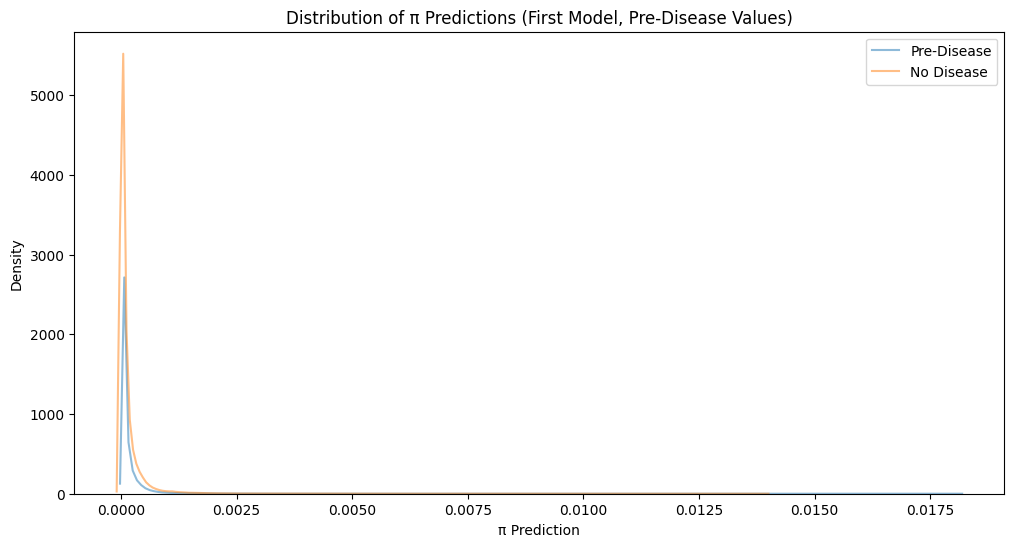

Number who got any disease: tensor(9987)
Number who didn't: tensor(13)

π predictions summary:
Pre-disease - mean: 7.706469e-05 std: 0.00024463603
No disease - mean: 0.00014283061 std: 0.0003611629


In [193]:
# Get first event times from model's Y
Y = checkpoint['Y']
first_events = np.argmax(Y.sum(axis=1) > 0, axis=1)  # First event across any disease
got_disease = first_events > 0  # Exclude those who never got disease

# Initialize lists to store pre-disease π values
pi_before_disease = []
pi_no_disease = []

# For patients who got disease, only take π predictions before their first event
for i, (had_disease, event_time) in enumerate(zip(got_disease, first_events)):
    if had_disease:
        pi_before_disease.append(original_pi[i, :, :event_time].flatten())
    else:
        pi_no_disease.append(original_pi[i].flatten())

# Convert to arrays
pi_before_disease = np.concatenate(pi_before_disease)
pi_no_disease = np.concatenate(pi_no_disease)

# Create distribution plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=pi_before_disease, label='Pre-Disease', alpha=0.5)
sns.kdeplot(data=pi_no_disease, label='No Disease', alpha=0.5)
plt.xlabel('π Prediction')
plt.ylabel('Density')
plt.title('Distribution of π Predictions (First Model, Pre-Disease Values)')
plt.legend()
plt.show()

# Print summary stats
print("Number who got any disease:", got_disease.sum())
print("Number who didn't:", (~got_disease).sum())
print("\nπ predictions summary:")
print("Pre-disease - mean:", pi_before_disease.mean(), "std:", pi_before_disease.std())
print("No disease - mean:", pi_no_disease.mean(), "std:", pi_no_disease.std())

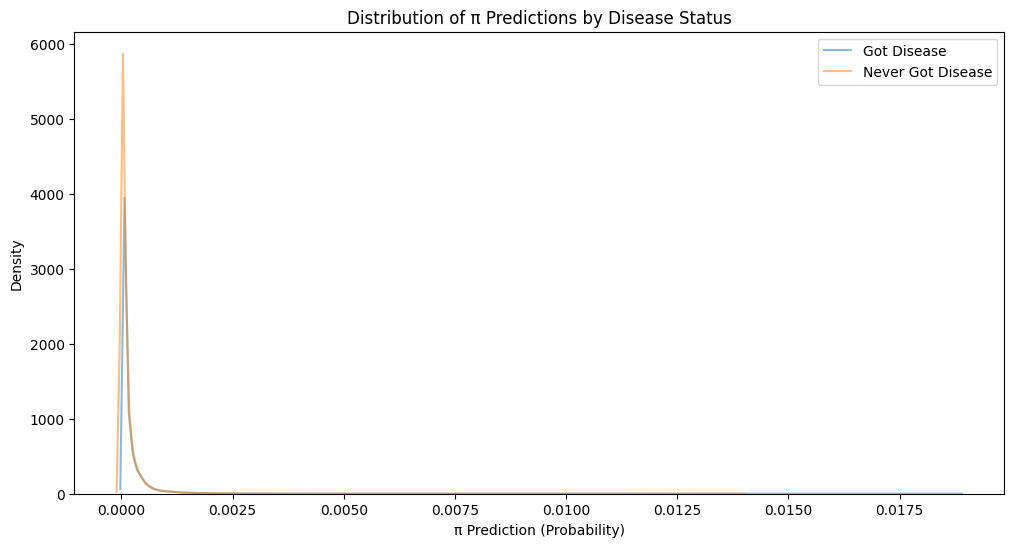

Number who got any disease: 9994
Number who didn't: 6

π predictions summary:
Disease - mean: 0.00014329810801427811 std: 0.000380368233891204
No disease - mean: 0.00014229465159587562 std: 0.0003616132598835975


In [201]:
# Get disease status from Y
Y = checkpoint['Y']
ever_disease = (Y.sum(axis=(1,2)) > 0)  # Ever got any disease

# Get pi distributions
pi_disease = original_pi[ever_disease].flatten()
pi_no_disease = original_pi[~ever_disease].flatten()


# Create distribution plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=pi_disease, label='Got Disease', alpha=0.5)
sns.kdeplot(data=pi_no_disease, label='Never Got Disease', alpha=0.5)
plt.xlabel('π Prediction (Probability)')
plt.ylabel('Density')
plt.title('Distribution of π Predictions by Disease Status')
plt.legend()
plt.show()

# Print summary stats
print("Number who got any disease:", ever_disease.sum().item())
print("Number who didn't:", (~ever_disease).sum().item())
print("\nπ predictions summary:")
print("Disease - mean:", pi_disease.mean().item(), "std:", pi_disease.std().item())
print("No disease - mean:", pi_no_disease.mean().item(), "std:", pi_no_disease.std().item())

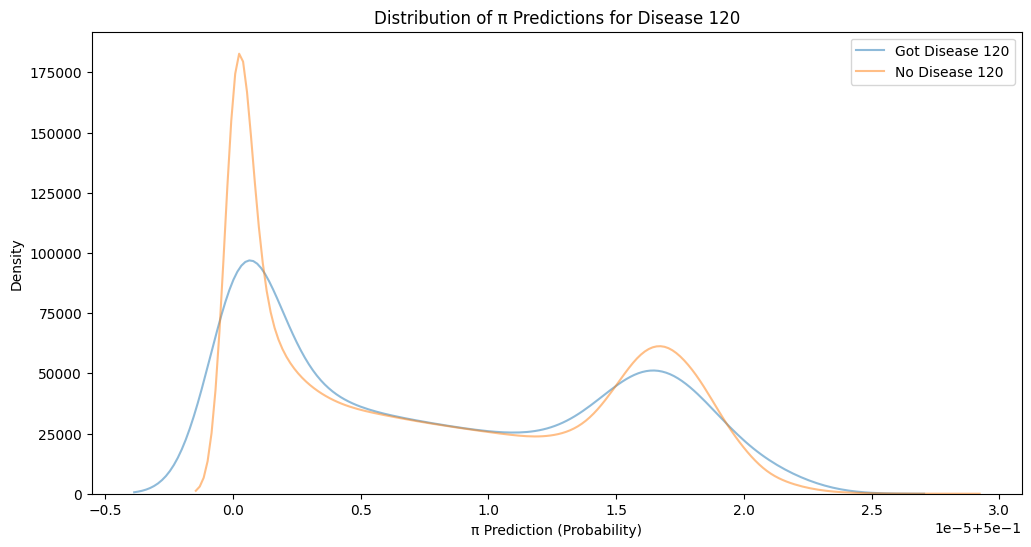

Number who got disease 120: 86
Number who didn't: 9914

π predictions summary:
Disease - mean: 0.5000081062316895 std: 7.038228432065807e-06
No disease - mean: 0.5000080466270447 std: 7.021565124887275e-06


KeyError: 120

In [205]:
# Pick a disease (let's say disease_idx = 0 for example)
disease_idx = 120  # We can change this to look at different diseases

# Get patients who got this specific disease
got_this_disease = (Y[:, disease_idx, :].sum(axis=1) > 0)

# Get pi predictions for this disease
pi_this_disease = original_pi[:, disease_idx, :]  # [n_patients, time]

# Get distributions
pi_disease = pi_this_disease[got_this_disease].flatten()
pi_no_disease = pi_this_disease[~got_this_disease].flatten()

# Convert to probabilities
pi_disease = torch.sigmoid(torch.tensor(pi_disease))
pi_no_disease = torch.sigmoid(torch.tensor(pi_no_disease))

# Create distribution plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=pi_disease.numpy(), label=f'Got Disease {disease_idx}', alpha=0.5)
sns.kdeplot(data=pi_no_disease.numpy(), label=f'No Disease {disease_idx}', alpha=0.5)
plt.xlabel('π Prediction (Probability)')
plt.ylabel('Density')
plt.title(f'Distribution of π Predictions for Disease {disease_idx}')
plt.legend()
plt.show()

# Print summary stats
print(f"Number who got disease {disease_idx}:", got_this_disease.sum().item())
print(f"Number who didn't:", (~got_this_disease).sum().item())
print("\nπ predictions summary:")
print("Disease - mean:", pi_disease.mean().item(), "std:", pi_disease.std().item())
print("No disease - mean:", pi_no_disease.mean().item(), "std:", pi_no_disease.std().item())

# Maybe also print the disease name if available
if 'disease_names' in checkpoint:
    print(f"\nDisease name: {checkpoint['disease_names'][disease_idx]}")